<a href="https://colab.research.google.com/github/Satkarjain/Useful-codes-in-machine-learning/blob/master/RNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length


In [0]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

In [0]:
batchX_placeholder = tf.placeholder(tf.float32,[batch_size,truncated_backprop_length])
batchy_placeholder = tf.placeholder(tf.int32,[batch_size,truncated_backprop_length])
init_state = tf.placeholder(tf.float32, [batch_size, state_size])

In [4]:
init_state

<tf.Tensor 'Placeholder_2:0' shape=(5, 4) dtype=float32>

In [0]:
W = tf.Variable(np.random.rand(state_size,state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)
W1= tf.Variable(np.random.rand(1,state_size), dtype=tf.float32)
W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

In [0]:
input_seq = tf.unstack(batchX_placeholder,axis= 1)
label_seq = tf.unstack(batchy_placeholder,axis=1)

In [0]:
current_state = init_state
states_series = []
for current_input in input_seq:
    current_input = tf.reshape(current_input, [batch_size, 1])
    #input_and_state_concatenated = tf.concat(1, [current_input ,current_state])  # Increasing number of columns
    input_ = tf.matmul(current_input,W1)
    state_= tf.matmul(current_state,W)
    next_state = tf.tanh(input_+ state_ + b)  # Broadcasted addition
    states_series.append(next_state)
    current_state = next_state

In [8]:
logits_series = [tf.matmul(state,W2)+b2 for state in states_series]
prediction = [tf.nn.softmax(logits) for logits in logits_series]
losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=b, labels=a) for b,a in zip(logits_series,label_seq)]
total_loss = tf.reduce_mean(losses)
train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)

<Figure size 432x288 with 0 Axes>

New data, epoch 0
Step 0 Loss 0.73380065


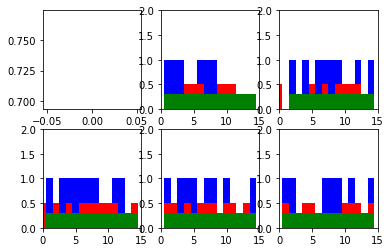

Step 100 Loss 0.6977886


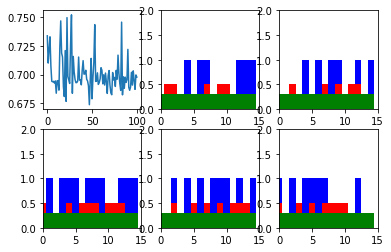

Step 200 Loss 0.68644947


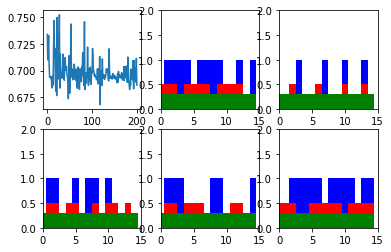

Step 300 Loss 0.69376427


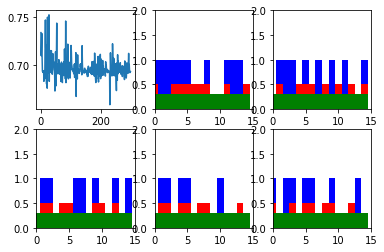

Step 400 Loss 0.69352674


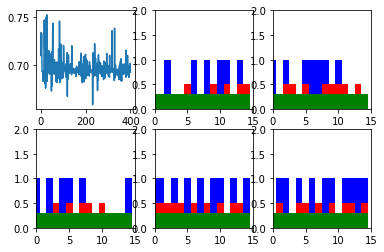

Step 500 Loss 0.5077928


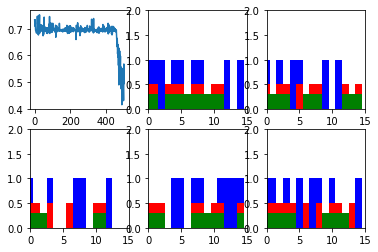

Step 600 Loss 0.061734326


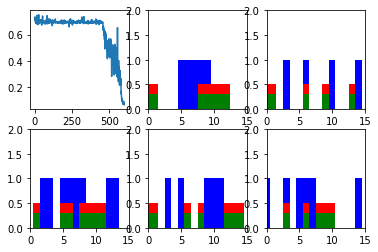

New data, epoch 1
Step 0 Loss 0.13012777


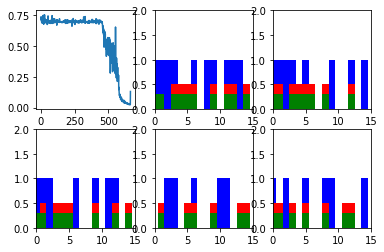

Step 100 Loss 0.011262307


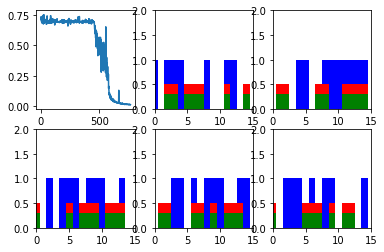

Step 200 Loss 0.007224256


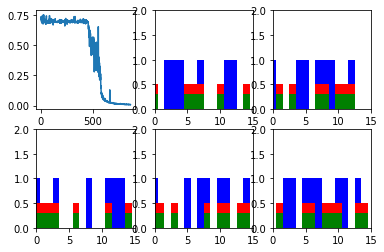

Step 300 Loss 0.006825439


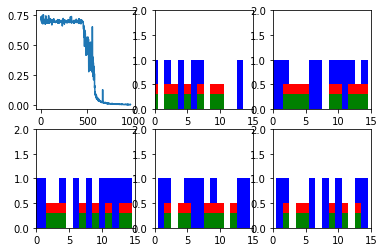

Step 400 Loss 0.005096808


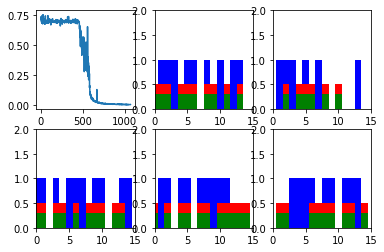

Step 500 Loss 0.0043883203


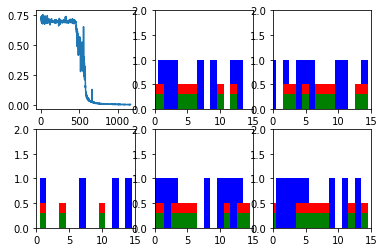

Step 600 Loss 0.0030315872


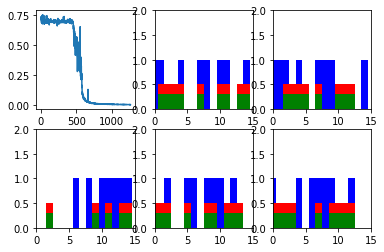

New data, epoch 2
Step 0 Loss 0.14492008


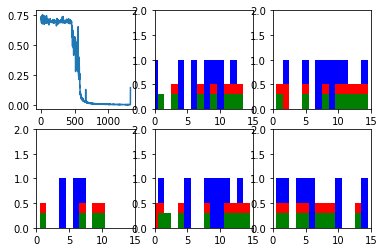

Step 100 Loss 0.002533341


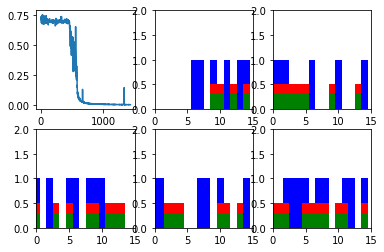

Step 200 Loss 0.0022154392


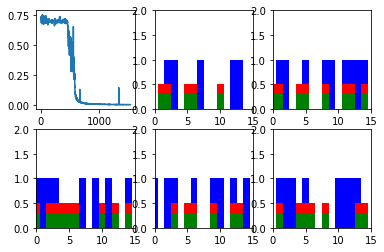

Step 300 Loss 0.0021756792


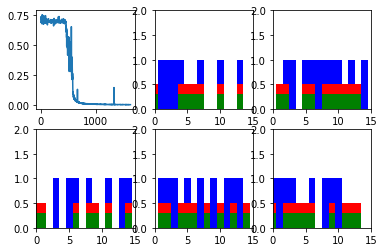

Step 400 Loss 0.0019257395


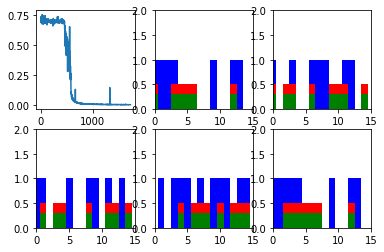

Step 500 Loss 0.0016202298


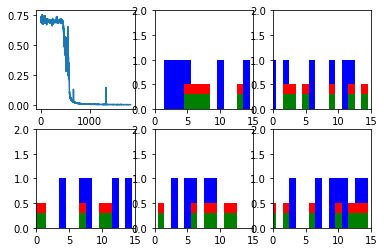

Step 600 Loss 0.0014371107


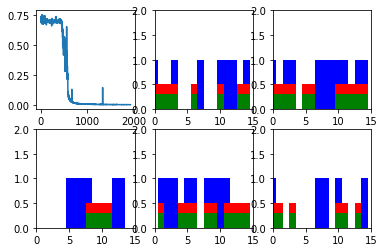

New data, epoch 3
Step 0 Loss 0.329566


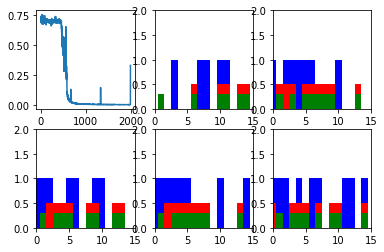

Step 100 Loss 0.002690046


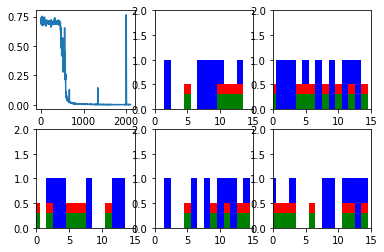

Step 200 Loss 0.0017453503


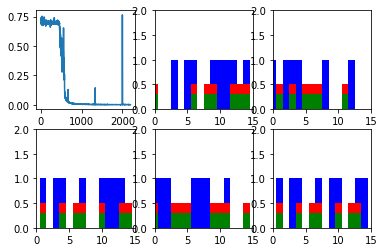

Step 300 Loss 0.001692732


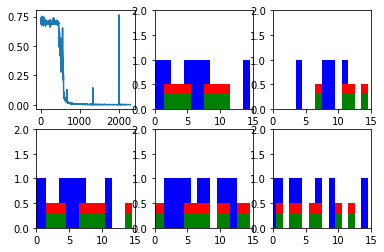

Step 400 Loss 0.001394989


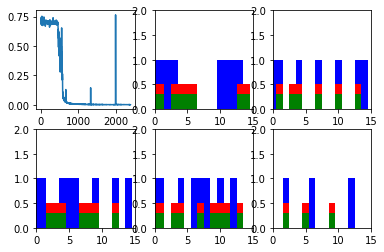

Step 500 Loss 0.0014635082


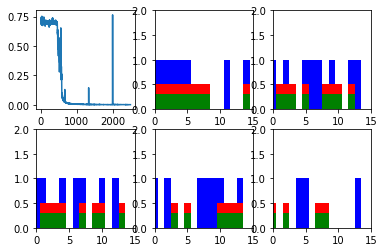

Step 600 Loss 0.00159534


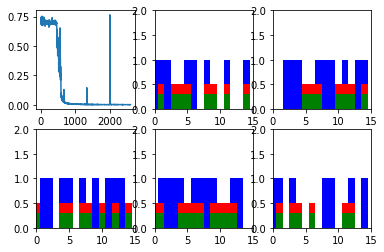

New data, epoch 4
Step 0 Loss 0.3527974


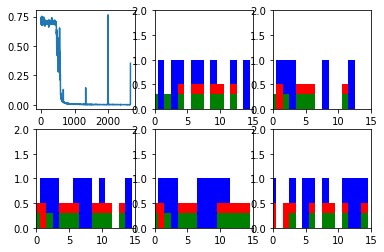

Step 100 Loss 0.0012084238


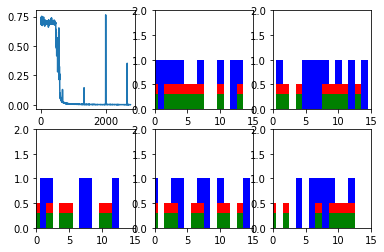

Step 200 Loss 0.0011390654


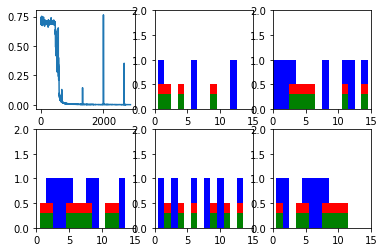

Step 300 Loss 0.0011326264


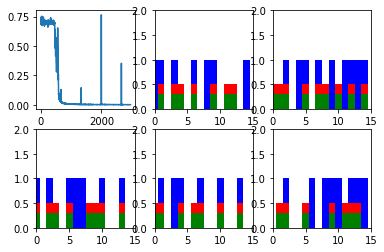

Step 400 Loss 0.0011478801


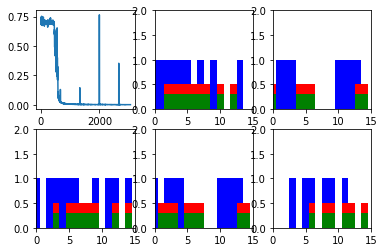

Step 500 Loss 0.0007753429


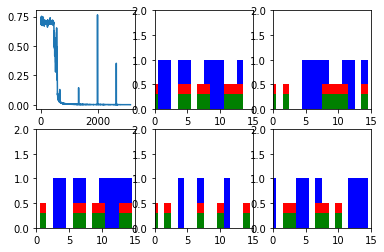

Step 600 Loss 0.00090599904


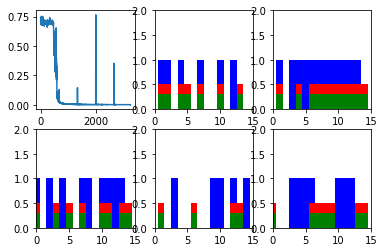

New data, epoch 5
Step 0 Loss 0.28691825


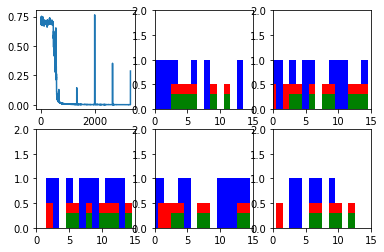

Step 100 Loss 0.0010850981


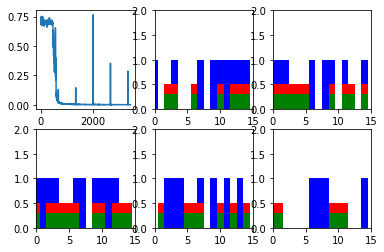

Step 200 Loss 0.00086773245


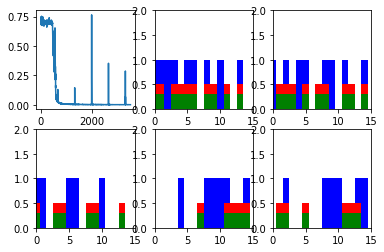

Step 300 Loss 0.0007017702


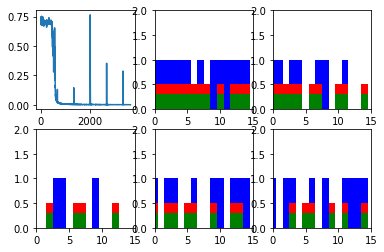

Step 400 Loss 0.0008763965


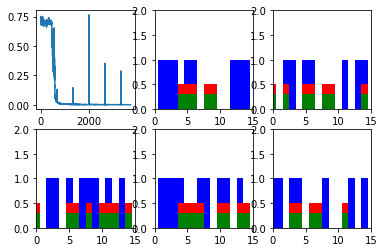

Step 500 Loss 0.00072750804


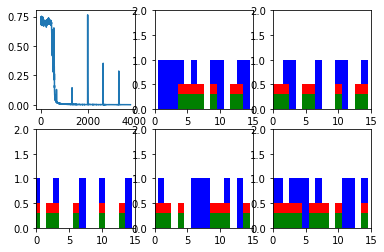

Step 600 Loss 0.0007977588


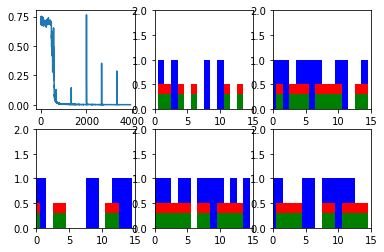

New data, epoch 6
Step 0 Loss 0.19767664


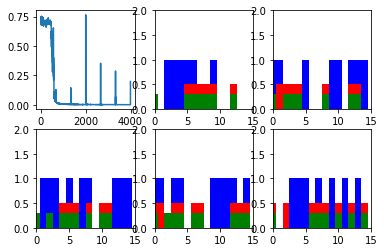

Step 100 Loss 0.00074028014


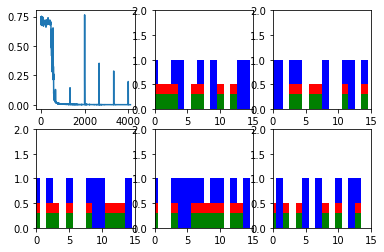

Step 200 Loss 0.0007863203


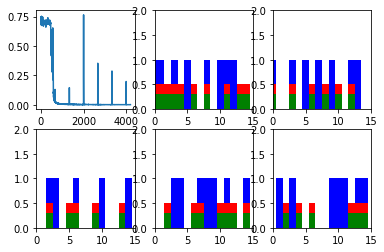

Step 300 Loss 0.0008128772


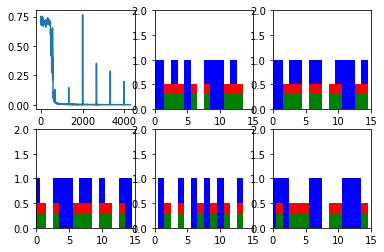

Step 400 Loss 0.00063231343


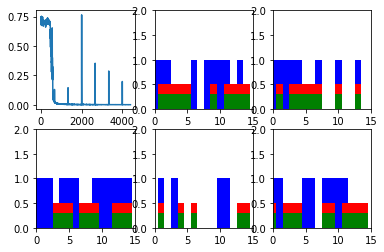

Step 500 Loss 0.00068334915


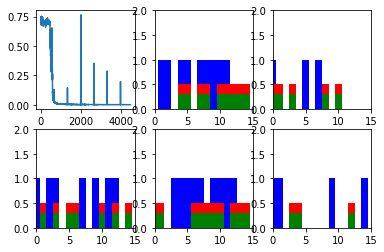

Step 600 Loss 0.0006627487


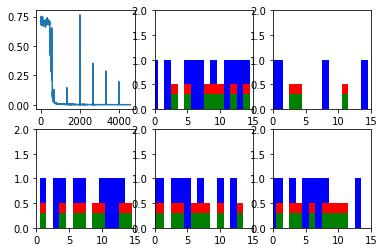

New data, epoch 7
Step 0 Loss 0.15100259


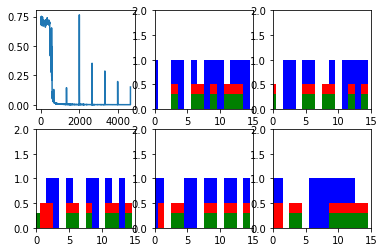

Step 100 Loss 0.0007327421


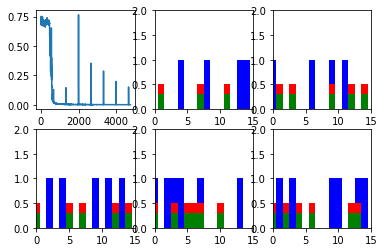

Step 200 Loss 0.0005375458


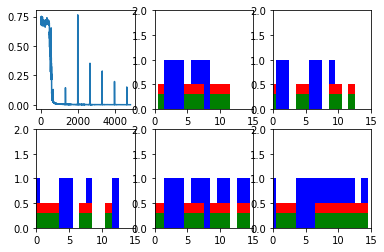

Step 300 Loss 0.00060056103


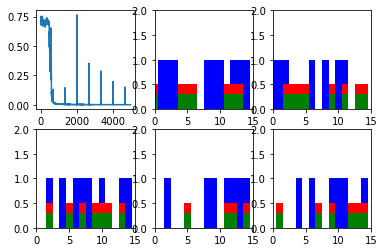

Step 400 Loss 0.00043840517


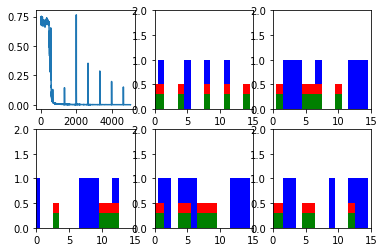

Step 500 Loss 0.00046165686


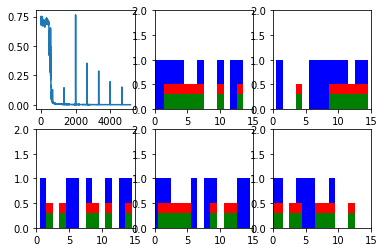

Step 600 Loss 0.00054012943


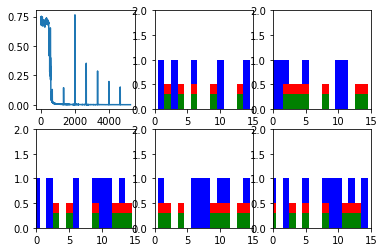

New data, epoch 8
Step 0 Loss 0.1392502


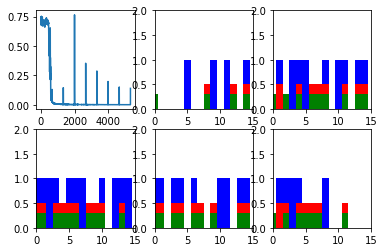

Step 100 Loss 0.00047511767


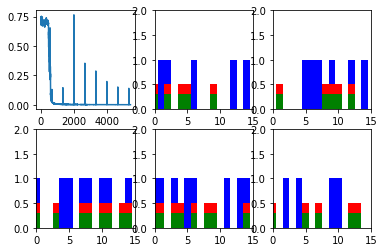

Step 200 Loss 0.00045626695


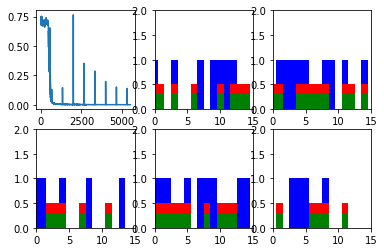

Step 300 Loss 0.00056608557


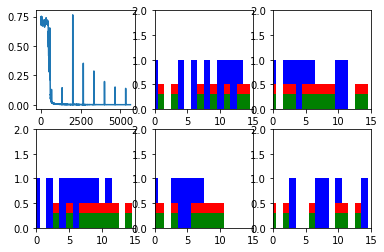

Step 400 Loss 0.0004361371


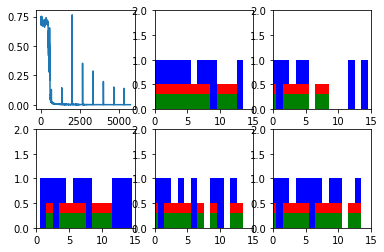

Step 500 Loss 0.00042107422


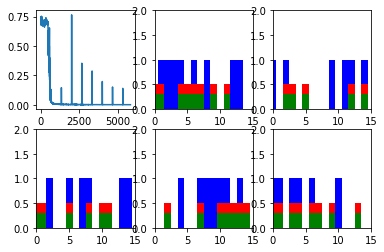

Step 600 Loss 0.00043426306


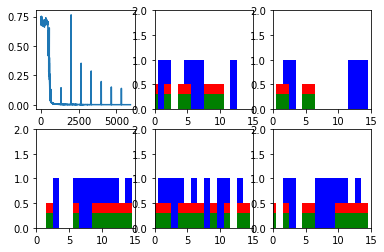

New data, epoch 9
Step 0 Loss 0.196849


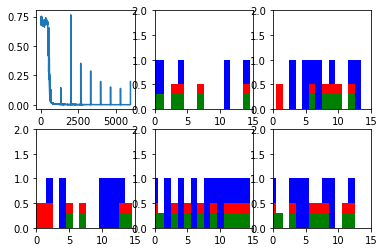

Step 100 Loss 0.00048657676


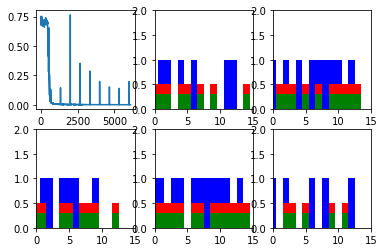

Step 200 Loss 0.00035831815


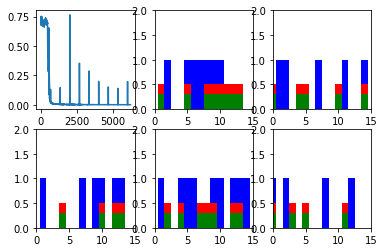

Step 300 Loss 0.0002851764


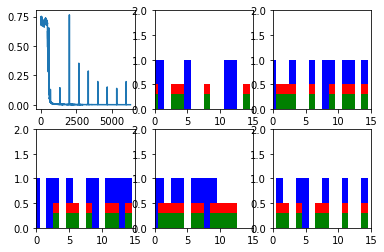

Step 400 Loss 0.00032730598


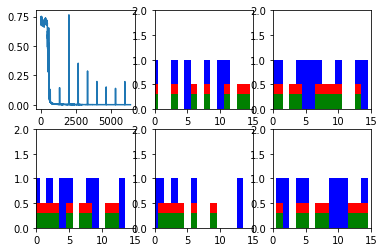

Step 500 Loss 0.00042161337


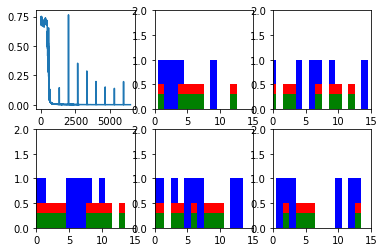

Step 600 Loss 0.00038501408


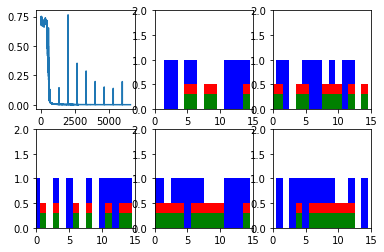

New data, epoch 10
Step 0 Loss 0.1755554


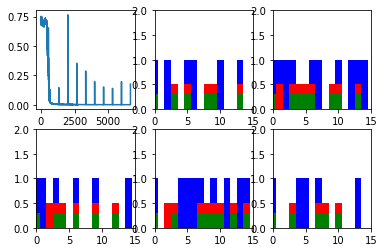

Step 100 Loss 0.00048503757


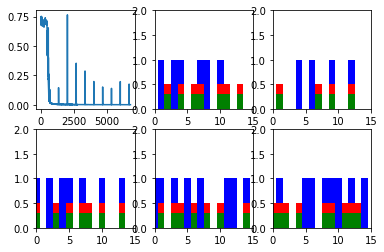

Step 200 Loss 0.000542898


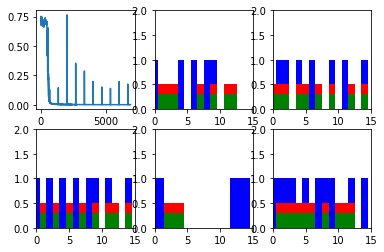

Step 300 Loss 0.0004061247


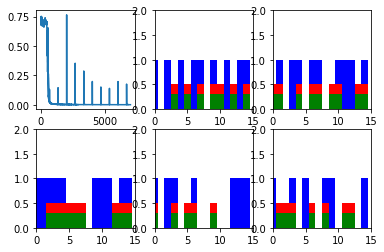

Step 400 Loss 0.00035934921


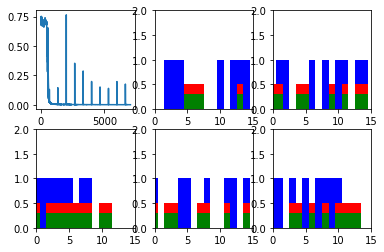

Step 500 Loss 0.00037569692


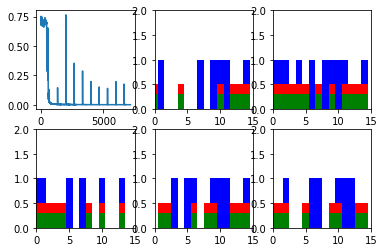

Step 600 Loss 0.0003553865


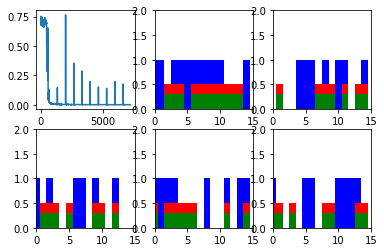

New data, epoch 11
Step 0 Loss 0.29532662


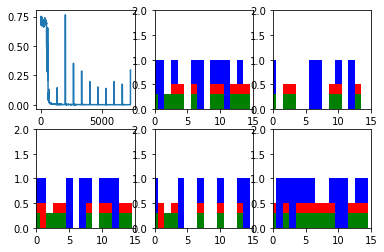

Step 100 Loss 0.00036218812


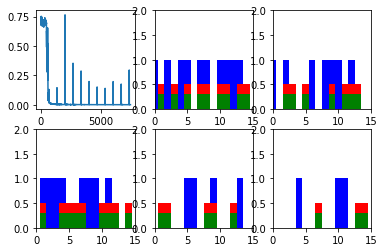

Step 200 Loss 0.00046248522


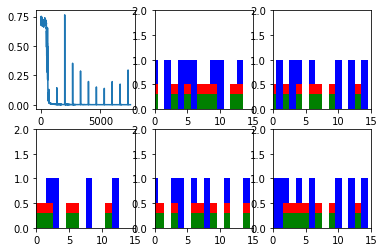

Step 300 Loss 0.0002935704


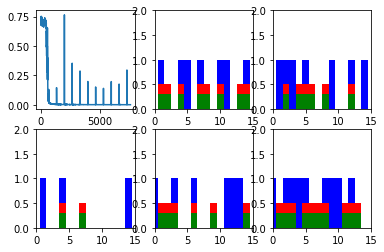

Step 400 Loss 0.0003276492


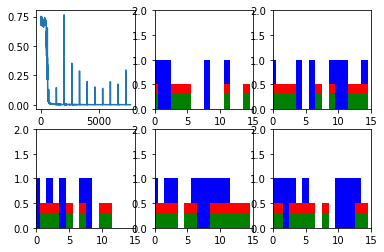

Step 500 Loss 0.00033117484


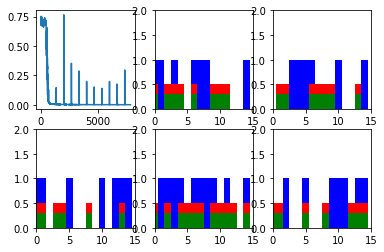

Step 600 Loss 0.00033714


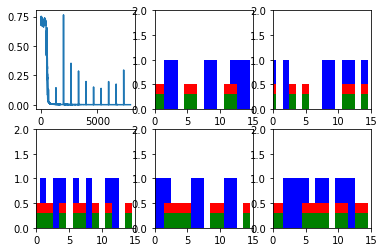

New data, epoch 12
Step 0 Loss 0.112784155


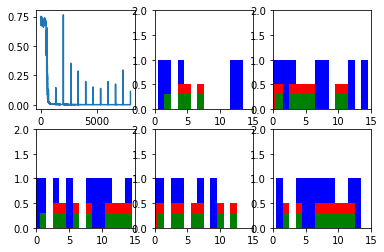

Step 100 Loss 0.00033062292


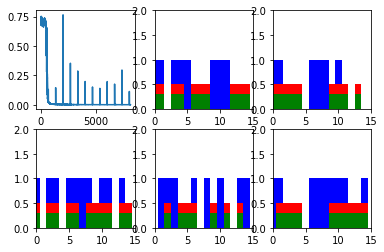

Step 200 Loss 0.00027628156


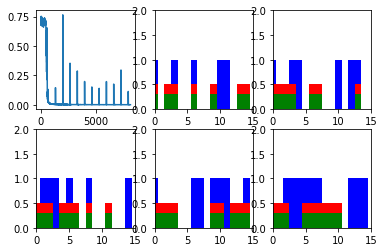

Step 300 Loss 0.0003251142


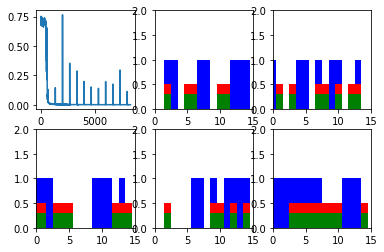

Step 400 Loss 0.00026576177


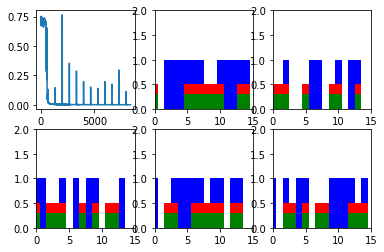

Step 500 Loss 0.00023941336


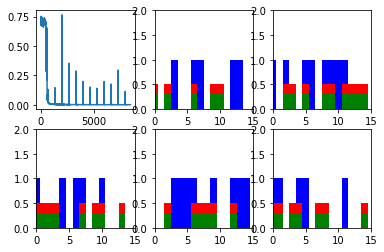

Step 600 Loss 0.0003218584


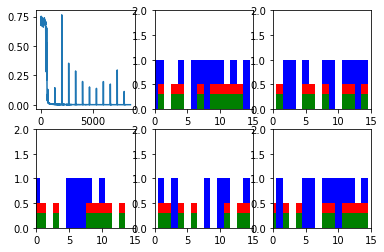

New data, epoch 13
Step 0 Loss 0.2549989


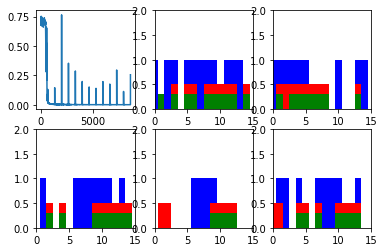

Step 100 Loss 0.00024094031


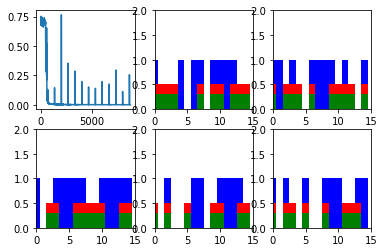

Step 200 Loss 0.0003082719


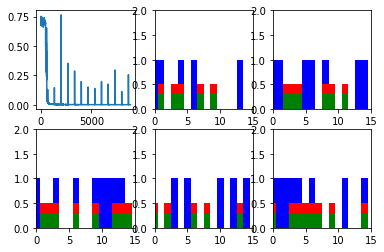

Step 300 Loss 0.00024031443


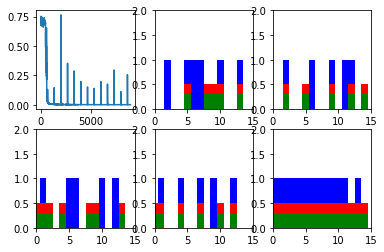

Step 400 Loss 0.00024572


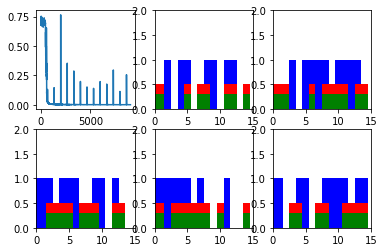

Step 500 Loss 0.00031741837


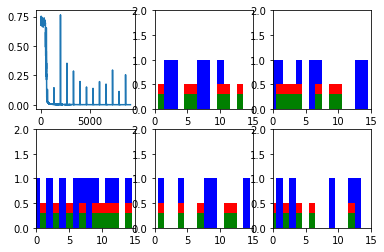

Step 600 Loss 0.00033279543


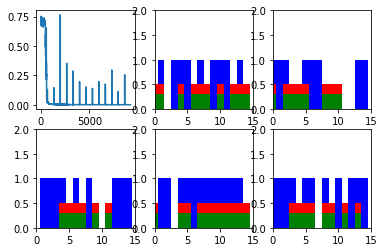

New data, epoch 14
Step 0 Loss 0.12008933


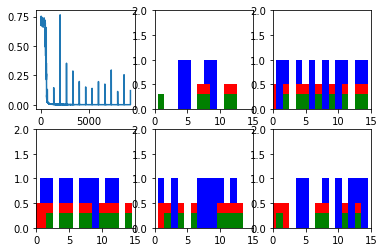

Step 100 Loss 0.000332471


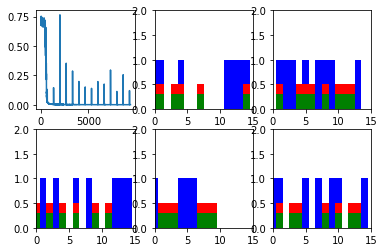

Step 200 Loss 0.00027494025


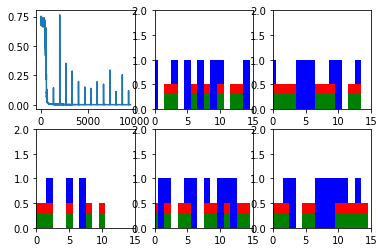

Step 300 Loss 0.0002991612


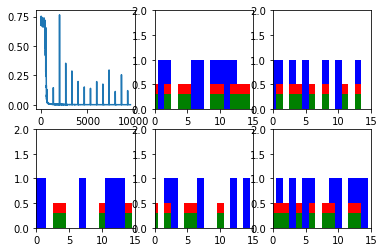

Step 400 Loss 0.00027093486


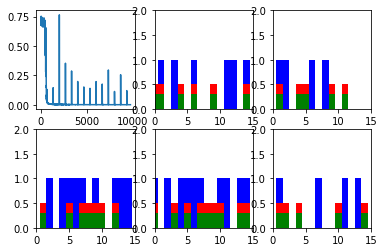

Step 500 Loss 0.00024227294


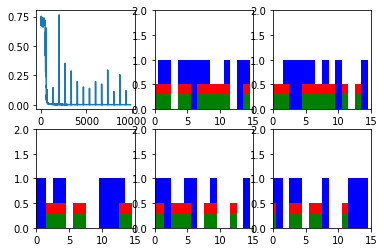

Step 600 Loss 0.00027267687


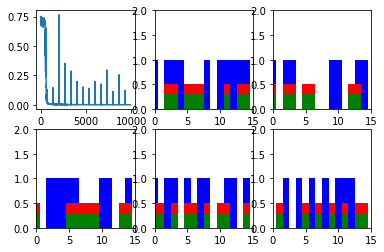

New data, epoch 15
Step 0 Loss 0.25844884


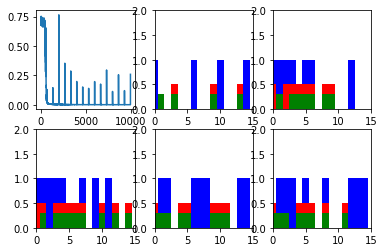

Step 100 Loss 0.0003484986


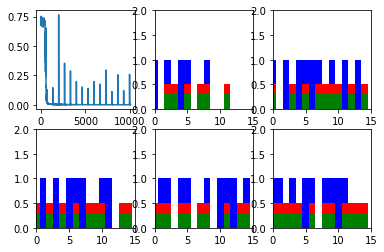

Step 200 Loss 0.00027887028


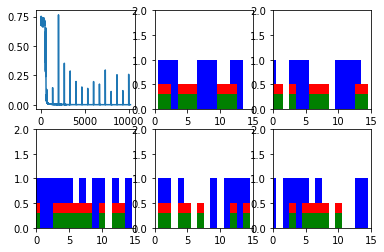

Step 300 Loss 0.00021634002


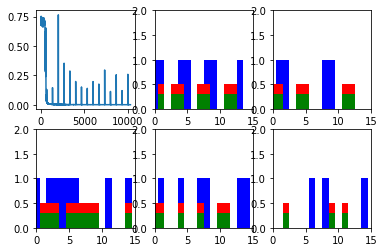

Step 400 Loss 0.0002545062


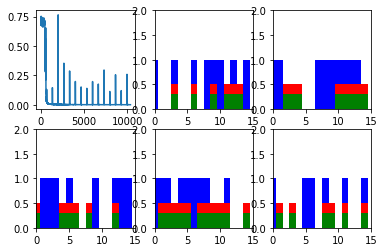

Step 500 Loss 0.0002931775


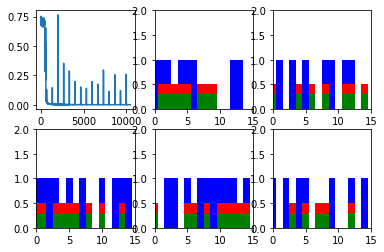

Step 600 Loss 0.00019138817


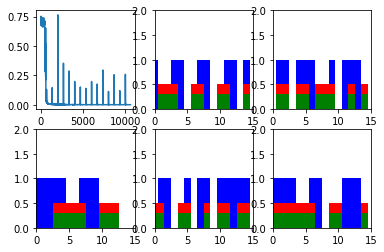

New data, epoch 16
Step 0 Loss 0.1988287


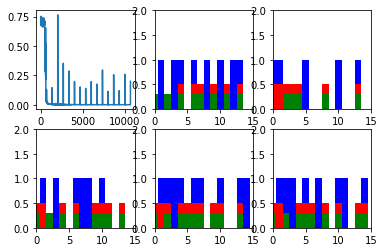

Step 100 Loss 0.00028498552


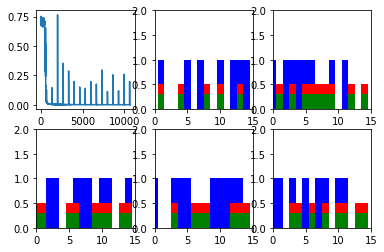

Step 200 Loss 0.0002662735


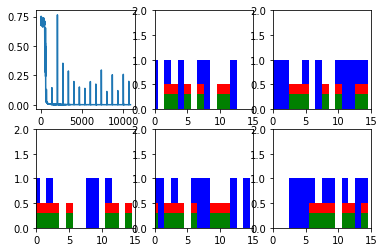

Step 300 Loss 0.00031950753


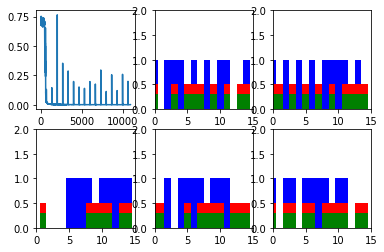

Step 400 Loss 0.00023007786


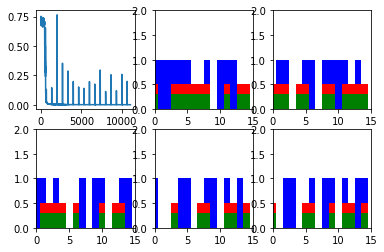

Step 500 Loss 0.00021356503


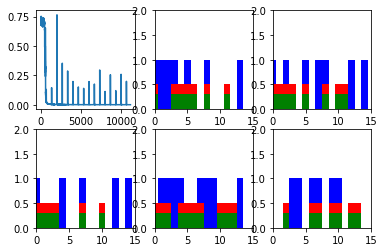

Step 600 Loss 0.00024086233


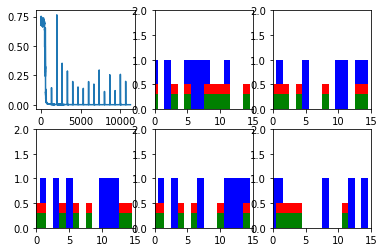

New data, epoch 17
Step 0 Loss 0.22665009


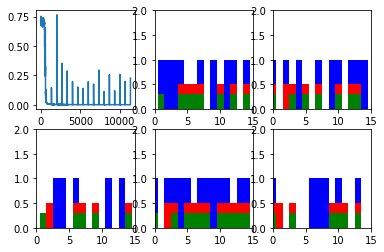

Step 100 Loss 0.00022880969


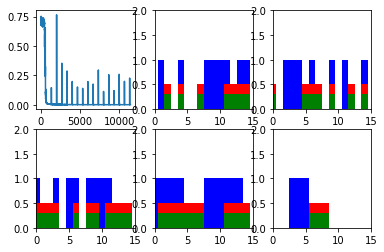

Step 200 Loss 0.00027990012


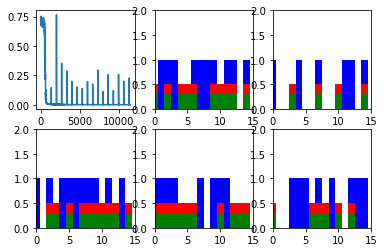

Step 300 Loss 0.00027577303


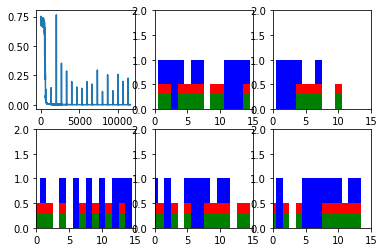

Step 400 Loss 0.0002145121


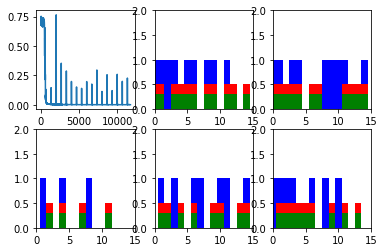

Step 500 Loss 0.00030585713


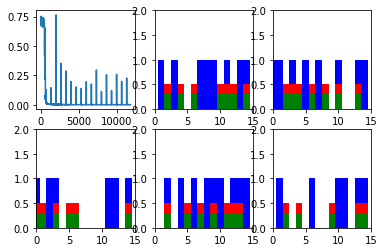

Step 600 Loss 0.00017038124


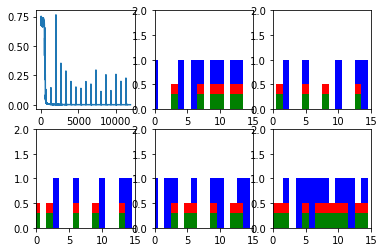

New data, epoch 18
Step 0 Loss 0.38235563


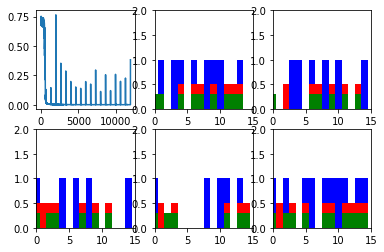

Step 100 Loss 0.00019618335


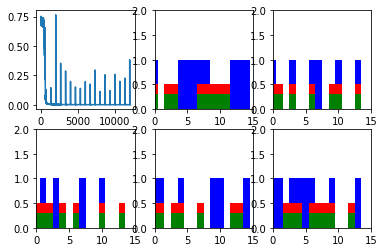

Step 200 Loss 0.00020110555


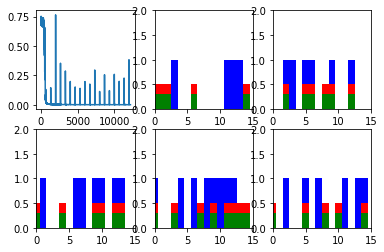

Step 300 Loss 0.00022345329


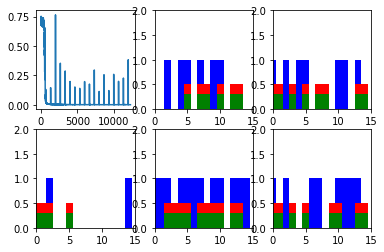

Step 400 Loss 0.0002073021


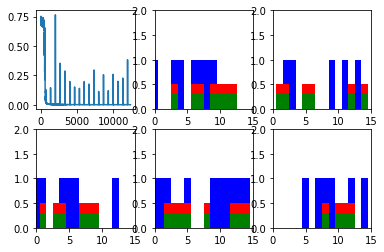

Step 500 Loss 0.00018160674


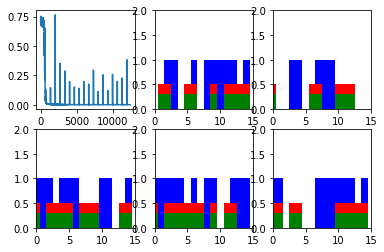

Step 600 Loss 0.0002303217


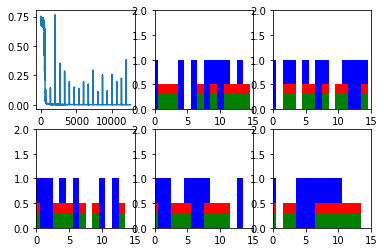

New data, epoch 19
Step 0 Loss 0.28491023


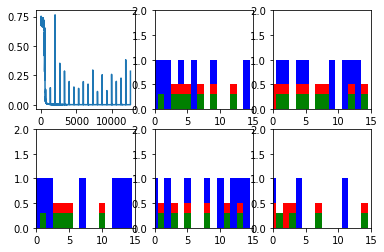

Step 100 Loss 0.00018505054


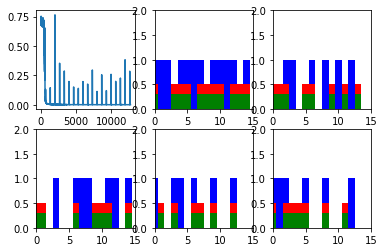

Step 200 Loss 0.00021213831


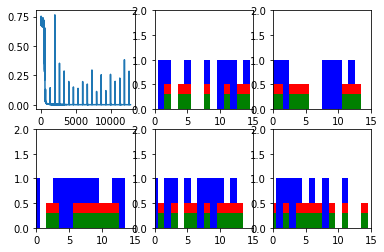

Step 300 Loss 0.00020913496


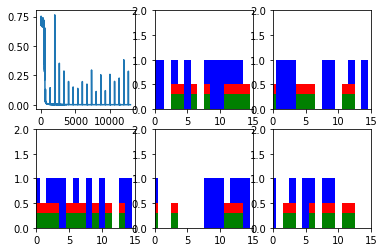

Step 400 Loss 0.0001962949


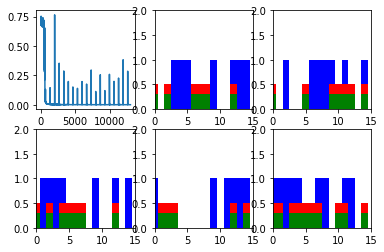

Step 500 Loss 0.00024363739


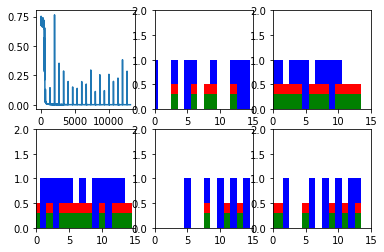

Step 600 Loss 0.00018264166


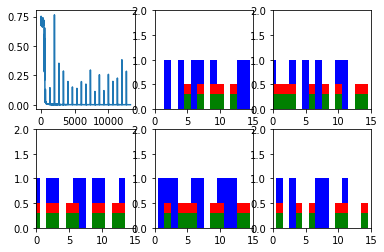

New data, epoch 20
Step 0 Loss 0.1782975


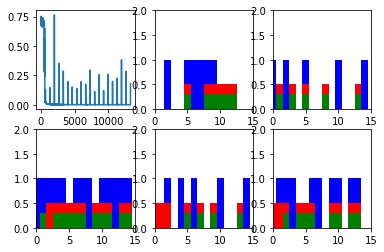

Step 100 Loss 0.00021600306


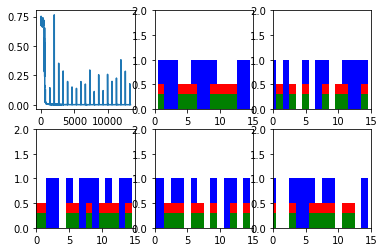

Step 200 Loss 0.000190326


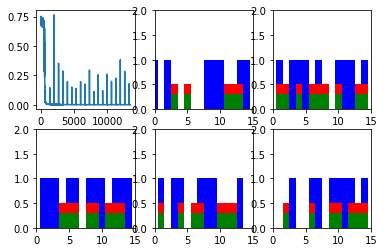

Step 300 Loss 0.00020530264


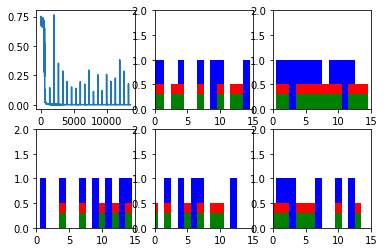

Step 400 Loss 0.00021661501


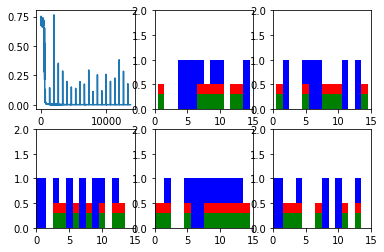

Step 500 Loss 0.00024383301


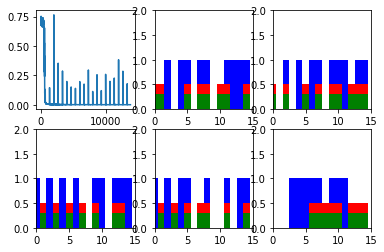

Step 600 Loss 0.00016936845


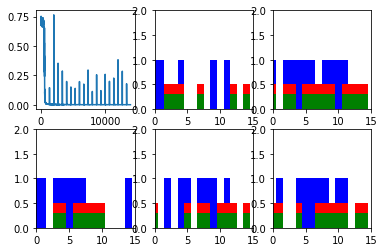

New data, epoch 21
Step 0 Loss 0.3117263


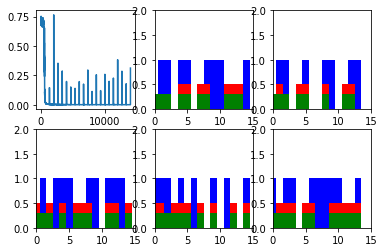

Step 100 Loss 0.00022512935


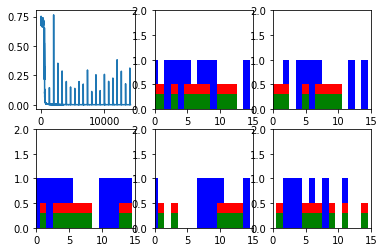

Step 200 Loss 0.00021741688


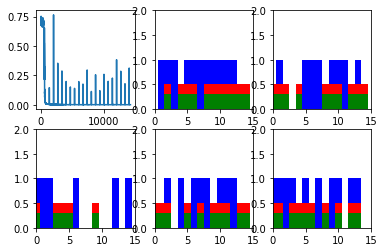

Step 300 Loss 0.00023478143


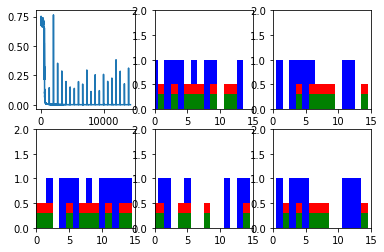

Step 400 Loss 0.00016986583


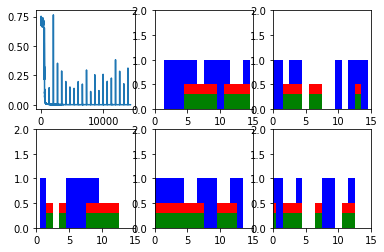

Step 500 Loss 0.00020991308


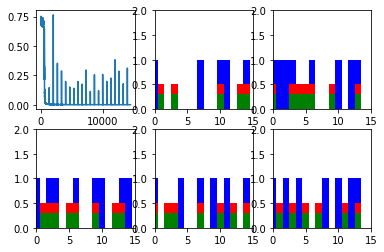

Step 600 Loss 0.00016081732


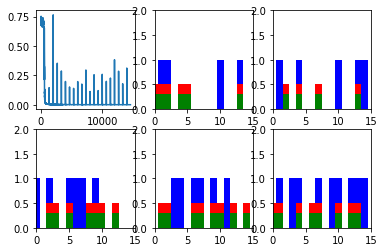

New data, epoch 22
Step 0 Loss 0.1705112


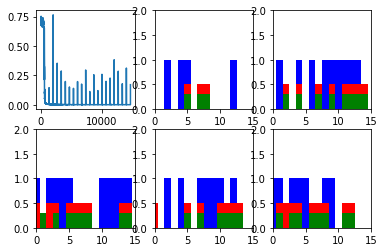

Step 100 Loss 0.00021735794


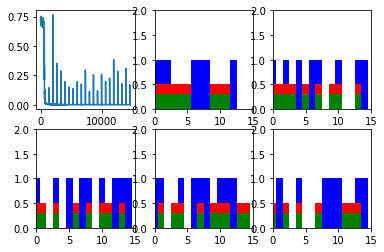

Step 200 Loss 0.0001736671


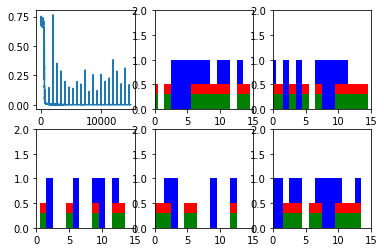

Step 300 Loss 0.00017363027


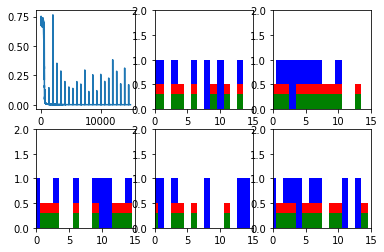

Step 400 Loss 0.00017827503


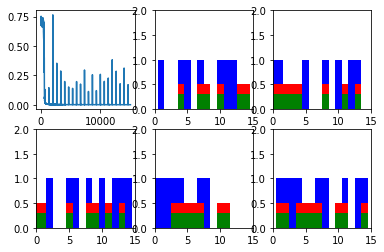

Step 500 Loss 0.00021191796


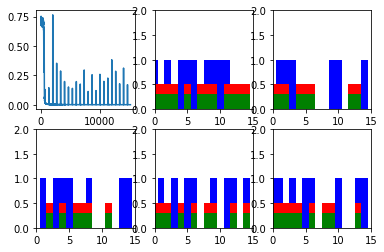

Step 600 Loss 0.00018467248


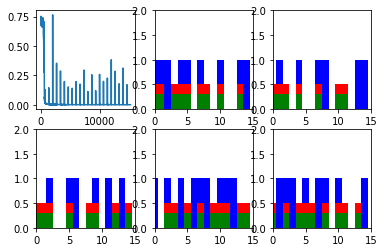

New data, epoch 23
Step 0 Loss 0.29016674


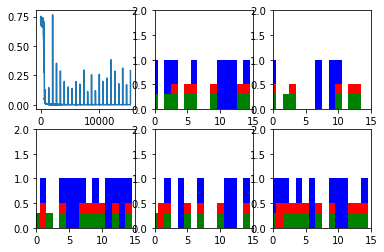

Step 100 Loss 0.00017112555


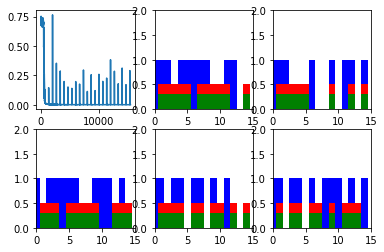

Step 200 Loss 0.000179108


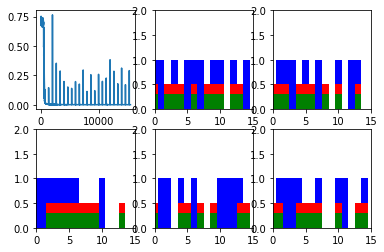

Step 300 Loss 0.00014607409


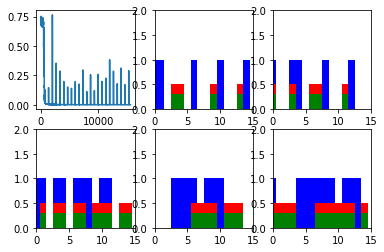

Step 400 Loss 0.00016979252


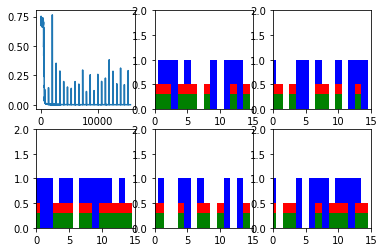

Step 500 Loss 0.0001456137


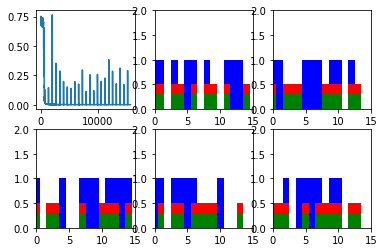

Step 600 Loss 0.00015796717


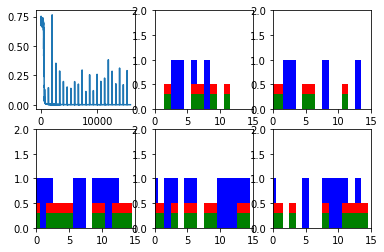

New data, epoch 24
Step 0 Loss 0.24967554


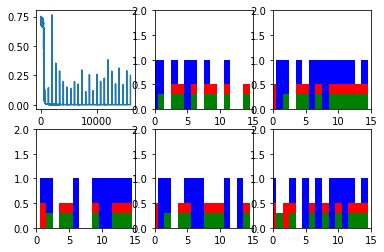

Step 100 Loss 0.0001991879


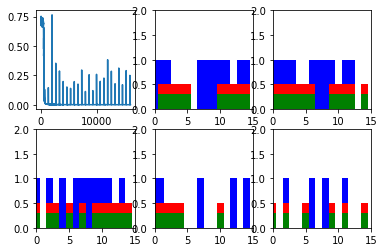

Step 200 Loss 0.0001811278


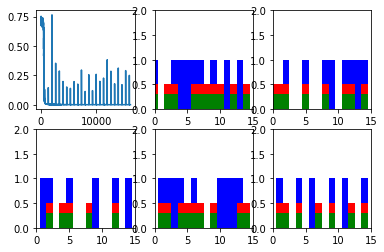

Step 300 Loss 0.00018209073


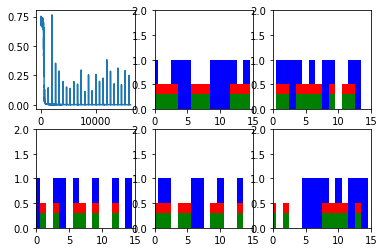

Step 400 Loss 0.00015743366


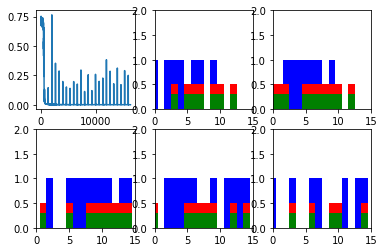

Step 500 Loss 0.00015742131


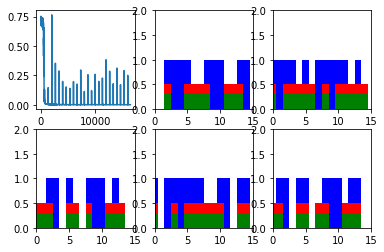

Step 600 Loss 0.00016545726


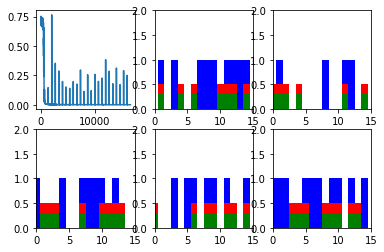

New data, epoch 25
Step 0 Loss 0.33764413


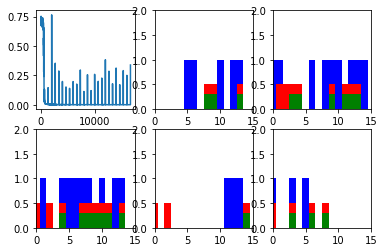

Step 100 Loss 0.00017229166


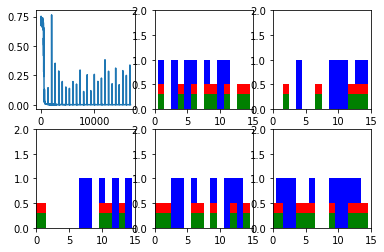

Step 200 Loss 0.0001715234


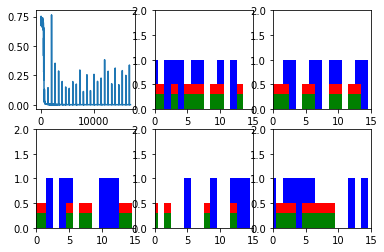

Step 300 Loss 0.00014700067


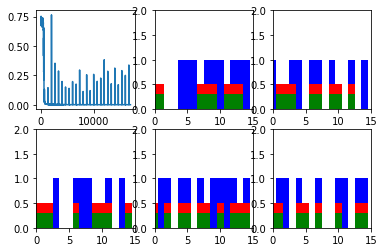

Step 400 Loss 0.00019057495


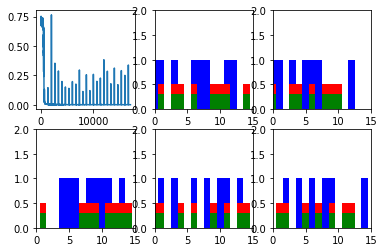

Step 500 Loss 0.00020019663


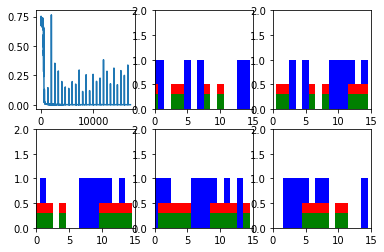

Step 600 Loss 0.000193954


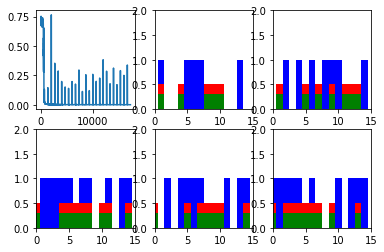

New data, epoch 26
Step 0 Loss 0.13803951


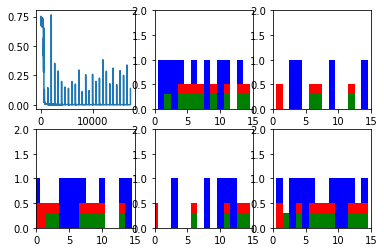

Step 100 Loss 0.00015183506


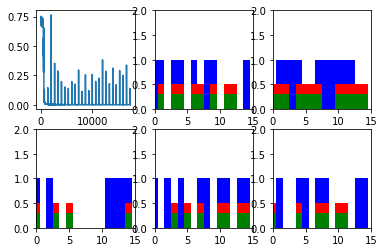

Step 200 Loss 0.0003200925


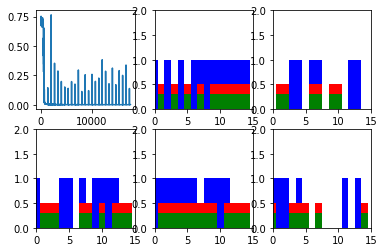

Step 300 Loss 0.00015076924


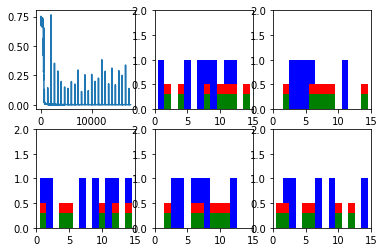

Step 400 Loss 0.00023536458


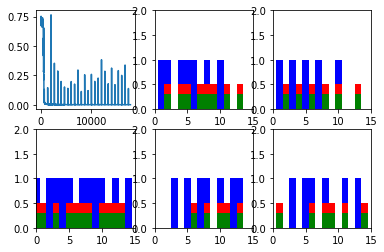

Step 500 Loss 0.00013091619


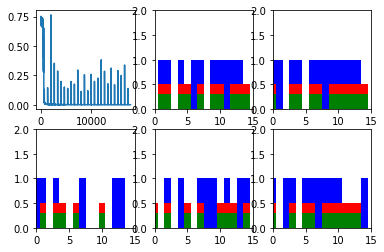

Step 600 Loss 0.00014768598


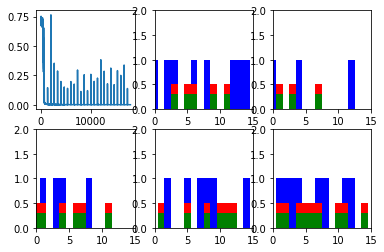

New data, epoch 27
Step 0 Loss 0.2975598


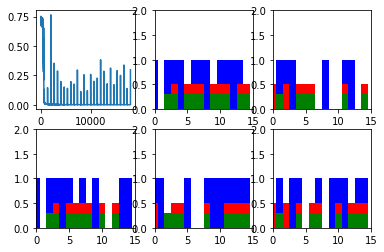

Step 100 Loss 0.00017327527


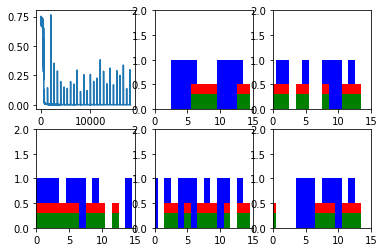

Step 200 Loss 0.00014995287


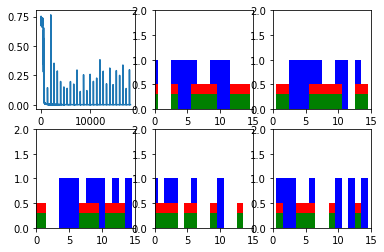

Step 300 Loss 0.00017436942


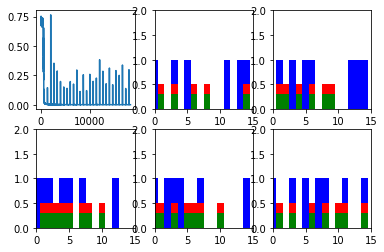

Step 400 Loss 0.00015893747


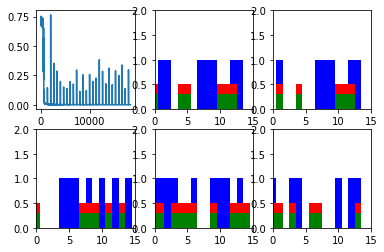

Step 500 Loss 0.0001516903


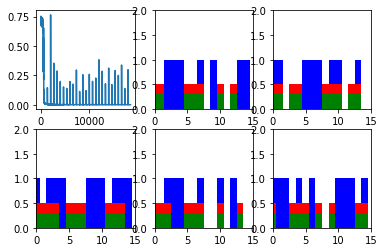

Step 600 Loss 0.000156412


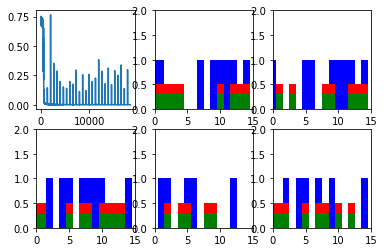

New data, epoch 28
Step 0 Loss 0.27862072


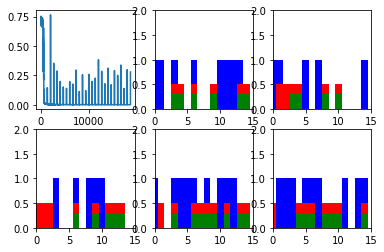

Step 100 Loss 0.00014440801


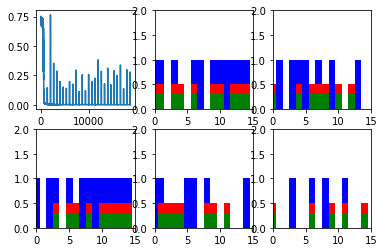

Step 200 Loss 0.00019042195


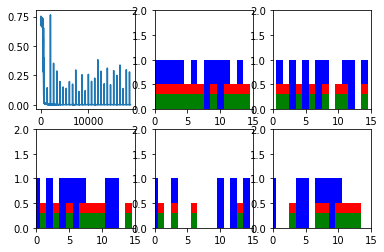

Step 300 Loss 0.00013498377


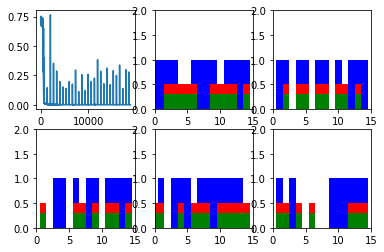

Step 400 Loss 0.00012249082


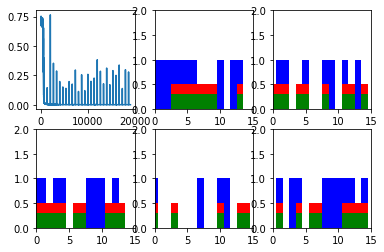

Step 500 Loss 0.00010799836


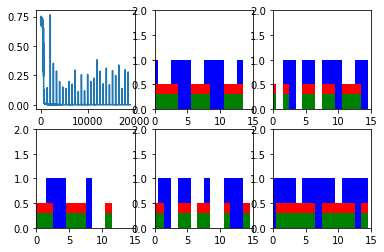

Step 600 Loss 0.00016605767


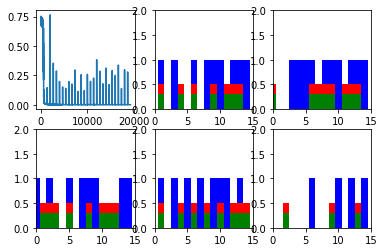

New data, epoch 29
Step 0 Loss 0.17751653


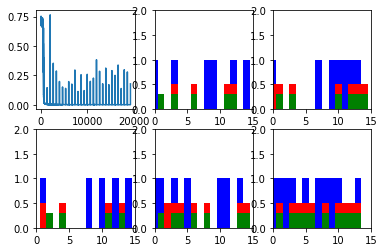

Step 100 Loss 0.00013328093


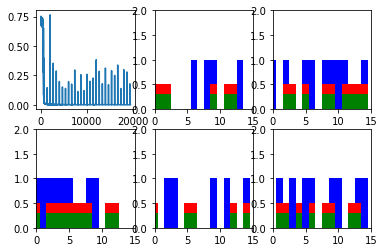

Step 200 Loss 0.00011832699


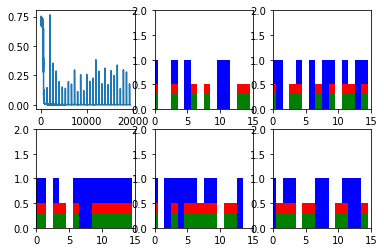

Step 300 Loss 0.00013873194


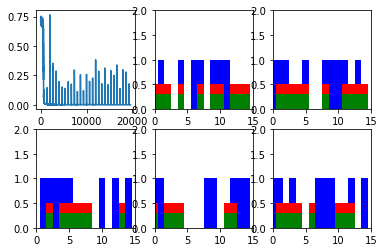

Step 400 Loss 0.00014399218


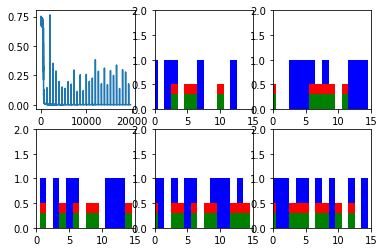

Step 500 Loss 0.0001412117


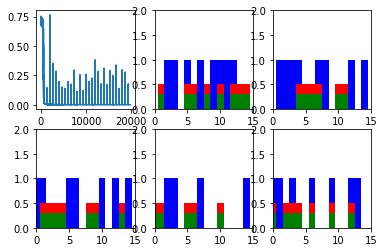

Step 600 Loss 0.00013644753


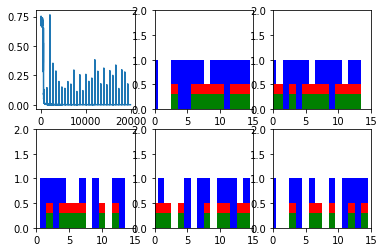

New data, epoch 30
Step 0 Loss 0.16477473


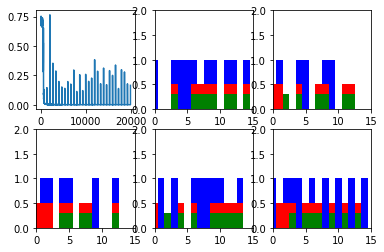

Step 100 Loss 0.00015536968


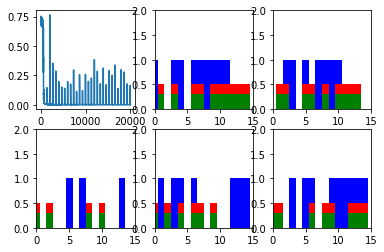

Step 200 Loss 0.00022955204


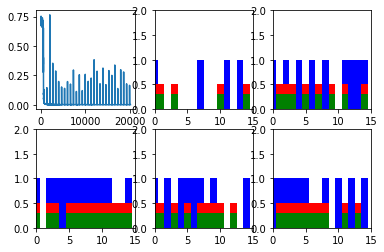

Step 300 Loss 0.00012082264


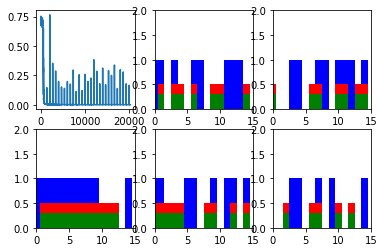

Step 400 Loss 0.00014380578


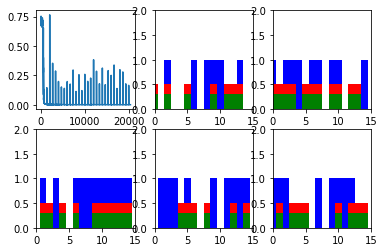

Step 500 Loss 0.00012544559


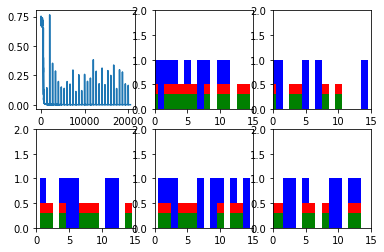

Step 600 Loss 0.00012858021


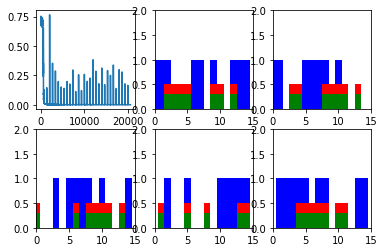

New data, epoch 31
Step 0 Loss 0.20316738


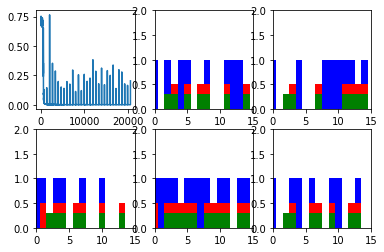

Step 100 Loss 0.00021029716


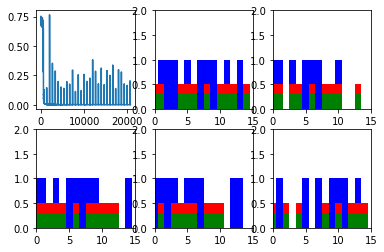

Step 200 Loss 0.00014183624


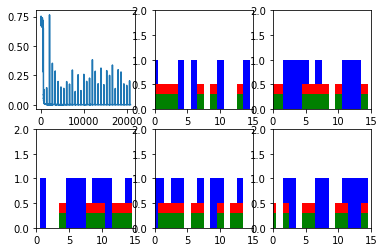

Step 300 Loss 0.0001235537


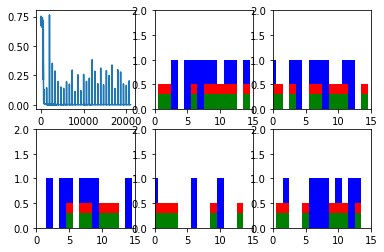

Step 400 Loss 0.00014073425


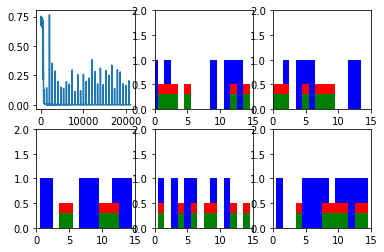

Step 500 Loss 0.00012833985


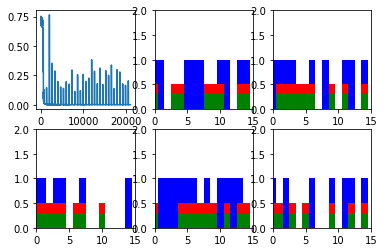

Step 600 Loss 0.00016611657


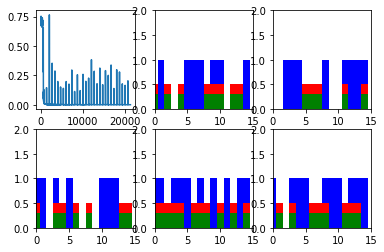

New data, epoch 32
Step 0 Loss 0.28943026


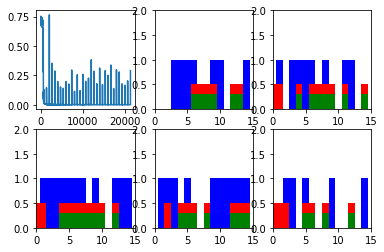

Step 100 Loss 0.00013417265


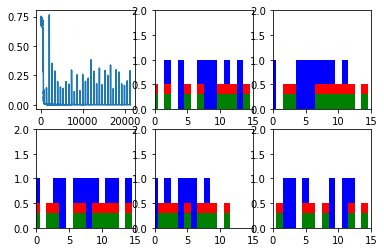

Step 200 Loss 0.00012161394


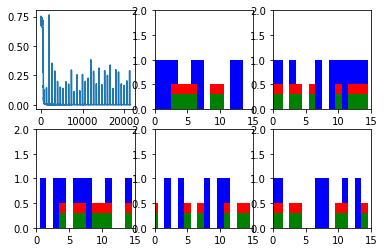

Step 300 Loss 0.00013508048


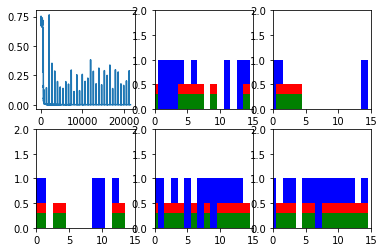

Step 400 Loss 0.00013976969


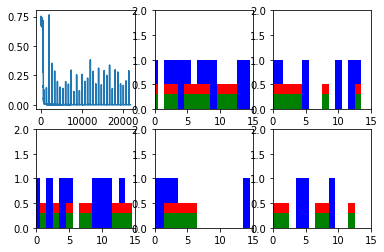

Step 500 Loss 0.00012714797


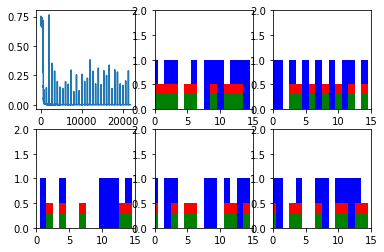

Step 600 Loss 0.0001284119


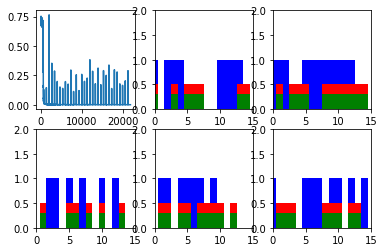

New data, epoch 33
Step 0 Loss 0.19840522


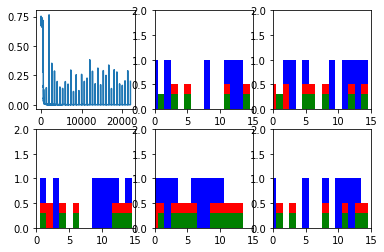

Step 100 Loss 0.0001251693


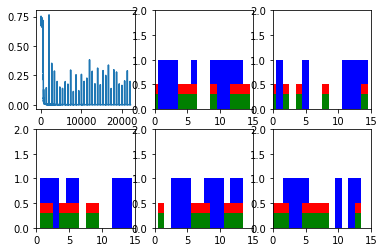

Step 200 Loss 0.00013258541


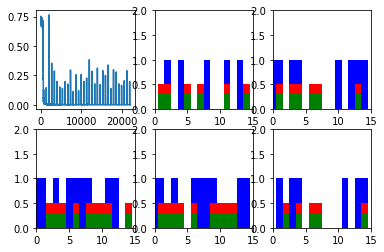

Step 300 Loss 0.00012491489


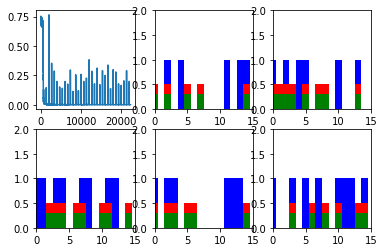

Step 400 Loss 0.00012213517


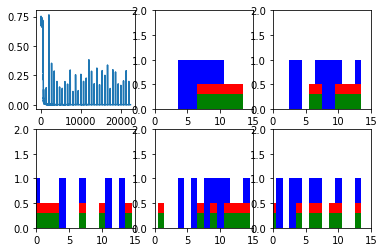

Step 500 Loss 0.000103292405


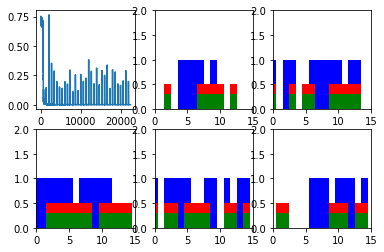

Step 600 Loss 0.00012387702


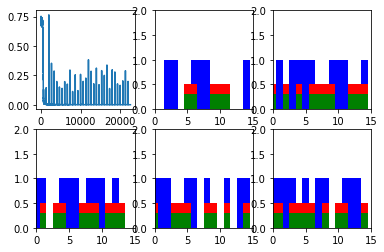

New data, epoch 34
Step 0 Loss 0.3391232


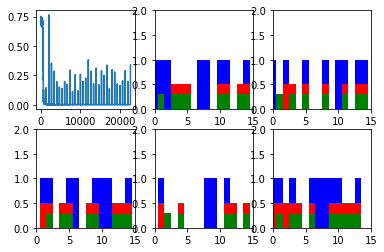

Step 100 Loss 0.00011795826


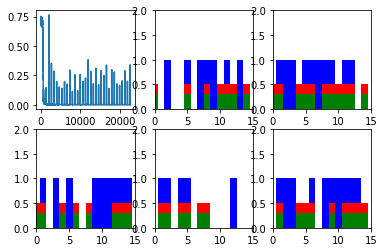

Step 200 Loss 0.000107106316


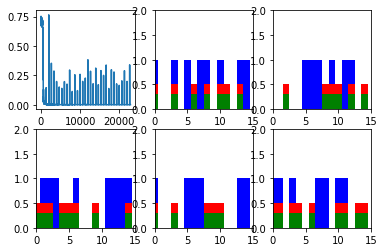

Step 300 Loss 0.00014057811


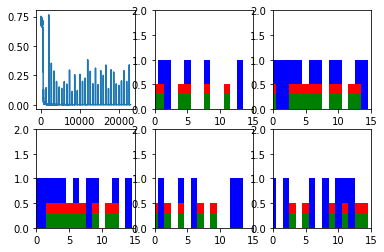

Step 400 Loss 0.00011001273


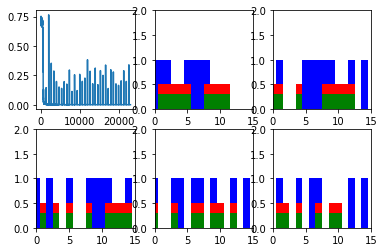

Step 500 Loss 0.00011335405


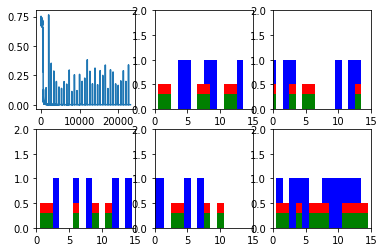

Step 600 Loss 0.0001277892


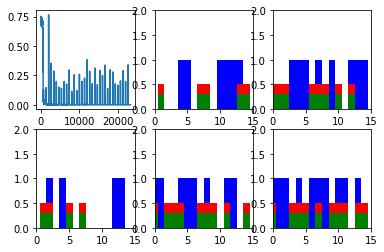

New data, epoch 35
Step 0 Loss 0.14183031


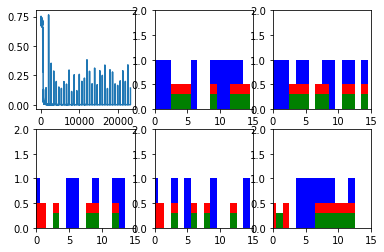

Step 100 Loss 0.00014551725


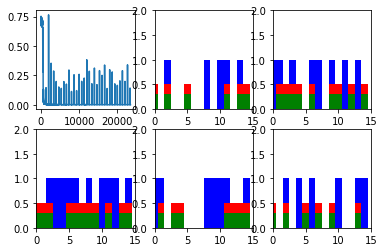

Step 200 Loss 0.00012049593


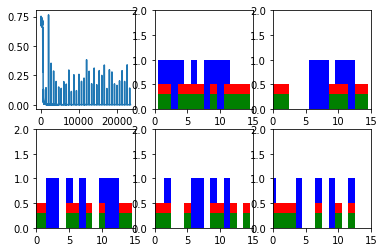

Step 300 Loss 0.00012954818


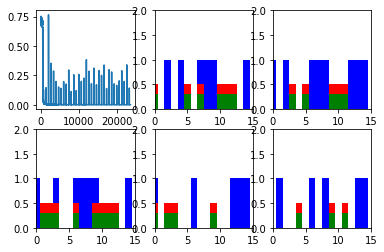

Step 400 Loss 0.0001165469


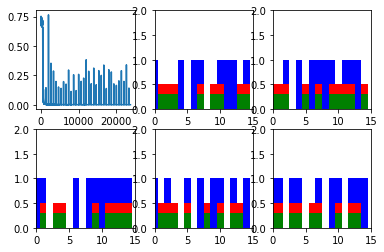

Step 500 Loss 0.000103765866


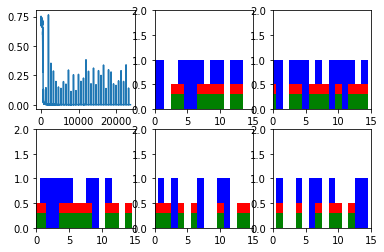

Step 600 Loss 0.0001440567


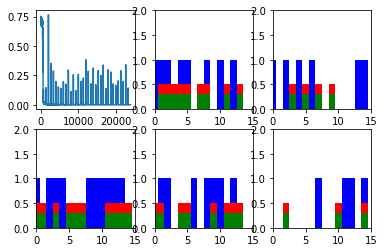

New data, epoch 36
Step 0 Loss 0.15140693


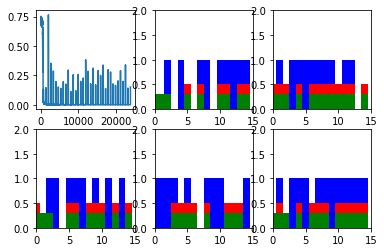

Step 100 Loss 9.8872195e-05


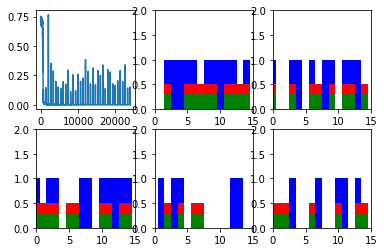

Step 200 Loss 0.00010938025


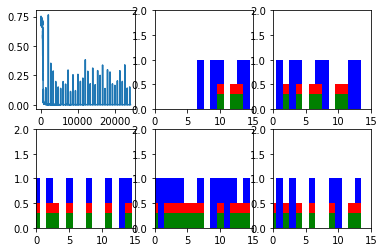

Step 300 Loss 0.00011066376


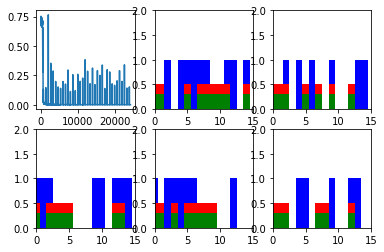

Step 400 Loss 0.00010365818


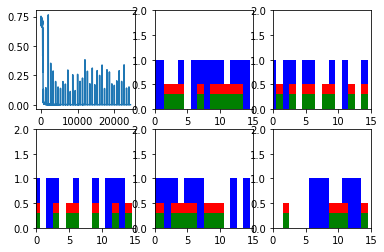

Step 500 Loss 8.967258e-05


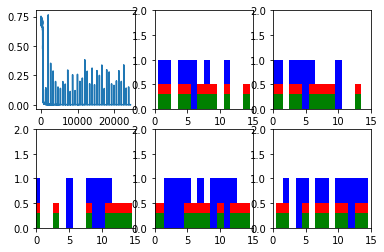

Step 600 Loss 9.618918e-05


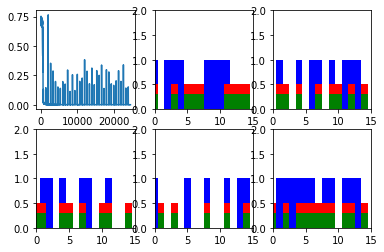

New data, epoch 37
Step 0 Loss 0.1338268


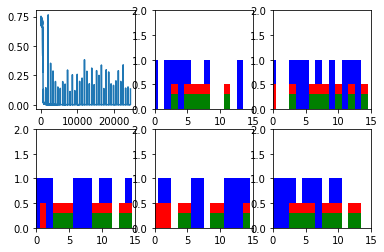

Step 100 Loss 8.350346e-05


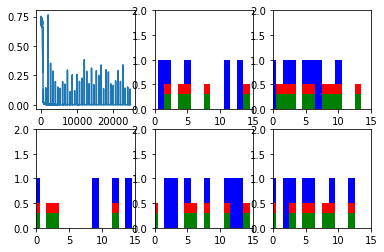

Step 200 Loss 9.437893e-05


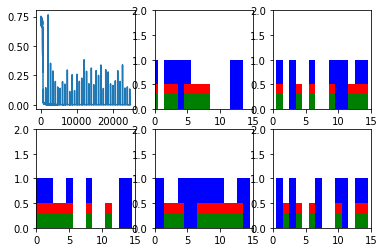

Step 300 Loss 0.00013019107


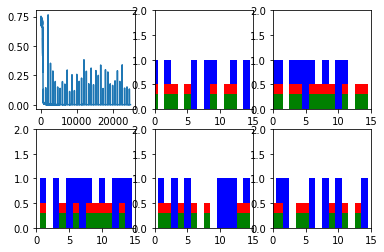

Step 400 Loss 0.00012004567


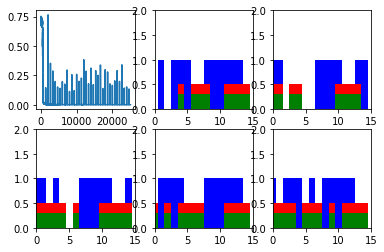

Step 500 Loss 9.093016e-05


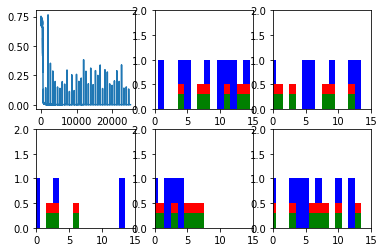

Step 600 Loss 0.000102741666


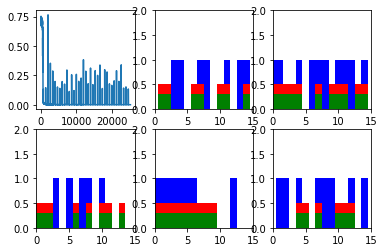

New data, epoch 38
Step 0 Loss 0.18073632


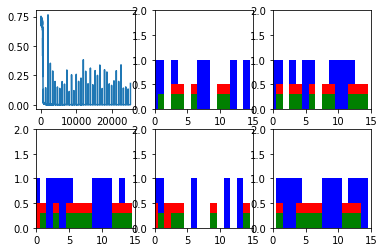

Step 100 Loss 0.00011646229


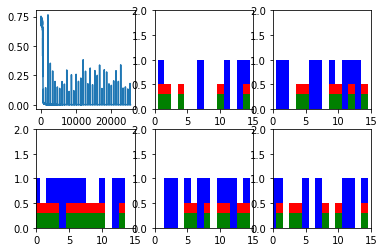

Step 200 Loss 0.000111291345


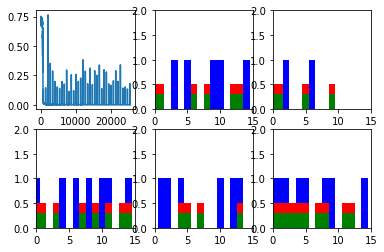

Step 300 Loss 0.00010910284


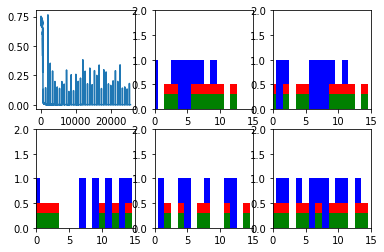

Step 400 Loss 0.000117436546


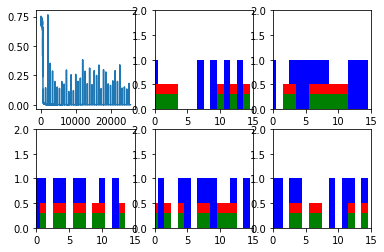

Step 500 Loss 0.00010215646


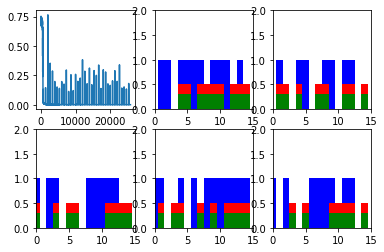

Step 600 Loss 0.00011448111


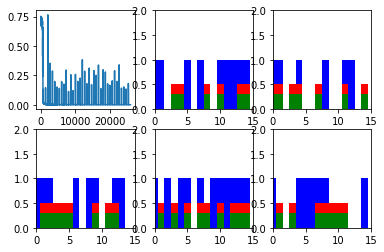

New data, epoch 39
Step 0 Loss 0.12397039


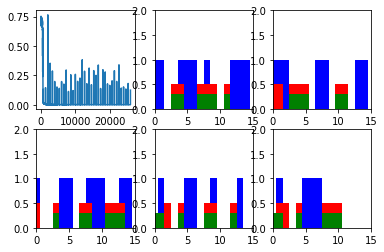

Step 100 Loss 9.626387e-05


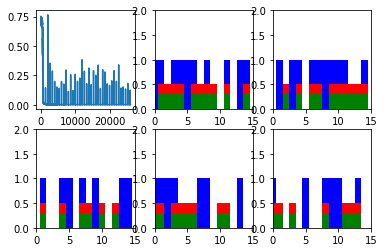

Step 200 Loss 8.901681e-05


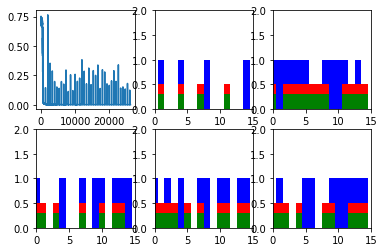

Step 300 Loss 0.0001019363


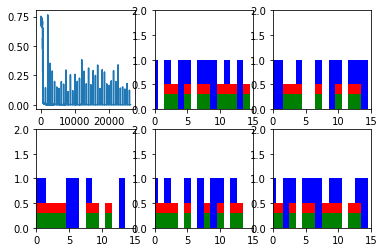

Step 400 Loss 0.00013156129


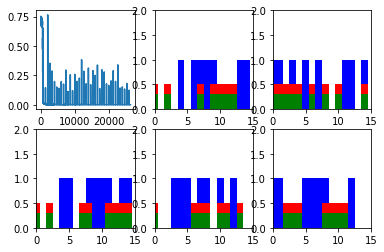

Step 500 Loss 0.00010456043


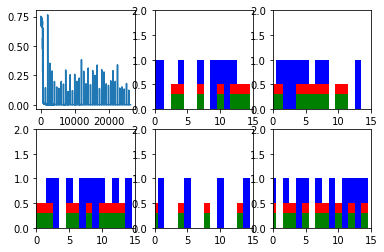

Step 600 Loss 0.00010998733


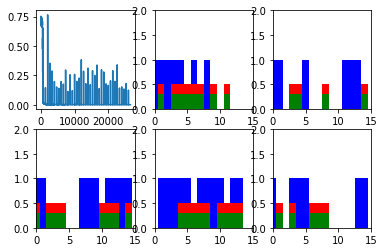

New data, epoch 40
Step 0 Loss 0.20271514


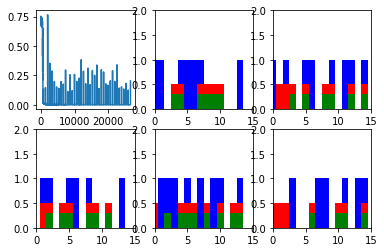

Step 100 Loss 8.724362e-05


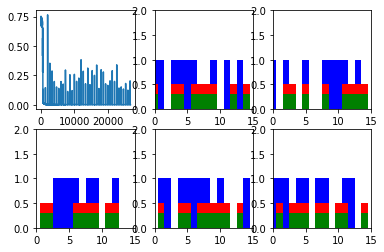

Step 200 Loss 0.00012134377


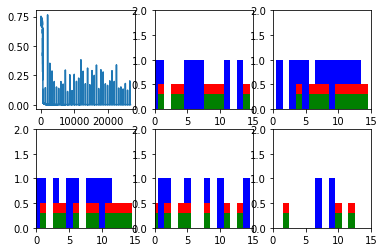

Step 300 Loss 0.000103088205


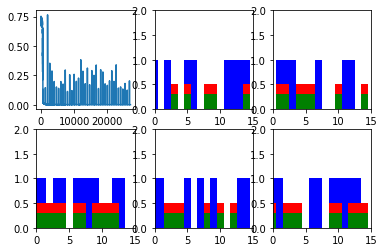

Step 400 Loss 0.00010222905


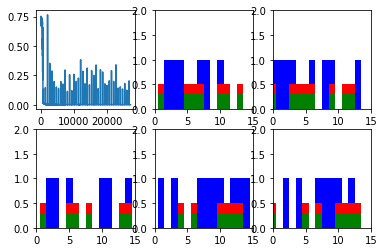

Step 500 Loss 9.3303825e-05


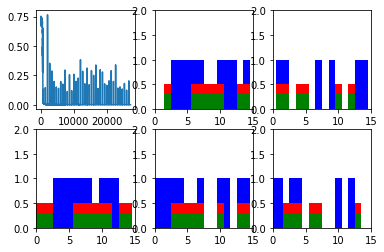

Step 600 Loss 0.00050050573


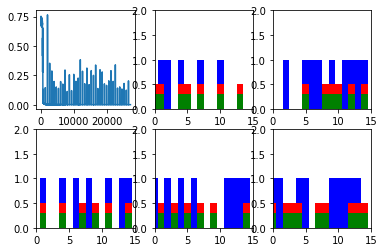

New data, epoch 41
Step 0 Loss 0.14207989


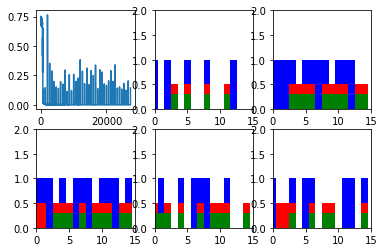

Step 100 Loss 9.107264e-05


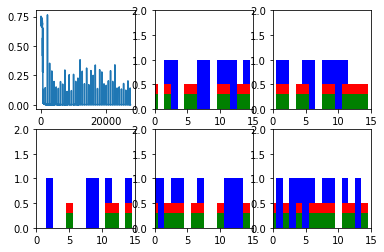

Step 200 Loss 0.0001406214


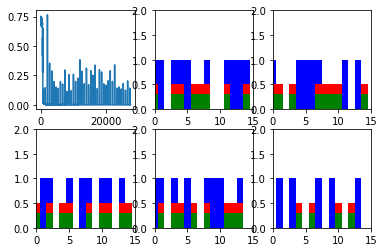

Step 300 Loss 7.884672e-05


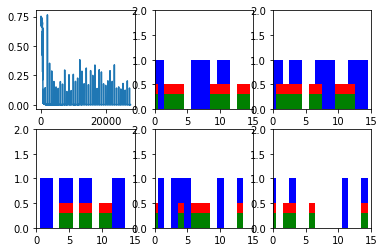

Step 400 Loss 0.00011256752


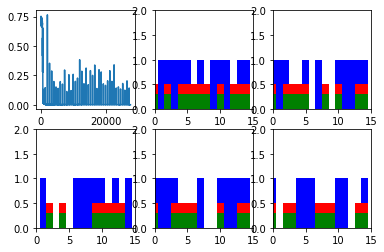

Step 500 Loss 7.5556294e-05


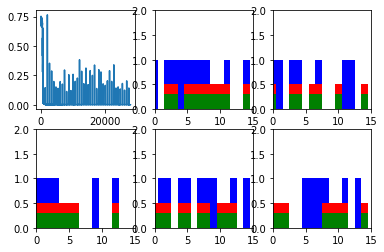

Step 600 Loss 8.9903886e-05


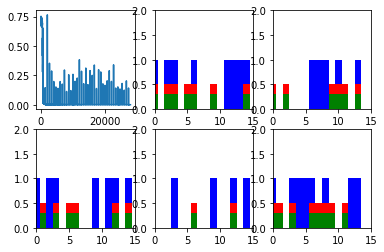

New data, epoch 42
Step 0 Loss 0.17191574


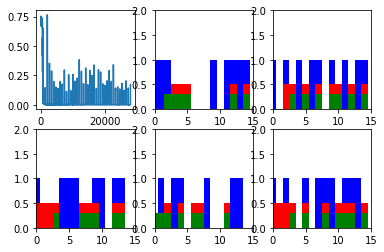

Step 100 Loss 9.7286014e-05


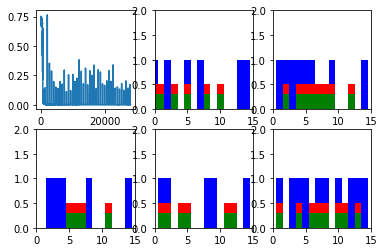

Step 200 Loss 8.7266104e-05


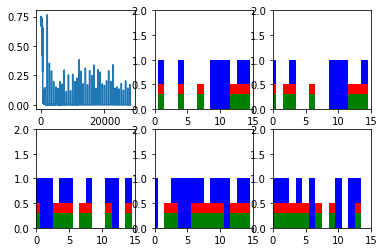

Step 300 Loss 0.00012503825


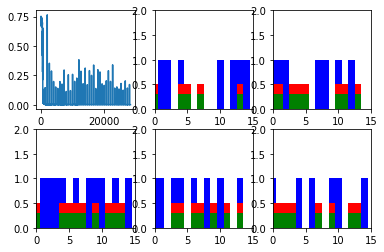

Step 400 Loss 0.00012819706


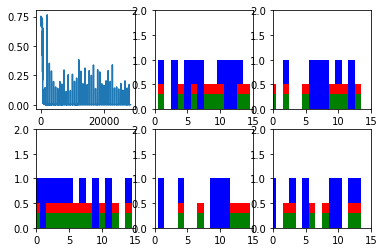

Step 500 Loss 9.277895e-05


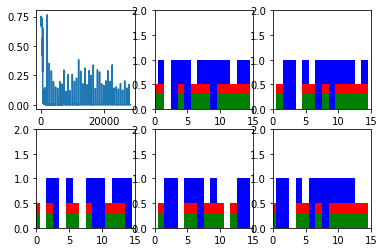

Step 600 Loss 8.441307e-05


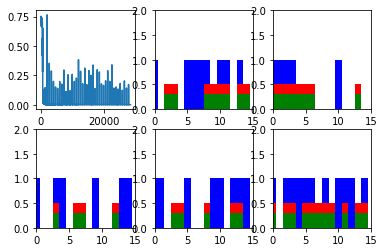

New data, epoch 43
Step 0 Loss 0.27055332


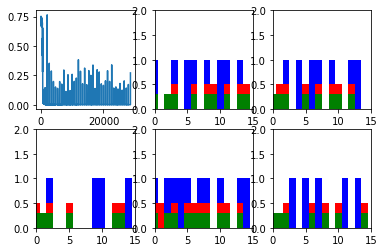

Step 100 Loss 8.357763e-05


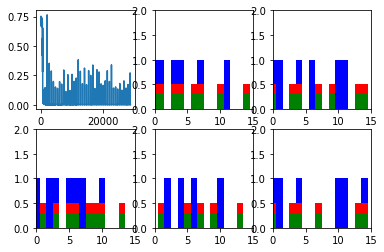

Step 200 Loss 8.697907e-05


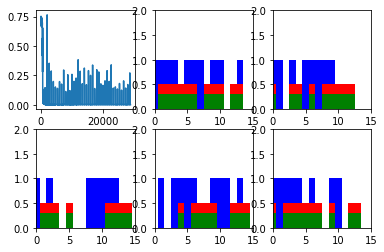

Step 300 Loss 0.00010850945


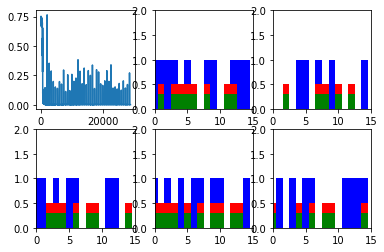

Step 400 Loss 8.829459e-05


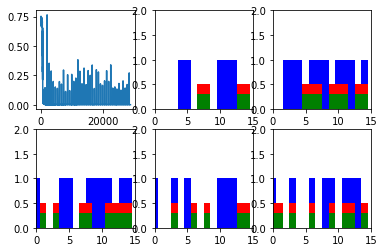

Step 500 Loss 0.00012259187


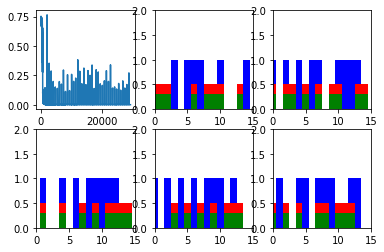

Step 600 Loss 9.0783455e-05


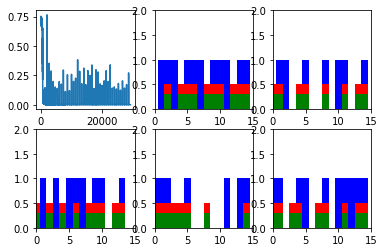

New data, epoch 44
Step 0 Loss 0.16521236


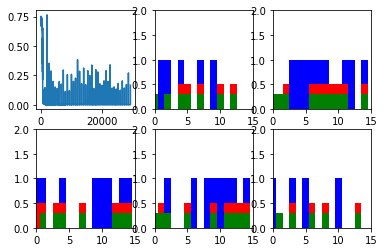

Step 100 Loss 8.3671504e-05


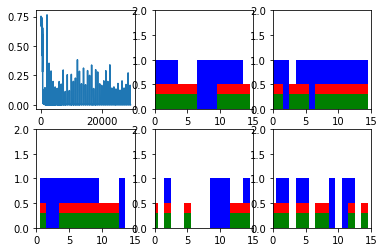

Step 200 Loss 8.008058e-05


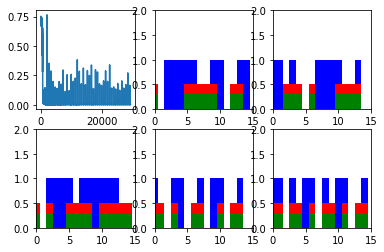

Step 300 Loss 8.684919e-05


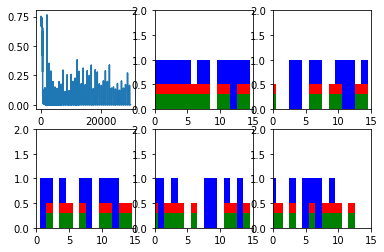

Step 400 Loss 8.2969855e-05


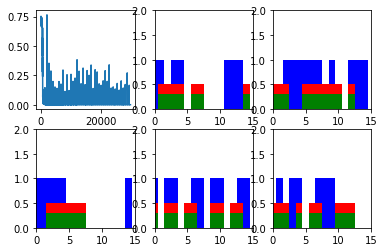

Step 500 Loss 0.00010520304


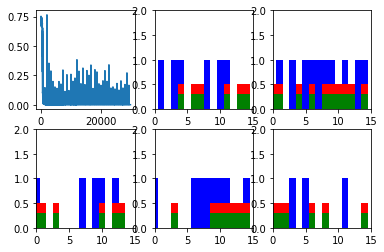

Step 600 Loss 9.002599e-05


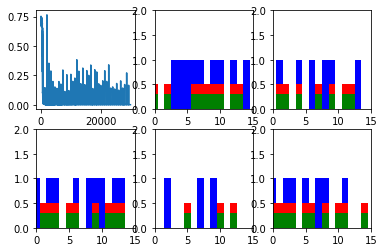

New data, epoch 45
Step 0 Loss 0.28113177


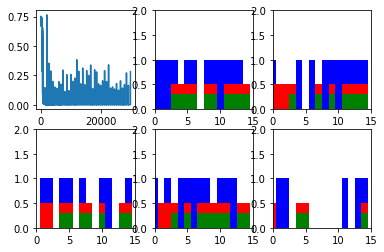

Step 100 Loss 7.561218e-05


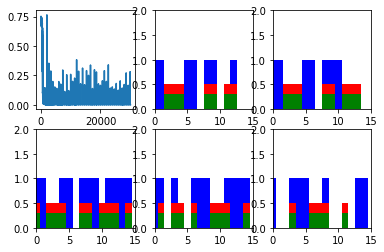

Step 200 Loss 9.5014075e-05


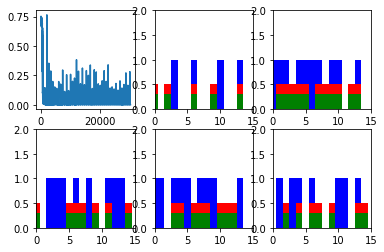

Step 300 Loss 7.925582e-05


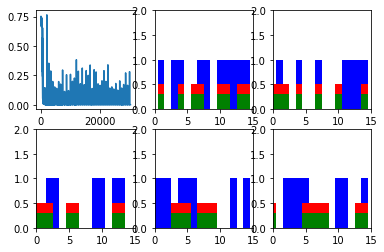

Step 400 Loss 7.458304e-05


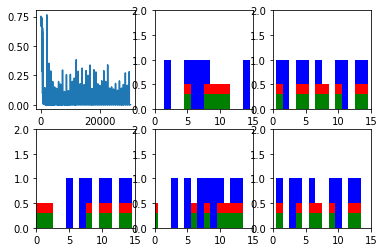

Step 500 Loss 9.570332e-05


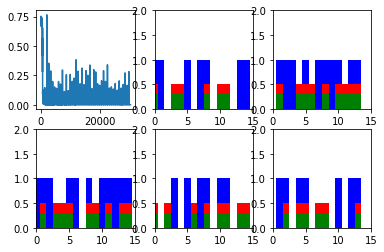

Step 600 Loss 9.481114e-05


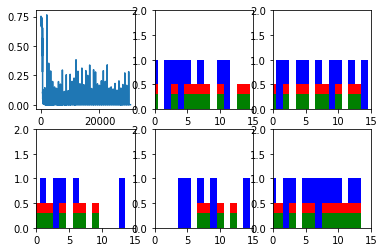

New data, epoch 46
Step 0 Loss 0.14245562


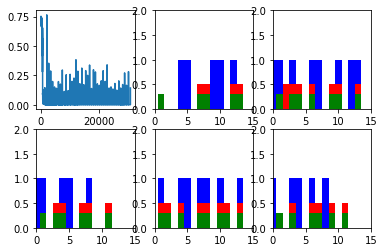

Step 100 Loss 8.004264e-05


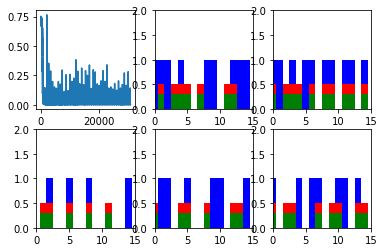

Step 200 Loss 0.000107424705


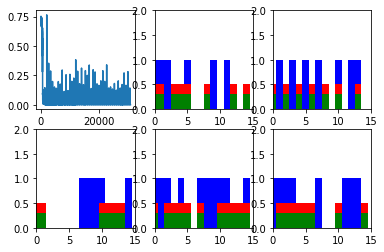

Step 300 Loss 9.678233e-05


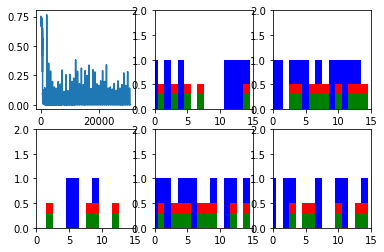

Step 400 Loss 8.370439e-05


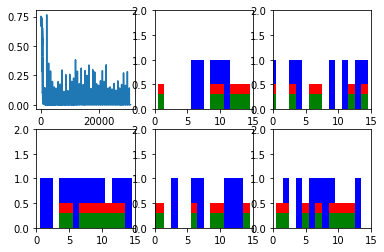

Step 500 Loss 8.7591e-05


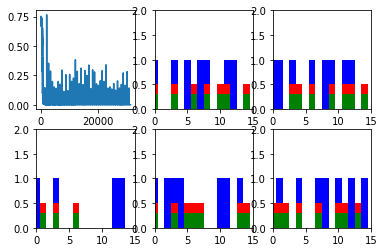

Step 600 Loss 9.8480916e-05


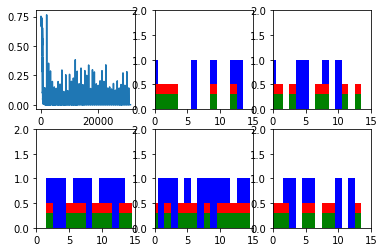

New data, epoch 47
Step 0 Loss 0.17465071


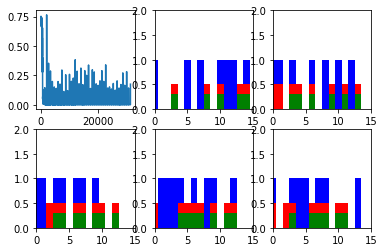

Step 100 Loss 0.000102646554


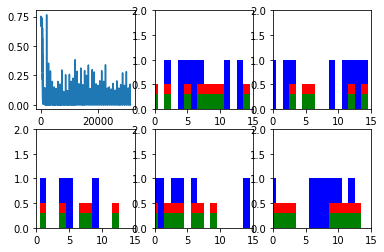

Step 200 Loss 9.547851e-05


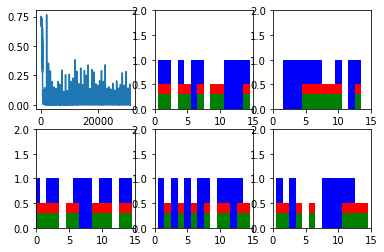

Step 300 Loss 7.717154e-05


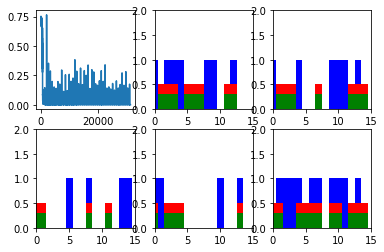

Step 400 Loss 8.504278e-05


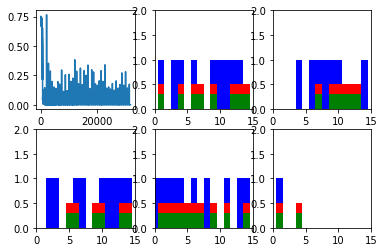

Step 500 Loss 8.441772e-05


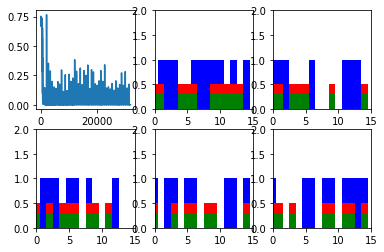

Step 600 Loss 7.362866e-05


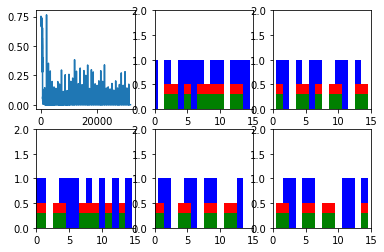

New data, epoch 48
Step 0 Loss 0.3411367


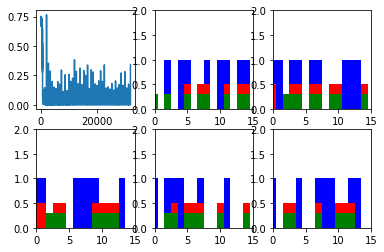

Step 100 Loss 8.835147e-05


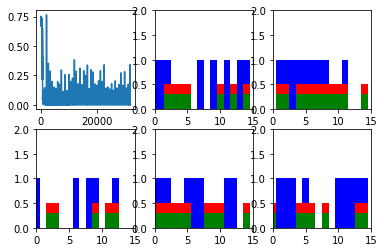

Step 200 Loss 0.00011018077


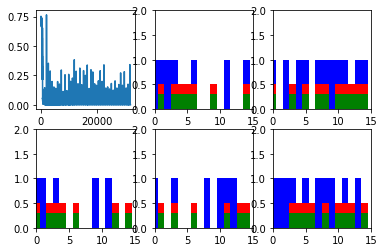

Step 300 Loss 8.546959e-05


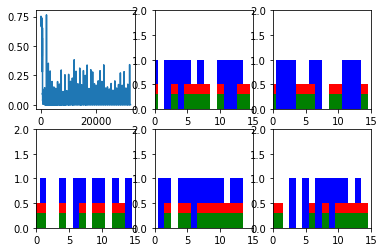

Step 400 Loss 9.1680304e-05


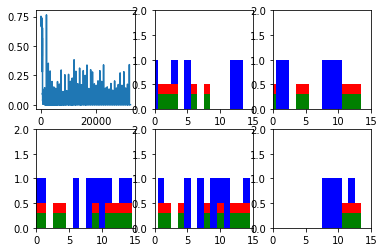

Step 500 Loss 8.1024125e-05


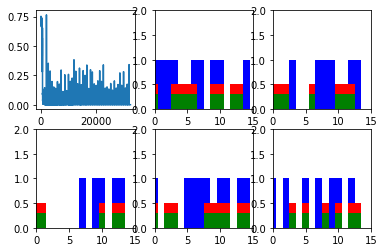

Step 600 Loss 8.861541e-05


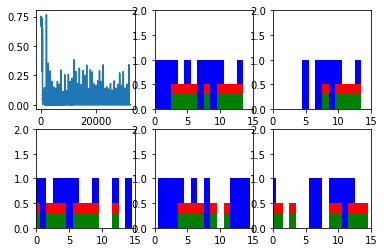

New data, epoch 49
Step 0 Loss 0.24097413


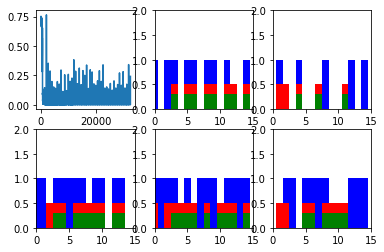

Step 100 Loss 0.00012276907


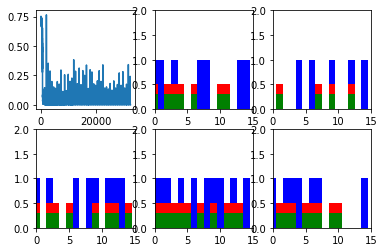

Step 200 Loss 9.397998e-05


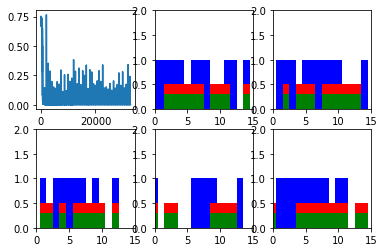

Step 300 Loss 9.021758e-05


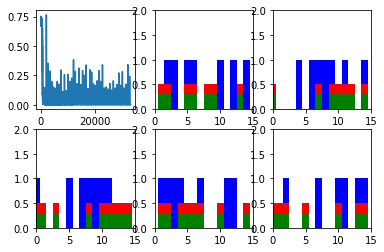

Step 400 Loss 0.00010085606


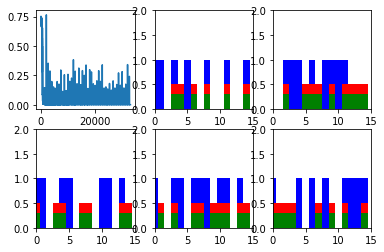

Step 500 Loss 0.00012789534


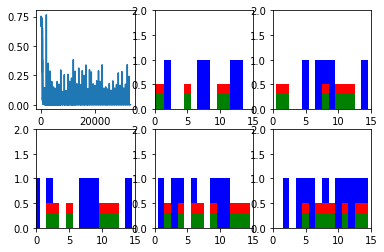

Step 600 Loss 0.00010883072


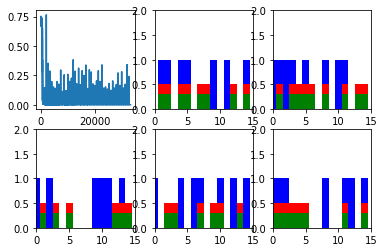

New data, epoch 50
Step 0 Loss 0.29655588


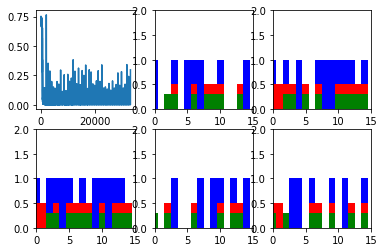

Step 100 Loss 9.736412e-05


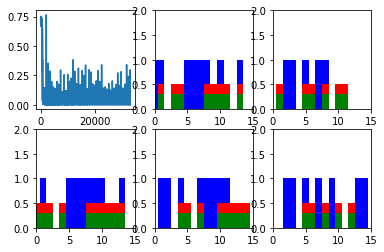

Step 200 Loss 7.817891e-05


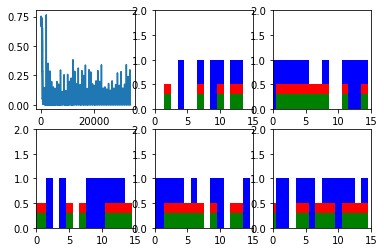

Step 300 Loss 8.825447e-05


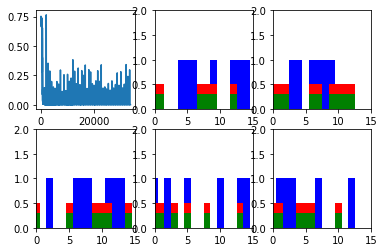

Step 400 Loss 0.000113104645


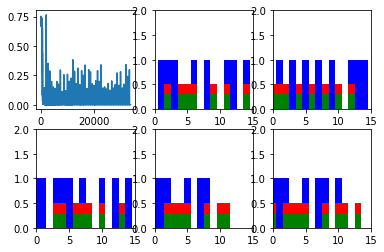

Step 500 Loss 0.000125732


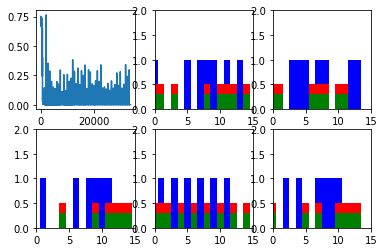

Step 600 Loss 7.077199e-05


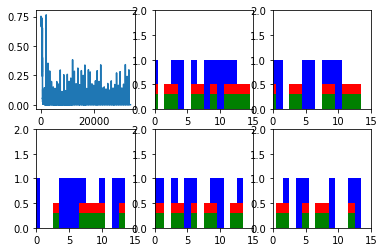

New data, epoch 51
Step 0 Loss 0.22712362


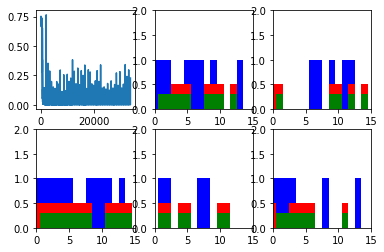

Step 100 Loss 0.00010135862


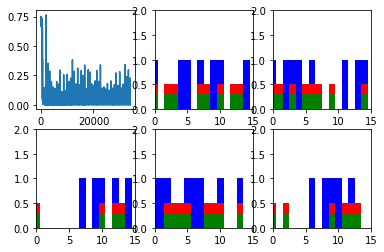

Step 200 Loss 0.00010281807


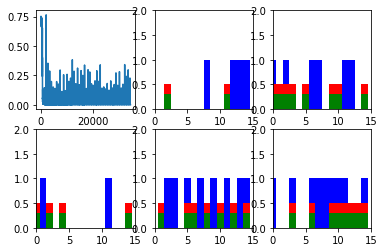

Step 300 Loss 8.7100736e-05


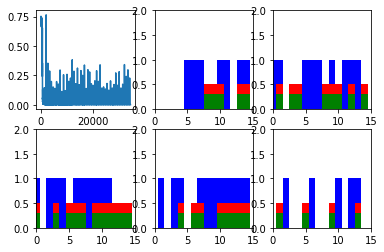

Step 400 Loss 8.3268256e-05


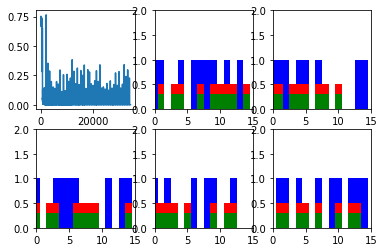

Step 500 Loss 7.8003184e-05


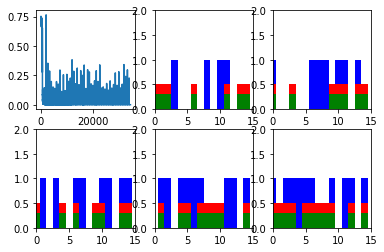

Step 600 Loss 9.796414e-05


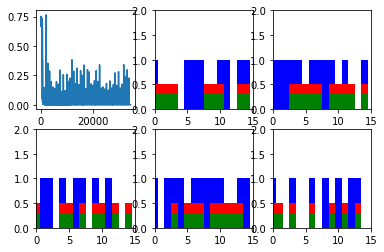

New data, epoch 52
Step 0 Loss 0.20345105


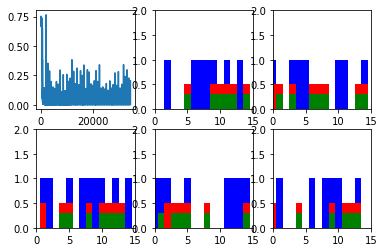

Step 100 Loss 6.527969e-05


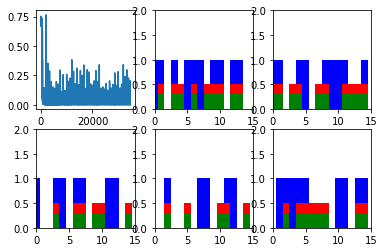

Step 200 Loss 7.350249e-05


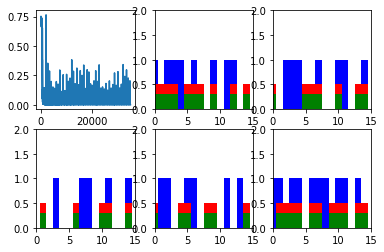

Step 300 Loss 9.4458825e-05


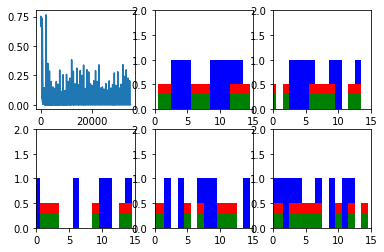

Step 400 Loss 9.44266e-05


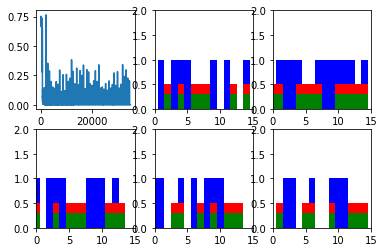

Step 500 Loss 0.000105672865


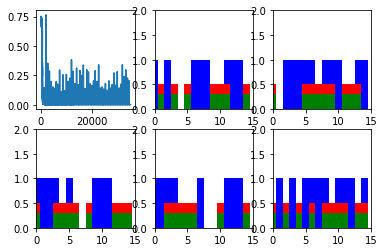

Step 600 Loss 9.528134e-05


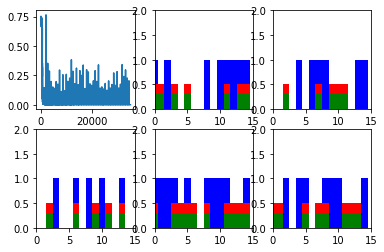

New data, epoch 53
Step 0 Loss 0.24529378


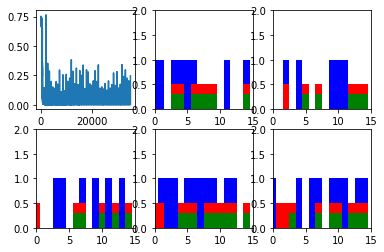

Step 100 Loss 7.971291e-05


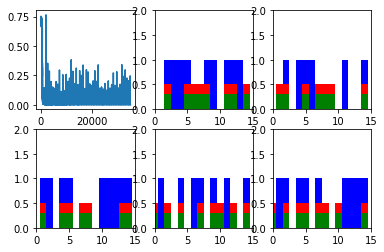

Step 200 Loss 0.00010089059


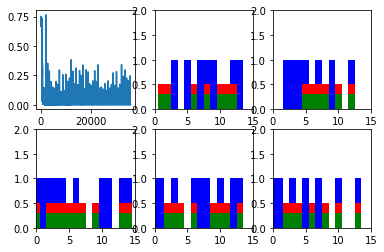

Step 300 Loss 9.372801e-05


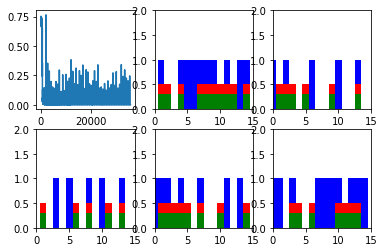

Step 400 Loss 9.8758865e-05


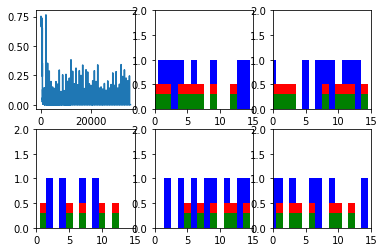

Step 500 Loss 8.637761e-05


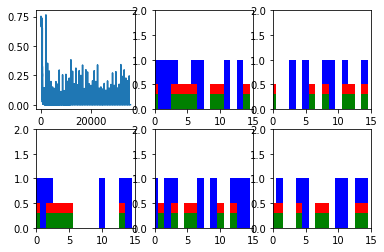

Step 600 Loss 8.234633e-05


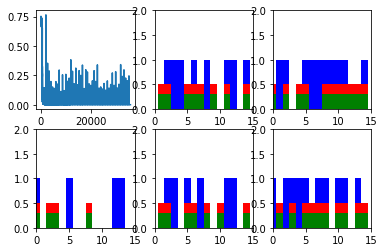

New data, epoch 54
Step 0 Loss 0.15664823


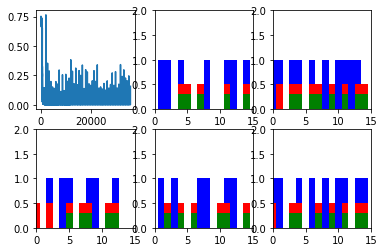

Step 100 Loss 8.939345e-05


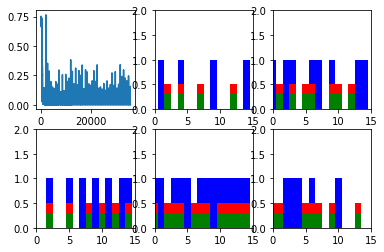

Step 200 Loss 7.979125e-05


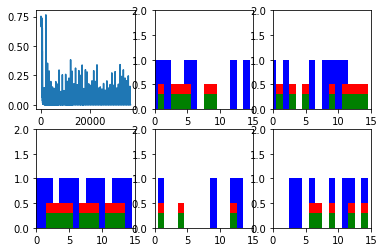

Step 300 Loss 9.735882e-05


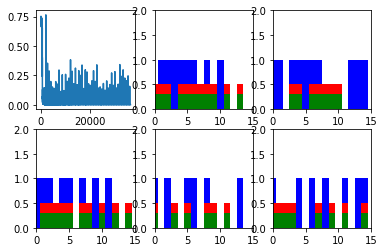

Step 400 Loss 0.00010172432


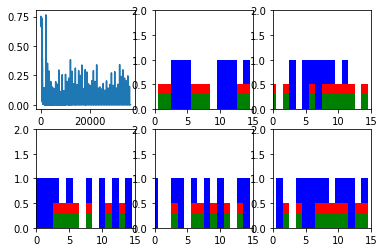

Step 500 Loss 7.225863e-05


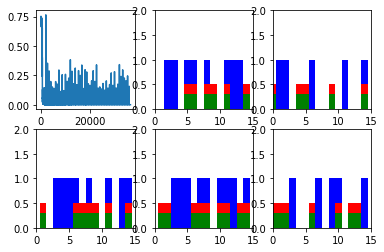

Step 600 Loss 7.2154624e-05


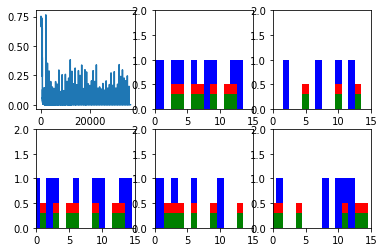

New data, epoch 55
Step 0 Loss 0.16040392


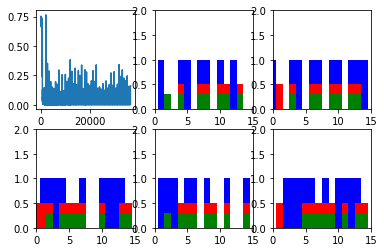

Step 100 Loss 9.139983e-05


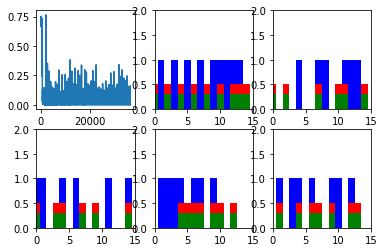

Step 200 Loss 7.624114e-05


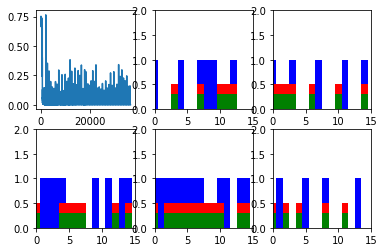

Step 300 Loss 7.796746e-05


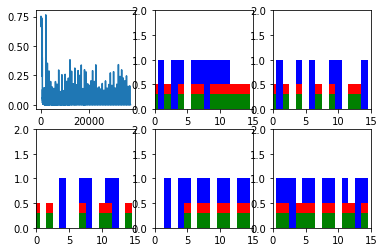

Step 400 Loss 8.287784e-05


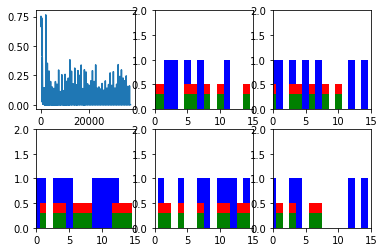

Step 500 Loss 7.827151e-05


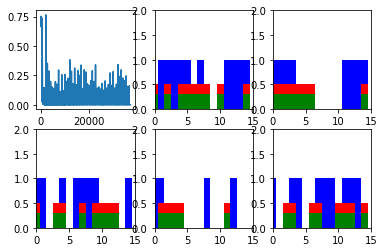

Step 600 Loss 8.1002705e-05


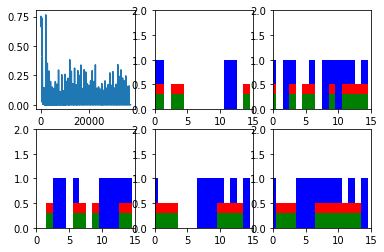

New data, epoch 56
Step 0 Loss 0.31627196


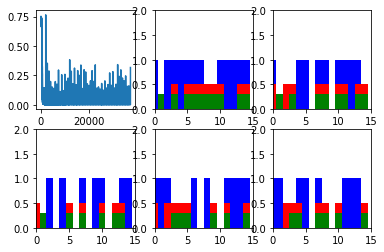

Step 100 Loss 6.6575136e-05


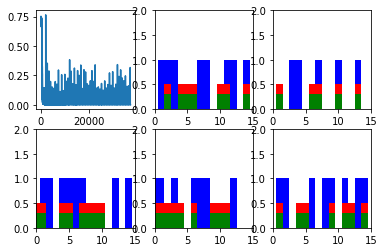

Step 200 Loss 8.368727e-05


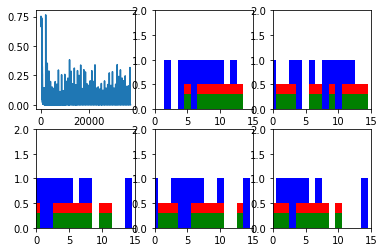

Step 300 Loss 7.973461e-05


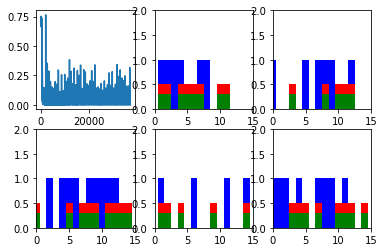

Step 400 Loss 8.229271e-05


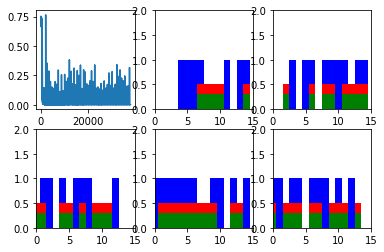

Step 500 Loss 9.734992e-05


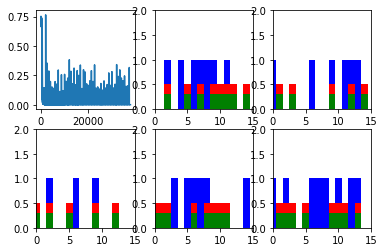

Step 600 Loss 0.00010849399


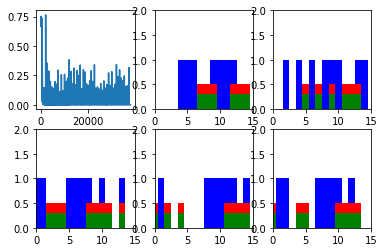

New data, epoch 57
Step 0 Loss 0.34172484


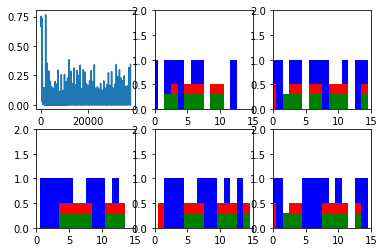

Step 100 Loss 8.579258e-05


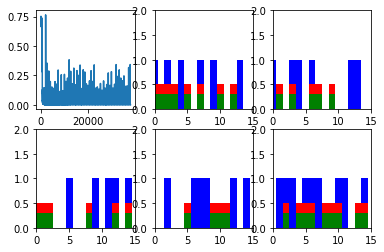

Step 200 Loss 7.27444e-05


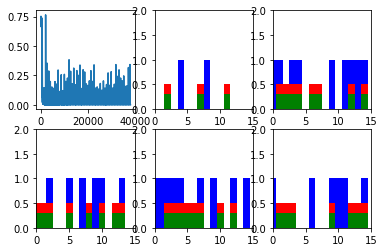

Step 300 Loss 7.7105666e-05


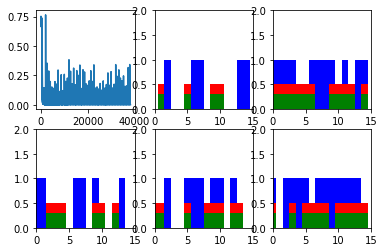

Step 400 Loss 6.220007e-05


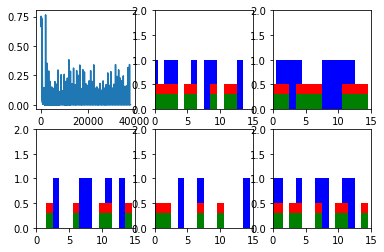

Step 500 Loss 7.720961e-05


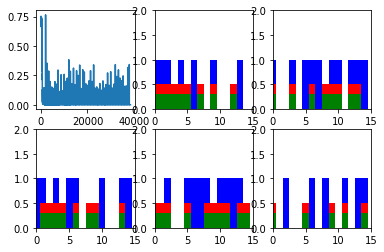

Step 600 Loss 7.596352e-05


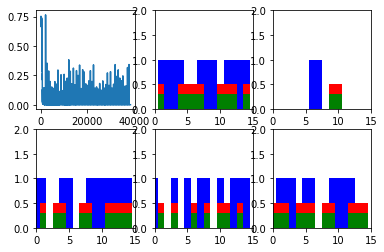

New data, epoch 58
Step 0 Loss 0.2083747


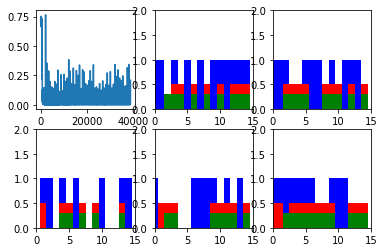

Step 100 Loss 7.923919e-05


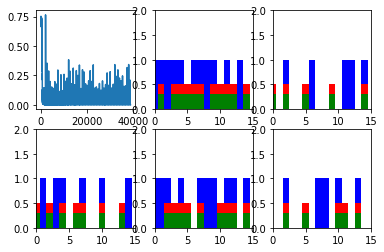

Step 200 Loss 9.032663e-05


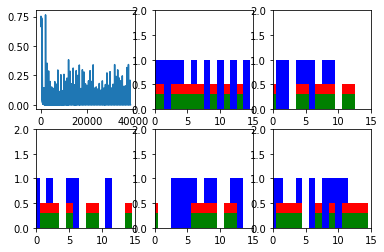

Step 300 Loss 8.0765545e-05


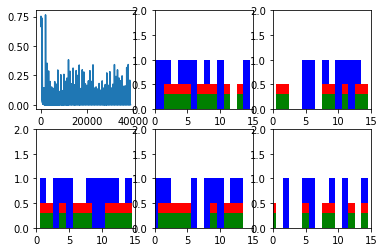

Step 400 Loss 7.625881e-05


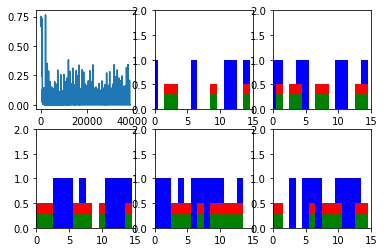

Step 500 Loss 9.158785e-05


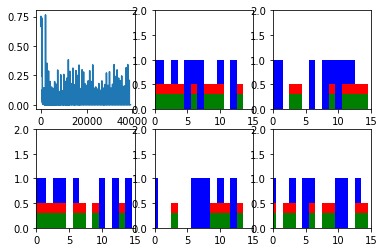

Step 600 Loss 6.690133e-05


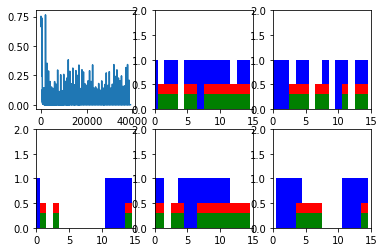

New data, epoch 59
Step 0 Loss 0.22752182


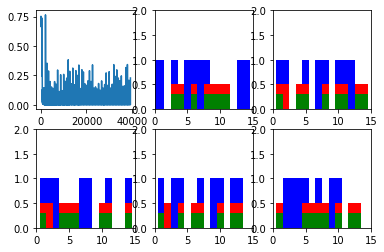

Step 100 Loss 6.526568e-05


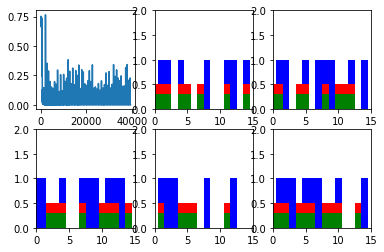

Step 200 Loss 9.663036e-05


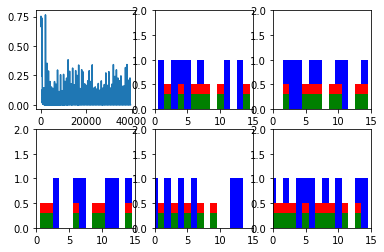

Step 300 Loss 7.517604e-05


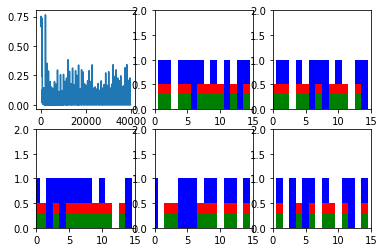

Step 400 Loss 6.8822716e-05


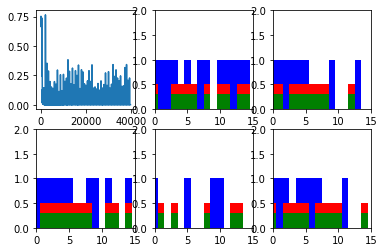

Step 500 Loss 7.910826e-05


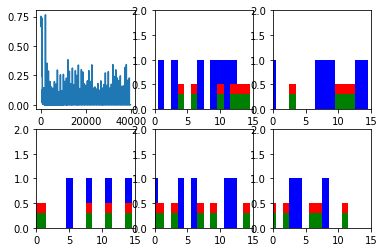

Step 600 Loss 6.3895895e-05


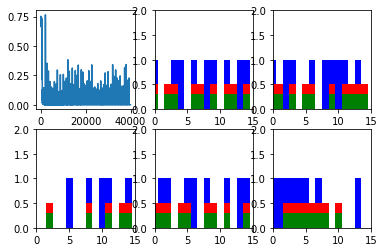

New data, epoch 60
Step 0 Loss 0.22564583


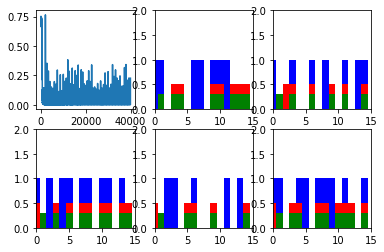

Step 100 Loss 8.7127766e-05


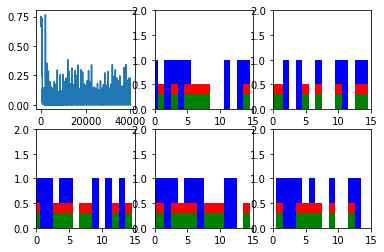

Step 200 Loss 7.4924756e-05


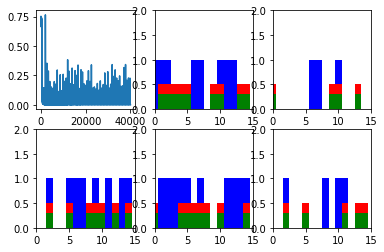

Step 300 Loss 8.7341585e-05


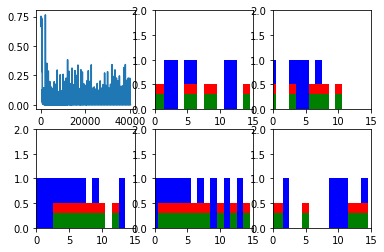

Step 400 Loss 9.332212e-05


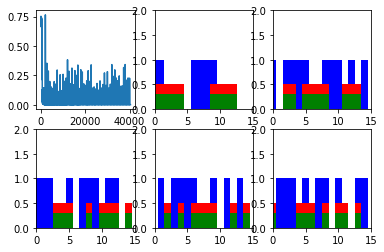

Step 500 Loss 8.187997e-05


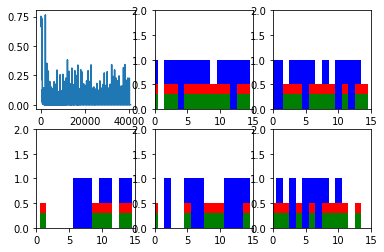

Step 600 Loss 8.788625e-05


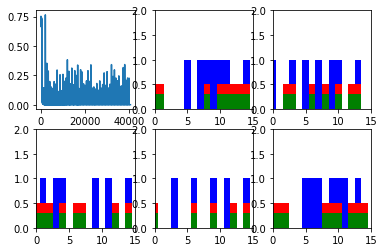

New data, epoch 61
Step 0 Loss 0.17342676


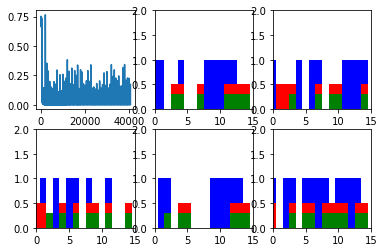

Step 100 Loss 7.445803e-05


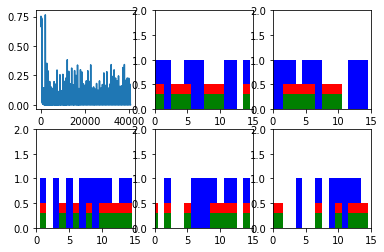

Step 200 Loss 8.774251e-05


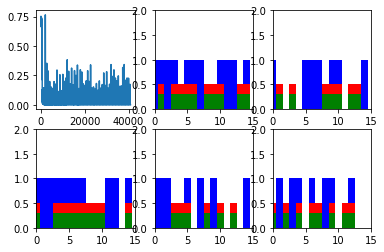

Step 300 Loss 6.875467e-05


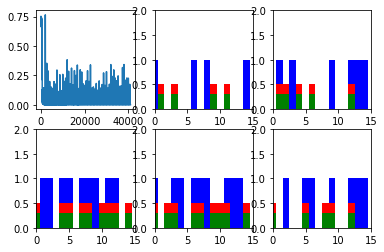

Step 400 Loss 6.4970416e-05


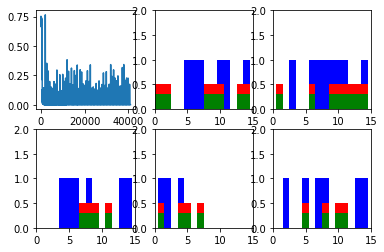

Step 500 Loss 6.109509e-05


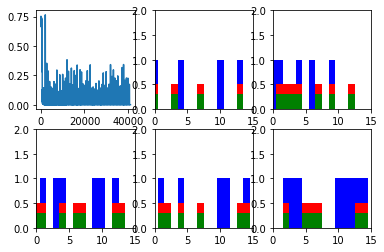

Step 600 Loss 8.7159664e-05


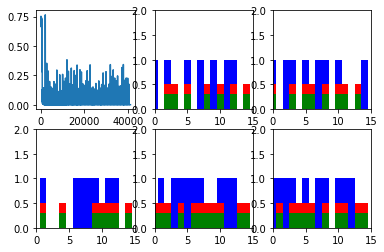

New data, epoch 62
Step 0 Loss 0.16393393


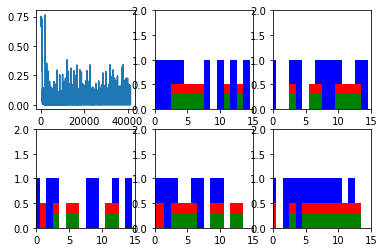

Step 100 Loss 8.153923e-05


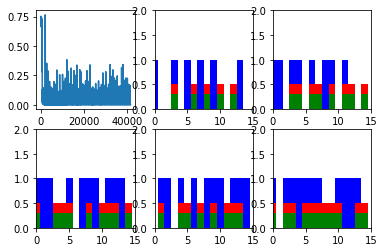

Step 200 Loss 6.7787834e-05


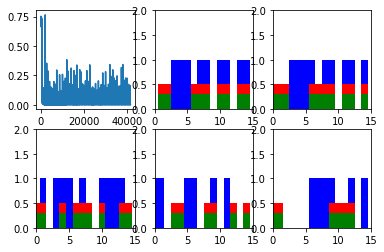

Step 300 Loss 7.593399e-05


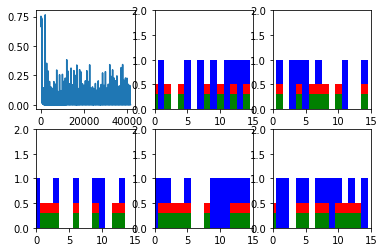

Step 400 Loss 7.775372e-05


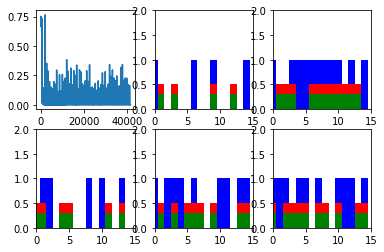

Step 500 Loss 6.316226e-05


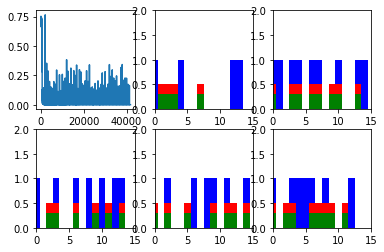

Step 600 Loss 6.007636e-05


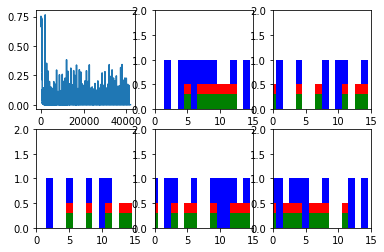

New data, epoch 63
Step 0 Loss 0.2384374


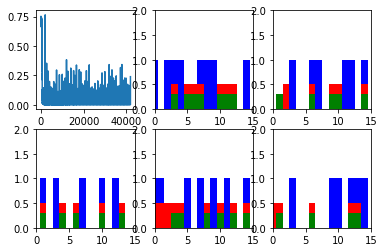

Step 100 Loss 6.206343e-05


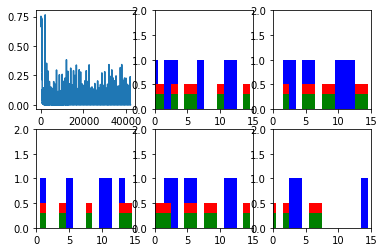

Step 200 Loss 9.2027e-05


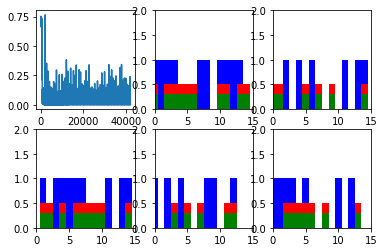

Step 300 Loss 7.1101116e-05


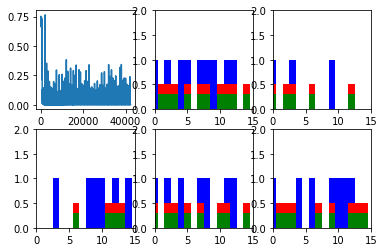

Step 400 Loss 5.8689042e-05


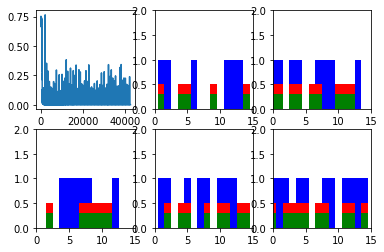

Step 500 Loss 9.408131e-05


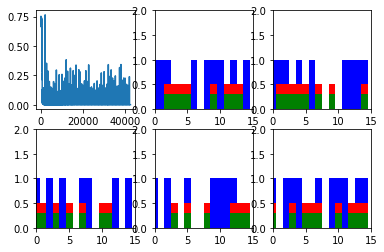

Step 600 Loss 8.050351e-05


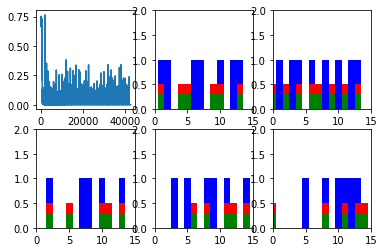

New data, epoch 64
Step 0 Loss 0.13515936


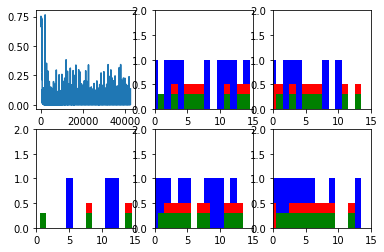

Step 100 Loss 7.57894e-05


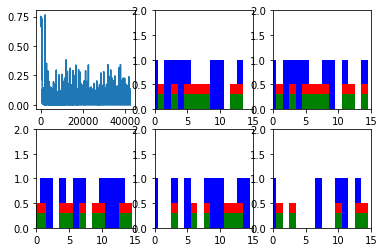

Step 200 Loss 7.25188e-05


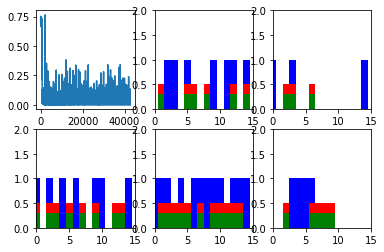

Step 300 Loss 6.076935e-05


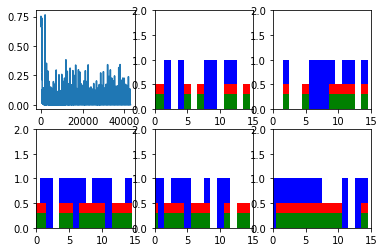

Step 400 Loss 7.3230876e-05


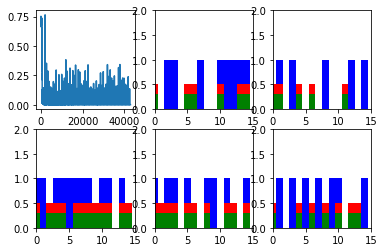

Step 500 Loss 6.555651e-05


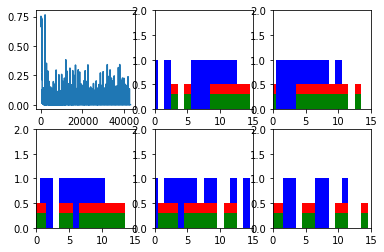

Step 600 Loss 6.726176e-05


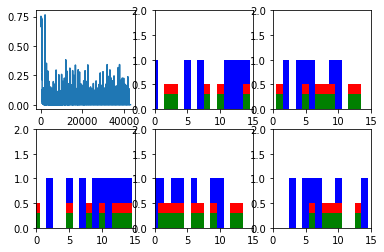

New data, epoch 65
Step 0 Loss 0.14747855


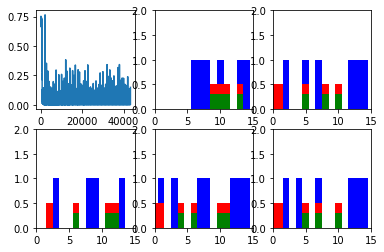

Step 100 Loss 8.963478e-05


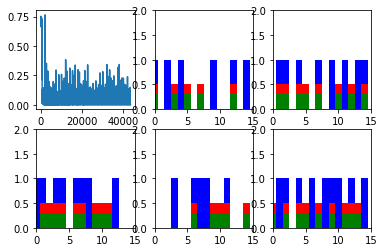

Step 200 Loss 7.0485985e-05


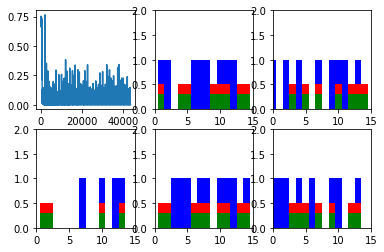

Step 300 Loss 5.2846917e-05


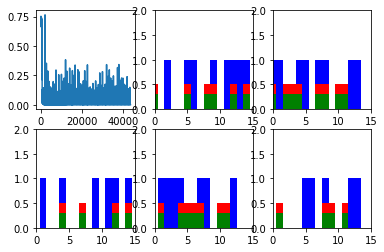

Step 400 Loss 5.8705104e-05


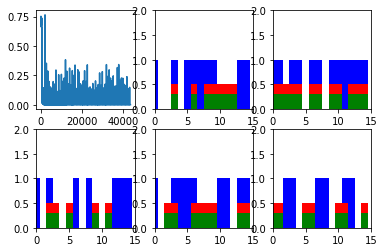

Step 500 Loss 7.047722e-05


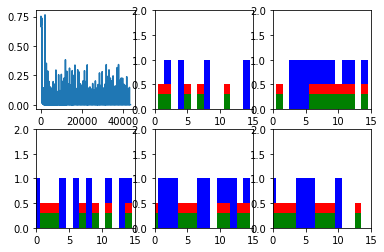

Step 600 Loss 6.6961955e-05


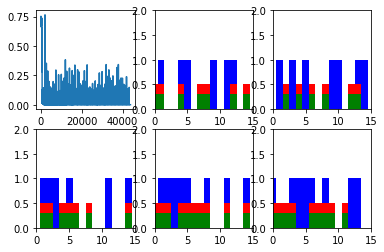

New data, epoch 66
Step 0 Loss 0.13914306


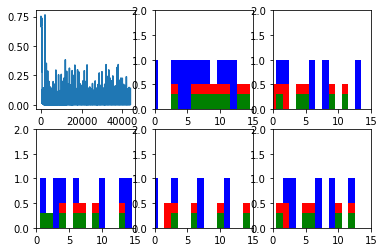

Step 100 Loss 7.816273e-05


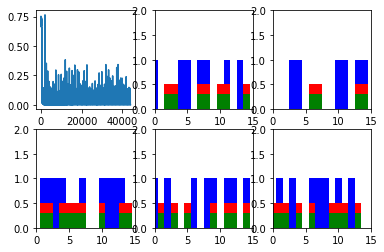

Step 200 Loss 7.904445e-05


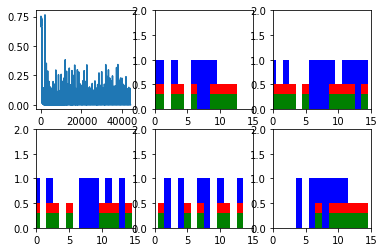

Step 300 Loss 5.771818e-05


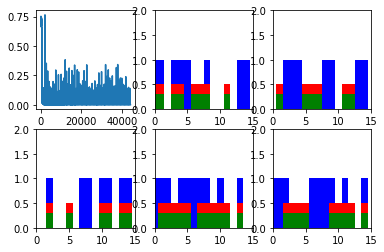

Step 400 Loss 5.2993324e-05


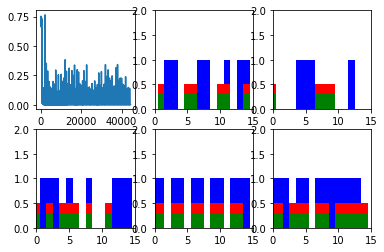

Step 500 Loss 7.5202086e-05


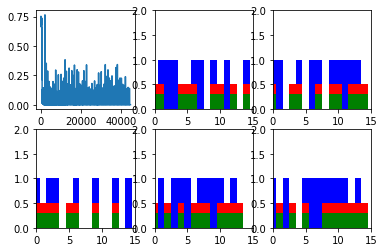

Step 600 Loss 5.6213066e-05


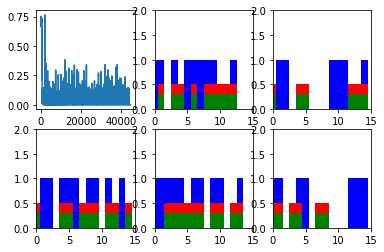

New data, epoch 67
Step 0 Loss 0.23505294


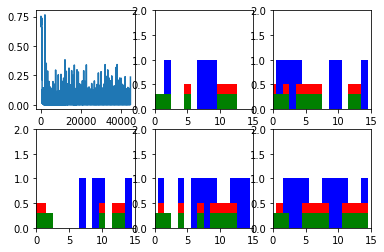

Step 100 Loss 6.430499e-05


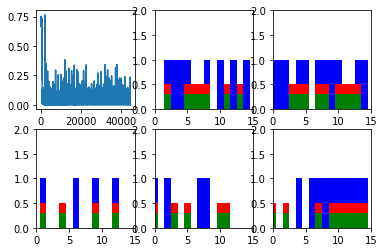

Step 200 Loss 6.971139e-05


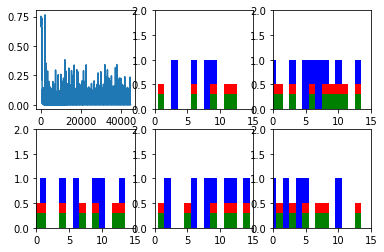

Step 300 Loss 5.344929e-05


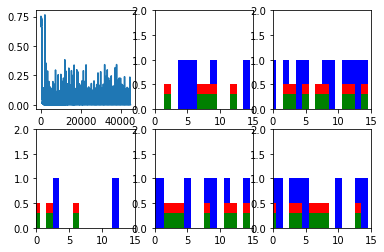

Step 400 Loss 8.079636e-05


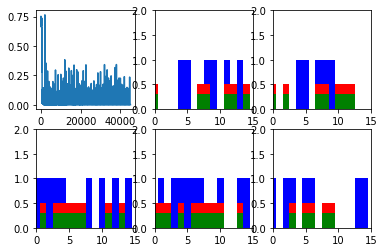

Step 500 Loss 6.97219e-05


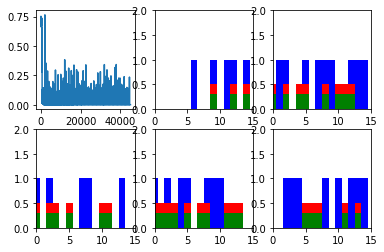

Step 600 Loss 5.5221277e-05


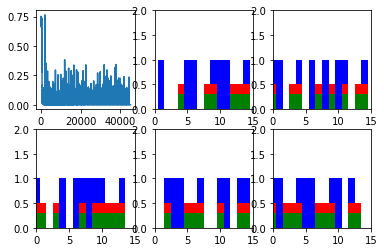

New data, epoch 68
Step 0 Loss 0.2852221


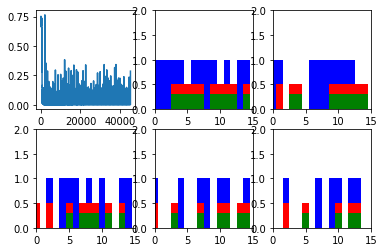

Step 100 Loss 9.289354e-05


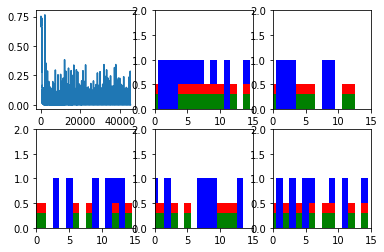

Step 200 Loss 6.17496e-05


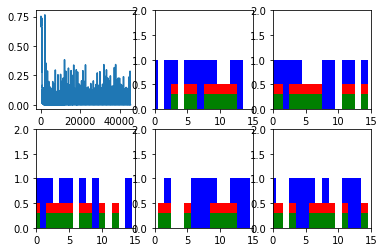

Step 300 Loss 7.428949e-05


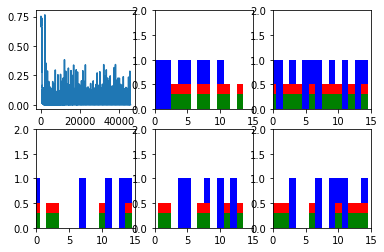

Step 400 Loss 7.385827e-05


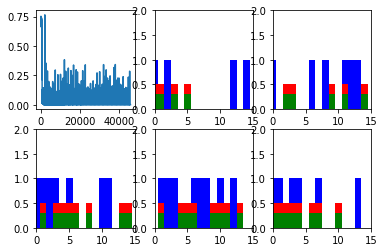

Step 500 Loss 6.749842e-05


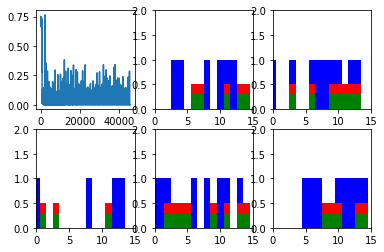

Step 600 Loss 5.6642282e-05


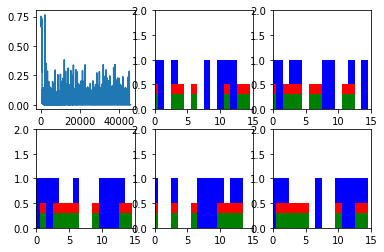

New data, epoch 69
Step 0 Loss 0.27753177


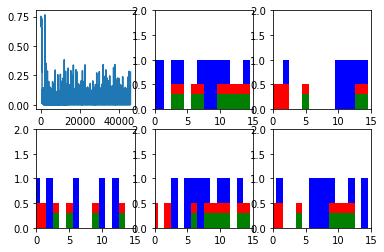

Step 100 Loss 6.615242e-05


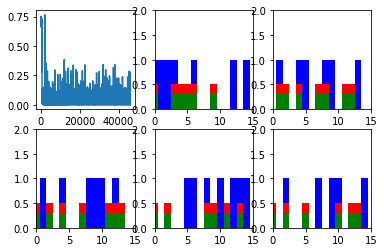

Step 200 Loss 7.485238e-05


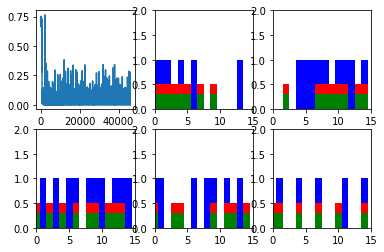

Step 300 Loss 7.171639e-05


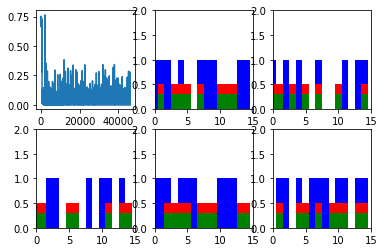

Step 400 Loss 6.616174e-05


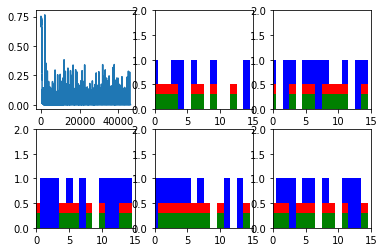

Step 500 Loss 5.841902e-05


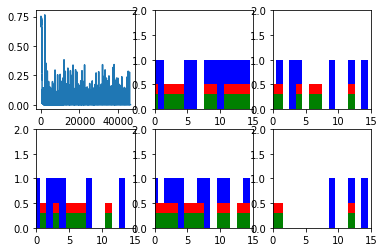

Step 600 Loss 5.5146473e-05


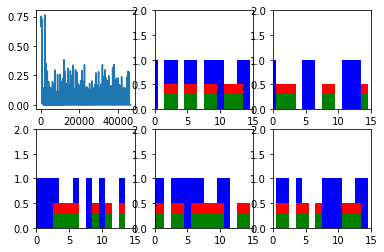

New data, epoch 70
Step 0 Loss 0.17481962


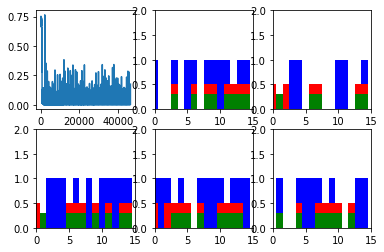

Step 100 Loss 7.777328e-05


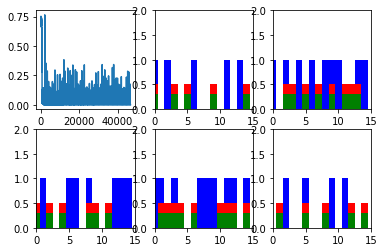

Step 200 Loss 6.587836e-05


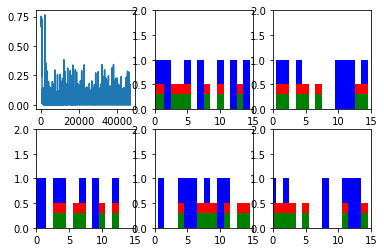

Step 300 Loss 5.527209e-05


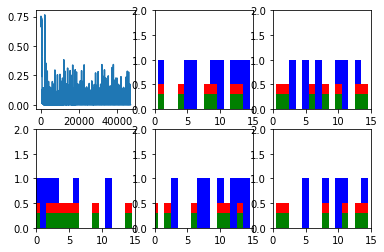

Step 400 Loss 6.0330436e-05


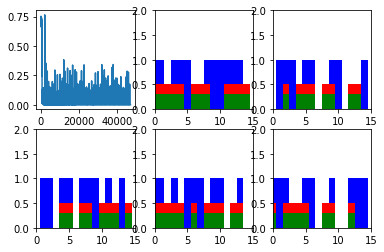

Step 500 Loss 7.894617e-05


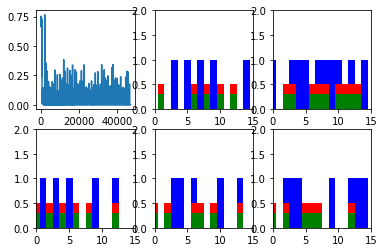

Step 600 Loss 6.9684545e-05


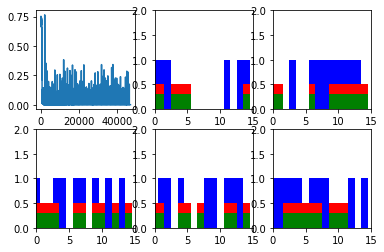

New data, epoch 71
Step 0 Loss 0.20616607


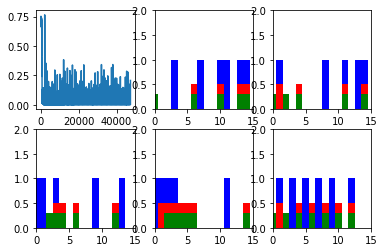

Step 100 Loss 6.30668e-05


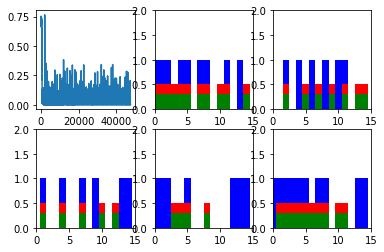

Step 200 Loss 6.795418e-05


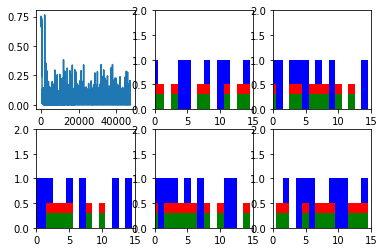

Step 300 Loss 7.402552e-05


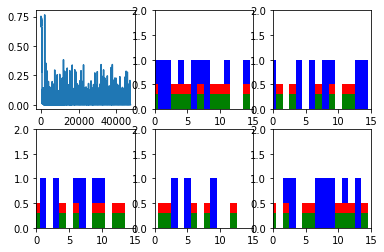

Step 400 Loss 6.601026e-05


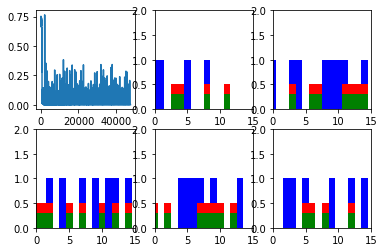

Step 500 Loss 5.9056394e-05


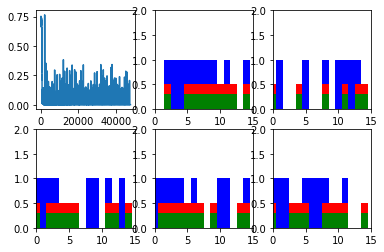

Step 600 Loss 6.4964464e-05


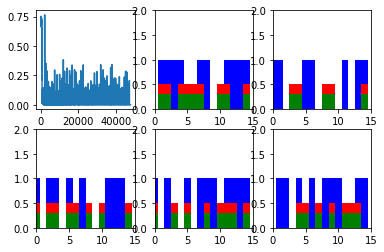

New data, epoch 72
Step 0 Loss 0.22966558


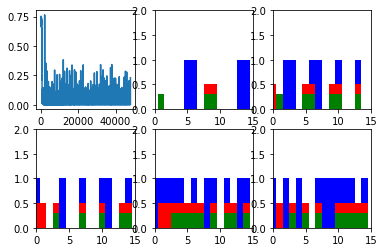

Step 100 Loss 6.874015e-05


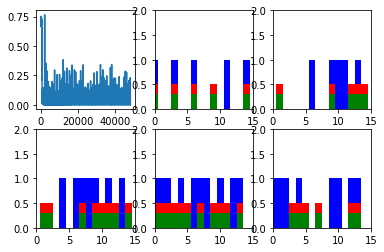

Step 200 Loss 9.13125e-05


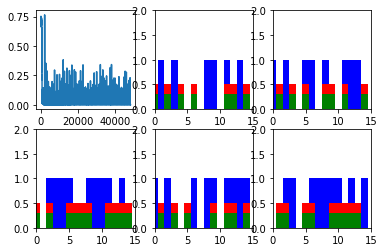

Step 300 Loss 5.92393e-05


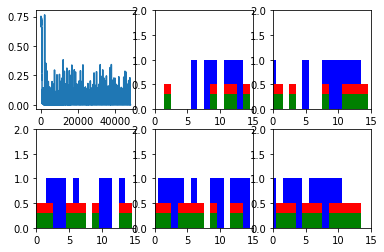

Step 400 Loss 8.758749e-05


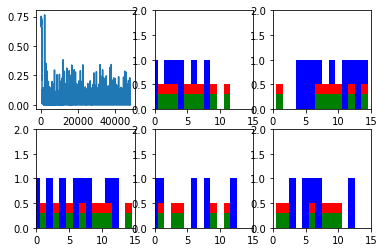

Step 500 Loss 5.884038e-05


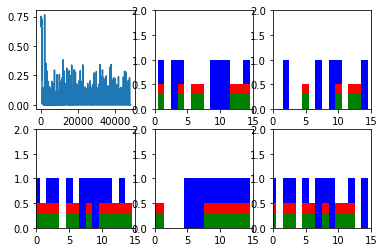

Step 600 Loss 4.3918135e-05


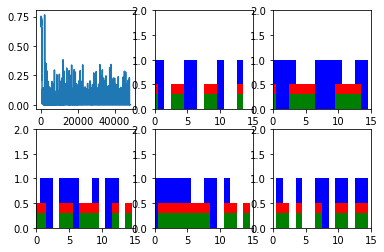

New data, epoch 73
Step 0 Loss 0.23817678


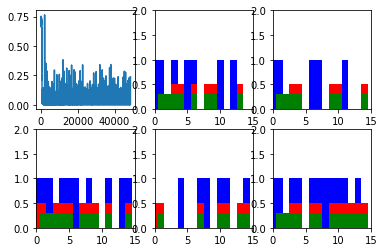

Step 100 Loss 7.184233e-05


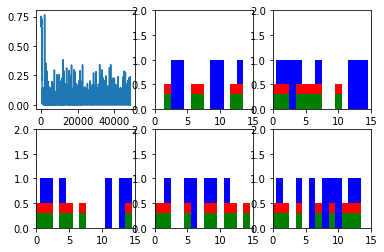

Step 200 Loss 6.5792825e-05


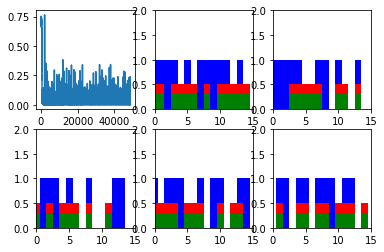

Step 300 Loss 6.560706e-05


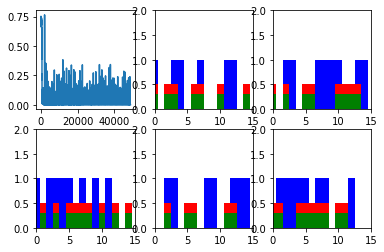

Step 400 Loss 8.219379e-05


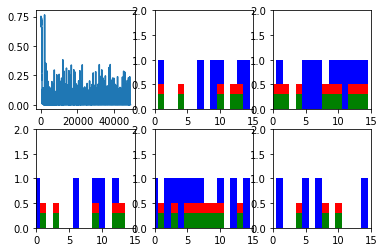

Step 500 Loss 8.9834e-05


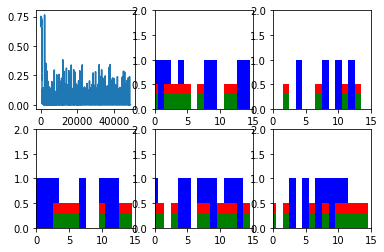

Step 600 Loss 6.988401e-05


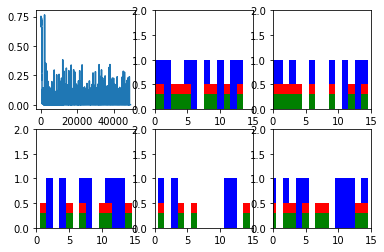

New data, epoch 74
Step 0 Loss 0.2881465


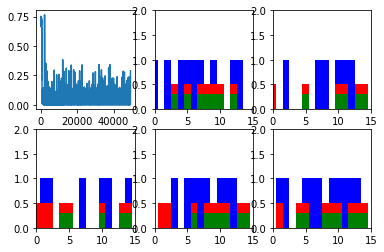

Step 100 Loss 7.697041e-05


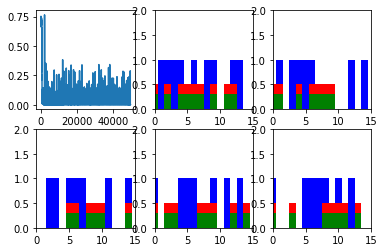

Step 200 Loss 7.166394e-05


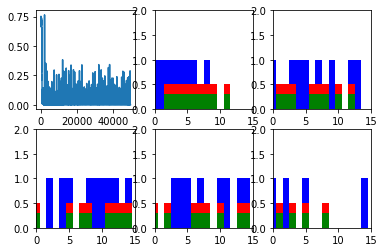

Step 300 Loss 6.6797504e-05


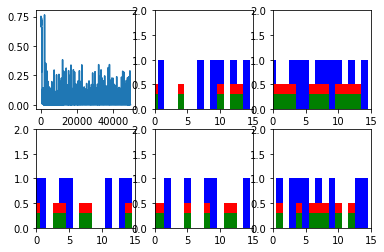

Step 400 Loss 4.7652826e-05


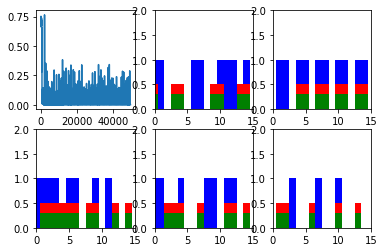

Step 500 Loss 6.0567327e-05


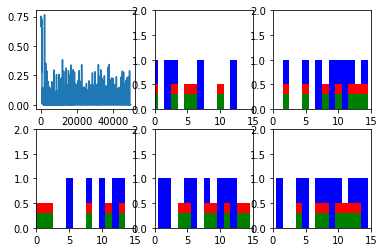

Step 600 Loss 6.199489e-05


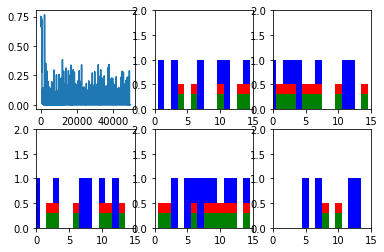

New data, epoch 75
Step 0 Loss 0.1559897


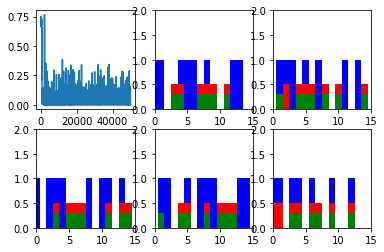

Step 100 Loss 7.197992e-05


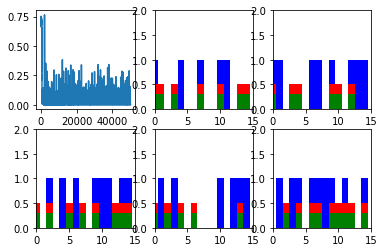

Step 200 Loss 6.5909044e-05


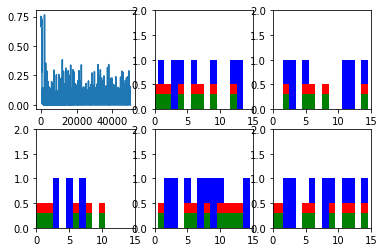

Step 300 Loss 6.3920015e-05


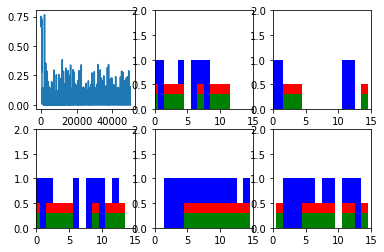

Step 400 Loss 7.683076e-05


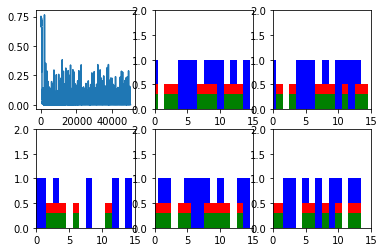

Step 500 Loss 6.214595e-05


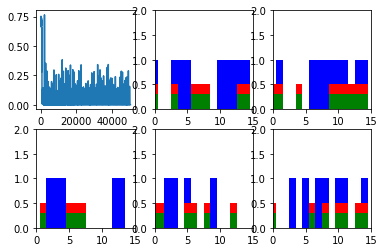

Step 600 Loss 6.497487e-05


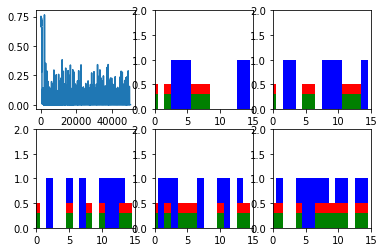

New data, epoch 76
Step 0 Loss 0.36618823


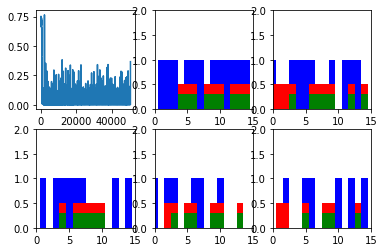

Step 100 Loss 5.6812172e-05


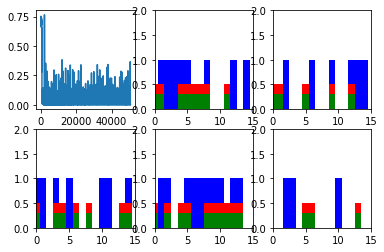

Step 200 Loss 6.306745e-05


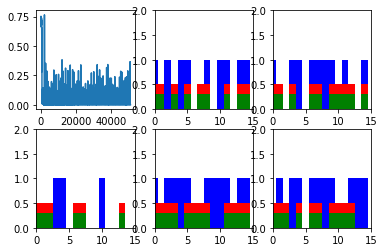

Step 300 Loss 6.891293e-05


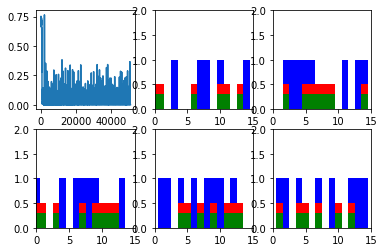

Step 400 Loss 7.205128e-05


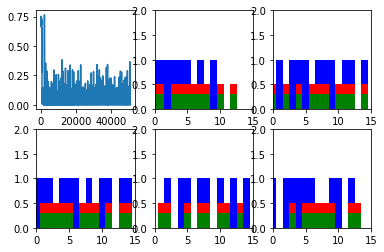

Step 500 Loss 5.6874243e-05


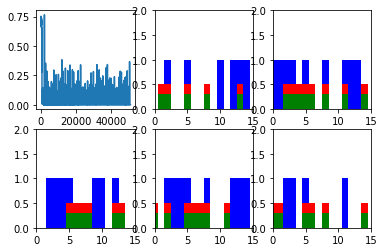

Step 600 Loss 7.0838825e-05


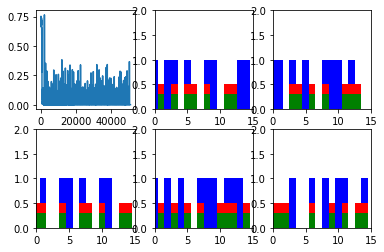

New data, epoch 77
Step 0 Loss 0.29341513


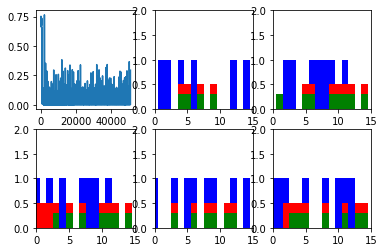

Step 100 Loss 5.65166e-05


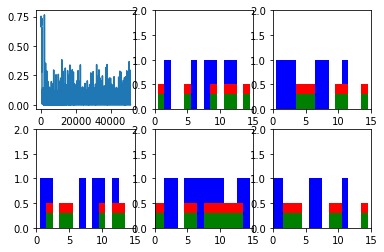

Step 200 Loss 5.8975238e-05


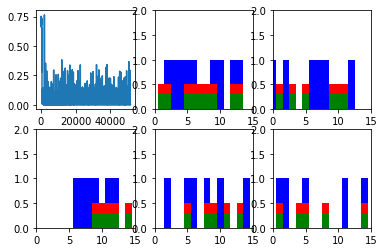

Step 300 Loss 6.561225e-05


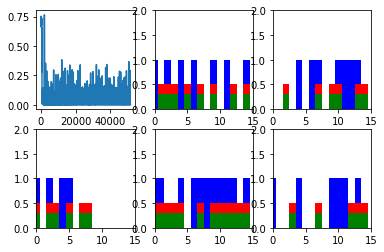

Step 400 Loss 5.5710818e-05


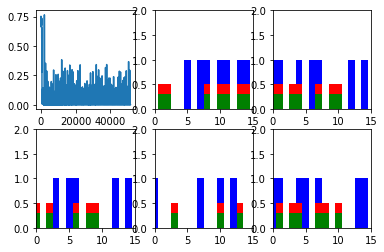

Step 500 Loss 5.3067895e-05


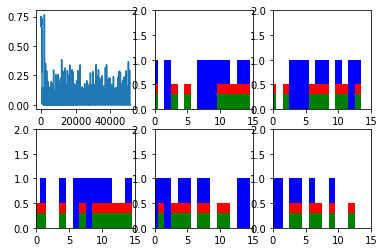

Step 600 Loss 6.35633e-05


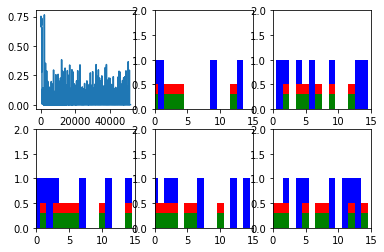

New data, epoch 78
Step 0 Loss 0.28246495


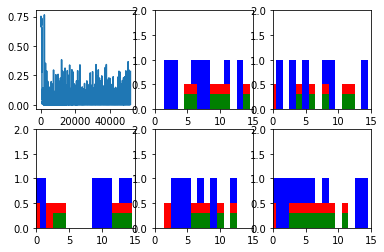

Step 100 Loss 7.0904e-05


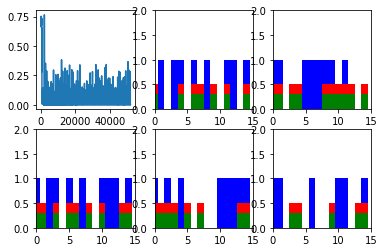

Step 200 Loss 6.392382e-05


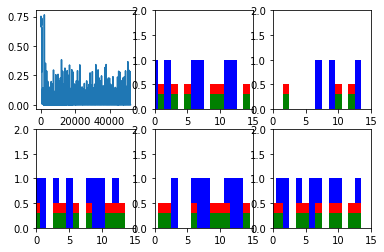

Step 300 Loss 6.295108e-05


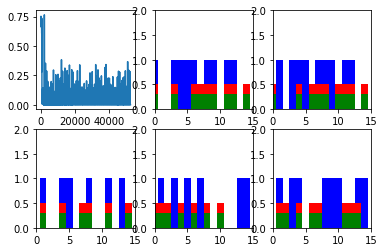

Step 400 Loss 5.137044e-05


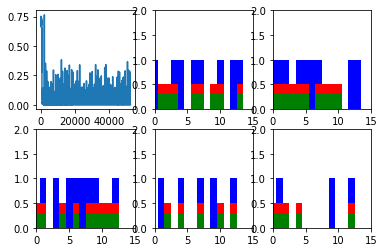

Step 500 Loss 5.47763e-05


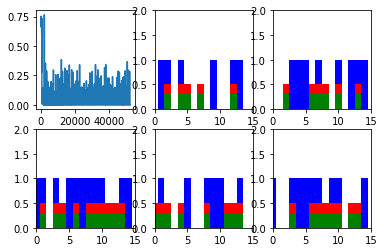

Step 600 Loss 7.042463e-05


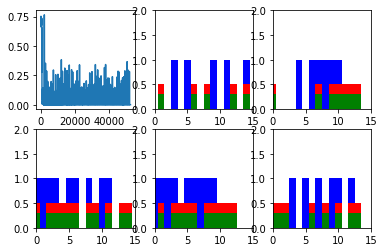

New data, epoch 79
Step 0 Loss 0.3556706


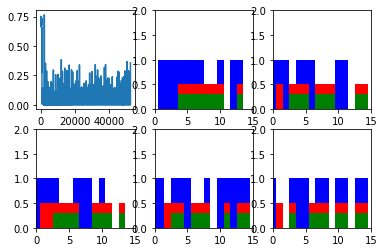

Step 100 Loss 6.229217e-05


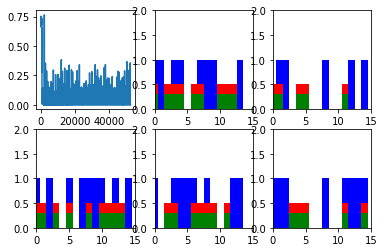

Step 200 Loss 6.246535e-05


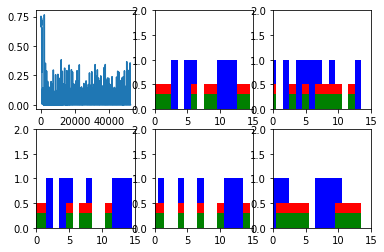

Step 300 Loss 5.1415165e-05


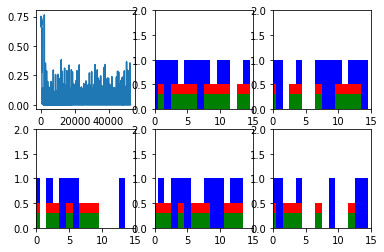

Step 400 Loss 7.0675494e-05


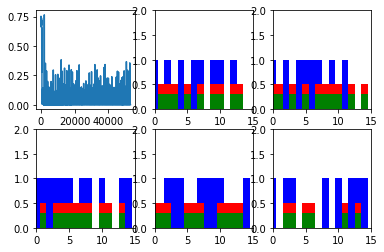

Step 500 Loss 5.5189466e-05


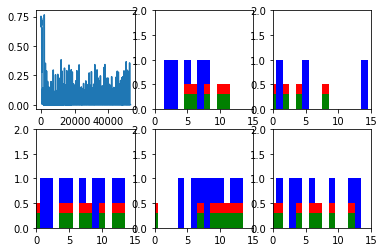

Step 600 Loss 5.8399997e-05


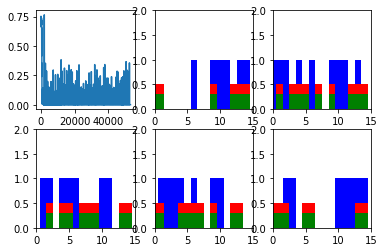

New data, epoch 80
Step 0 Loss 0.28978616


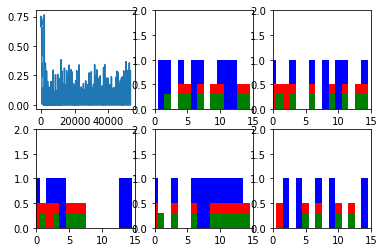

Step 100 Loss 5.016257e-05


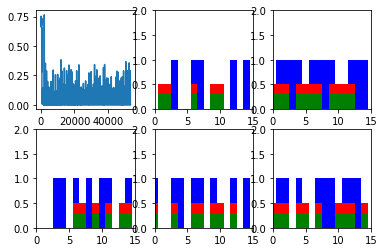

Step 200 Loss 6.155797e-05


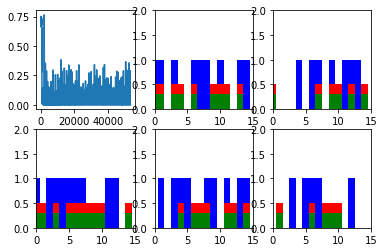

Step 300 Loss 5.9412654e-05


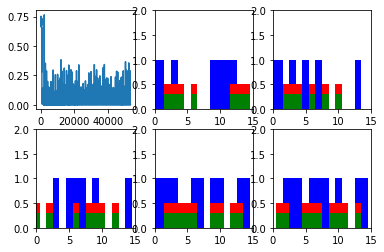

Step 400 Loss 6.494317e-05


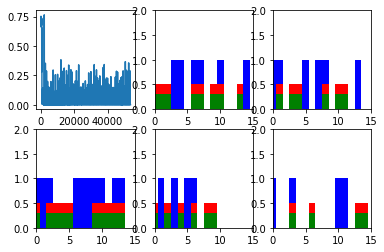

Step 500 Loss 7.113063e-05


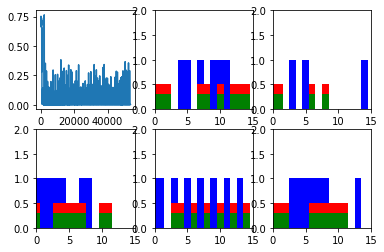

Step 600 Loss 6.2831416e-05


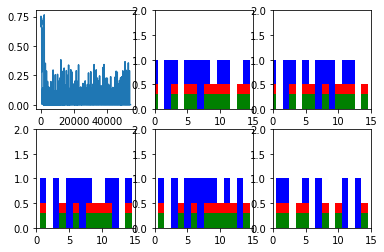

New data, epoch 81
Step 0 Loss 0.14484216


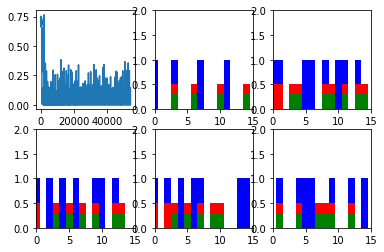

Step 100 Loss 6.1696584e-05


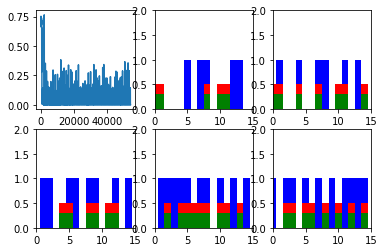

Step 200 Loss 4.874467e-05


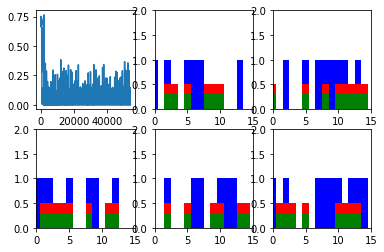

Step 300 Loss 4.4728677e-05


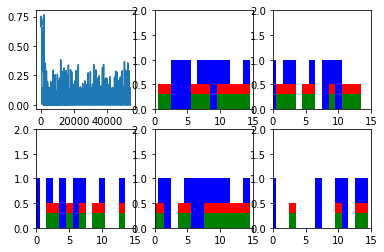

Step 400 Loss 7.557133e-05


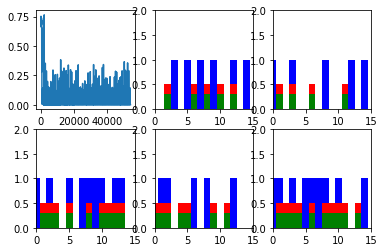

Step 500 Loss 5.999037e-05


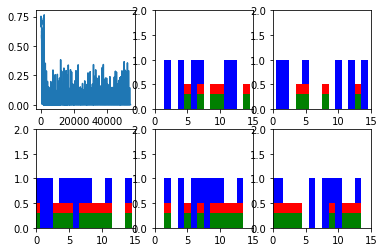

Step 600 Loss 6.7208806e-05


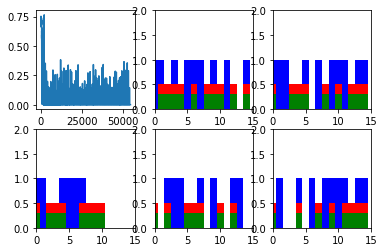

New data, epoch 82
Step 0 Loss 0.15878125


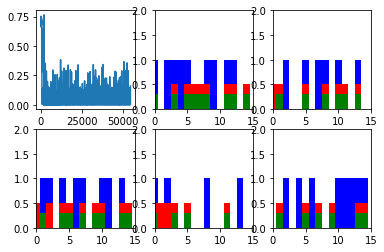

Step 100 Loss 5.9384405e-05


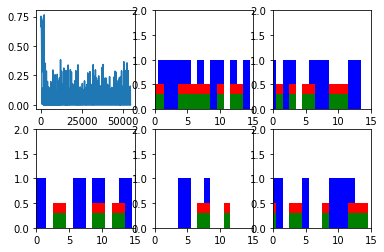

Step 200 Loss 5.3587282e-05


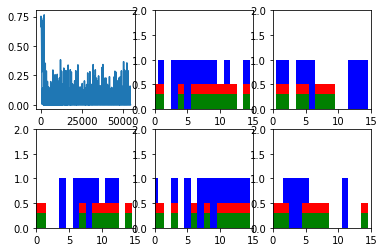

Step 300 Loss 5.7984944e-05


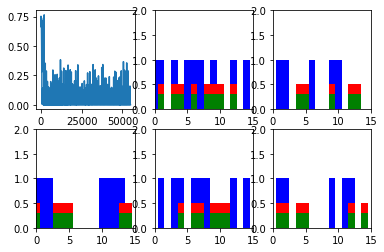

Step 400 Loss 7.500874e-05


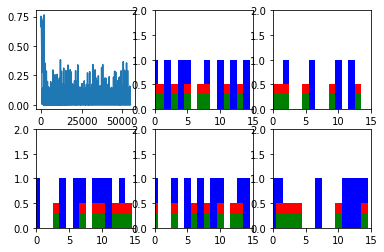

Step 500 Loss 4.3236363e-05


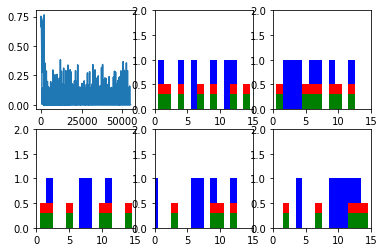

Step 600 Loss 6.821859e-05


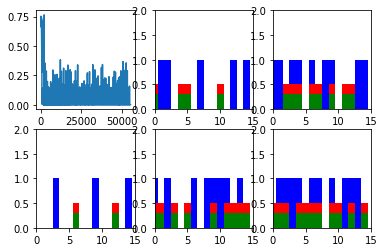

New data, epoch 83
Step 0 Loss 0.166813


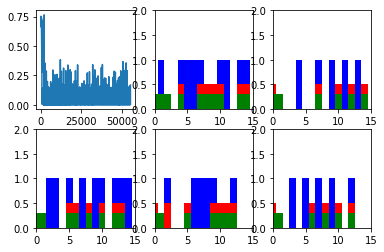

Step 100 Loss 5.7740348e-05


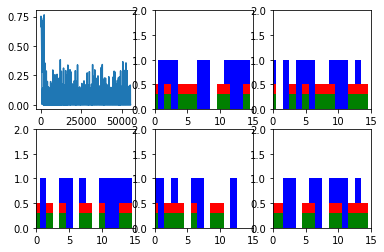

Step 200 Loss 4.8001042e-05


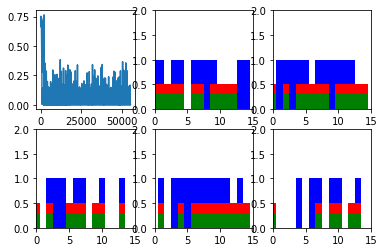

Step 300 Loss 6.496808e-05


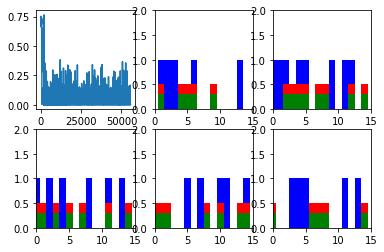

Step 400 Loss 5.801999e-05


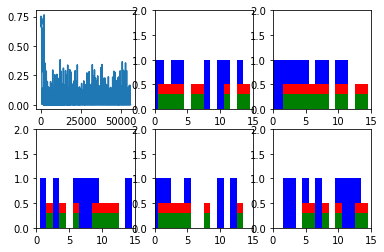

Step 500 Loss 4.933947e-05


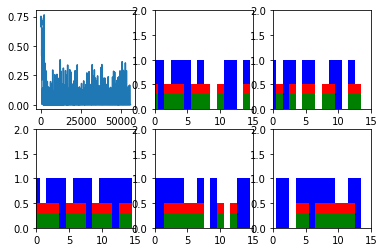

Step 600 Loss 5.051368e-05


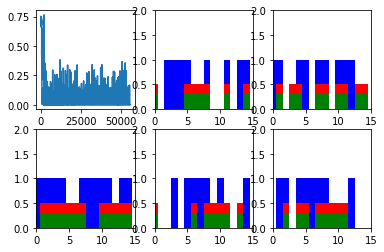

New data, epoch 84
Step 0 Loss 0.15208517


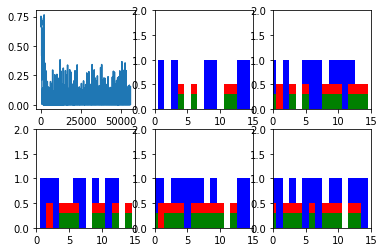

Step 100 Loss 4.8422073e-05


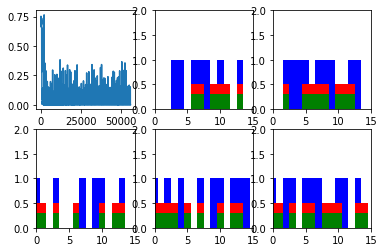

Step 200 Loss 5.9529935e-05


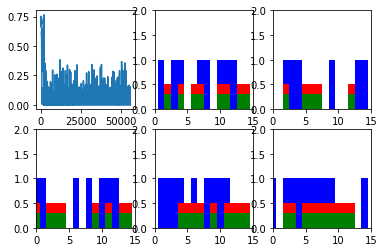

Step 300 Loss 6.106375e-05


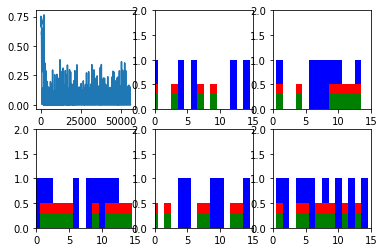

Step 400 Loss 5.5253426e-05


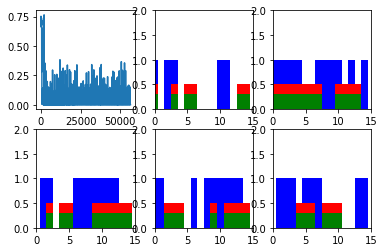

Step 500 Loss 4.6383146e-05


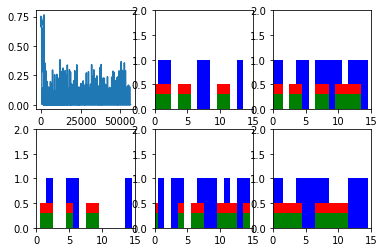

Step 600 Loss 6.3369254e-05


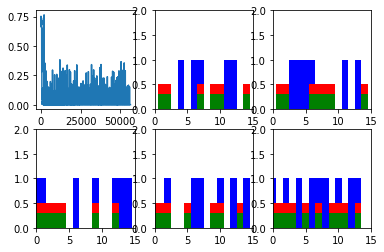

New data, epoch 85
Step 0 Loss 0.16342121


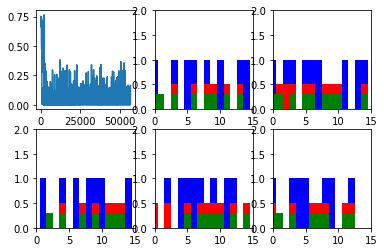

Step 100 Loss 5.4946177e-05


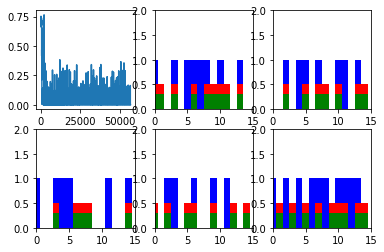

Step 200 Loss 6.1086954e-05


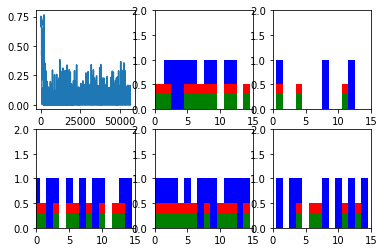

Step 300 Loss 4.562494e-05


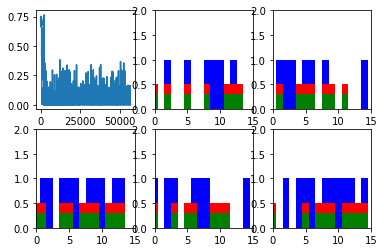

Step 400 Loss 5.9218262e-05


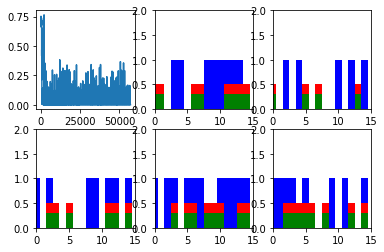

Step 500 Loss 4.3183776e-05


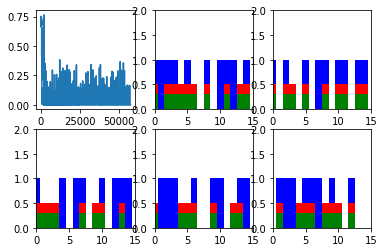

Step 600 Loss 5.5876313e-05


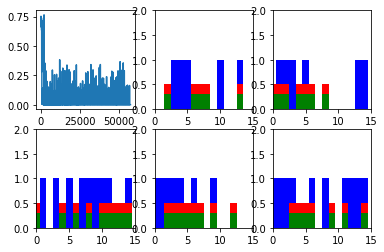

New data, epoch 86
Step 0 Loss 0.23870338


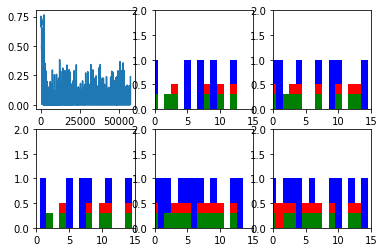

Step 100 Loss 4.6731173e-05


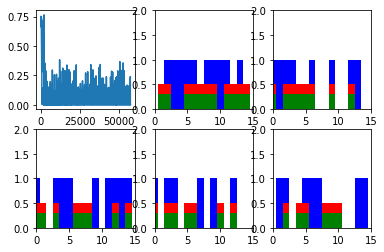

Step 200 Loss 5.0135575e-05


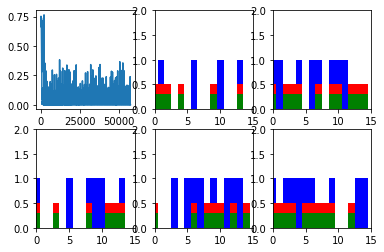

Step 300 Loss 6.400877e-05


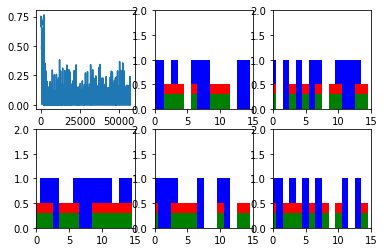

Step 400 Loss 6.117124e-05


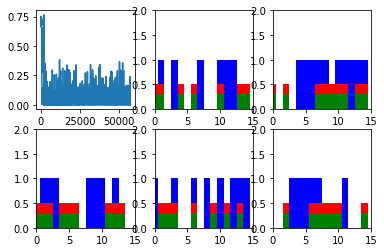

Step 500 Loss 5.1629424e-05


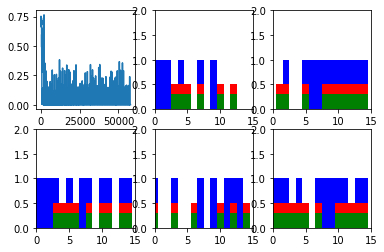

Step 600 Loss 4.7273814e-05


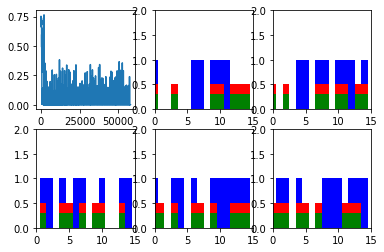

New data, epoch 87
Step 0 Loss 0.2730309


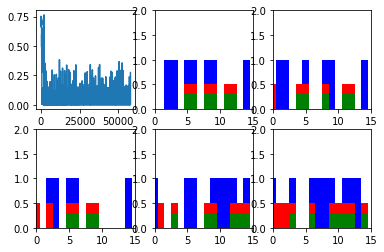

Step 100 Loss 4.6561265e-05


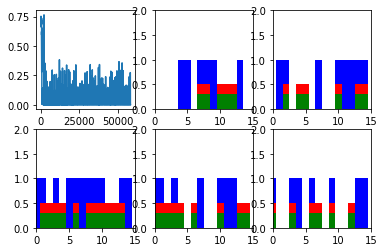

Step 200 Loss 4.699837e-05


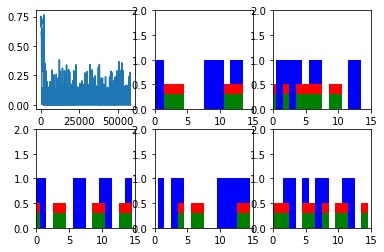

Step 300 Loss 6.0547987e-05


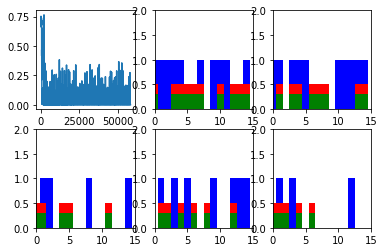

Step 400 Loss 6.3886255e-05


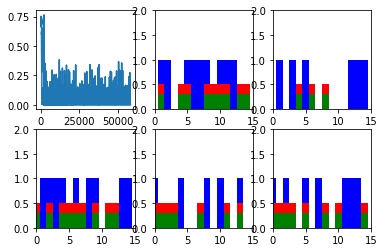

Step 500 Loss 5.0116447e-05


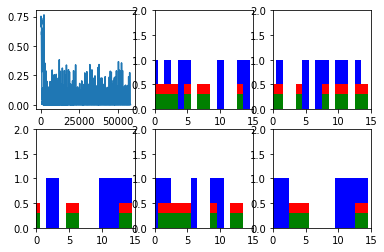

Step 600 Loss 3.4124656e-05


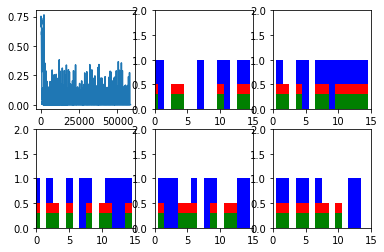

New data, epoch 88
Step 0 Loss 0.20921607


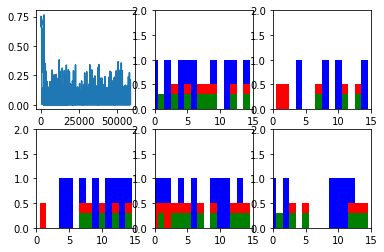

Step 100 Loss 3.9703184e-05


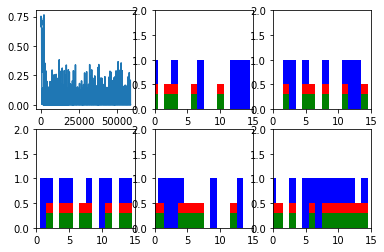

Step 200 Loss 5.0793424e-05


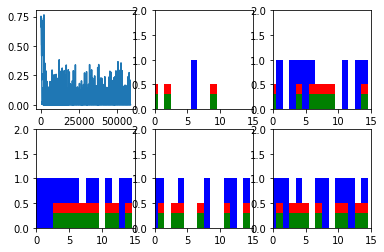

Step 300 Loss 5.6066452e-05


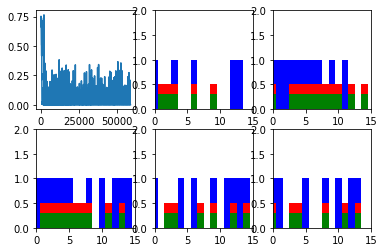

Step 400 Loss 6.3231506e-05


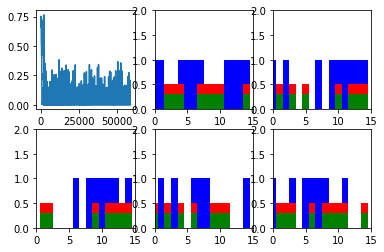

Step 500 Loss 5.890506e-05


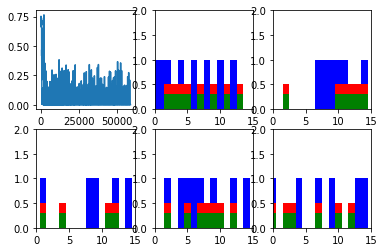

Step 600 Loss 4.605549e-05


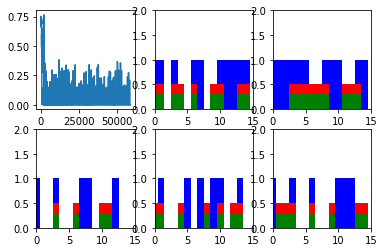

New data, epoch 89
Step 0 Loss 0.13068552


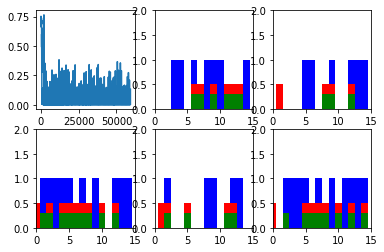

Step 100 Loss 5.4465563e-05


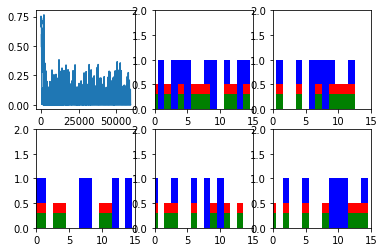

Step 200 Loss 4.966807e-05


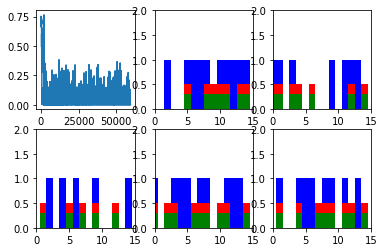

Step 300 Loss 4.160735e-05


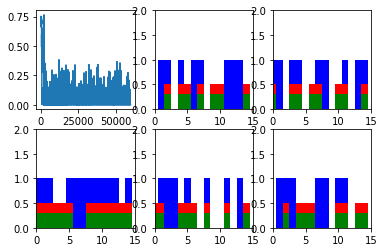

Step 400 Loss 5.0618848e-05


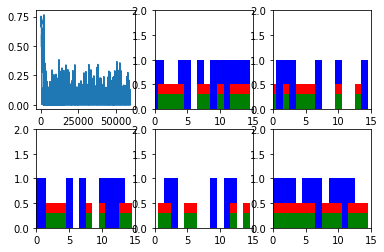

Step 500 Loss 5.2480755e-05


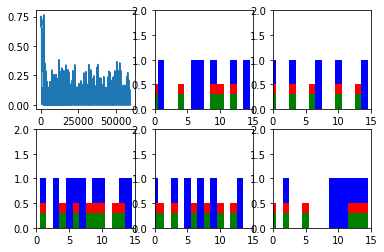

Step 600 Loss 5.5846514e-05


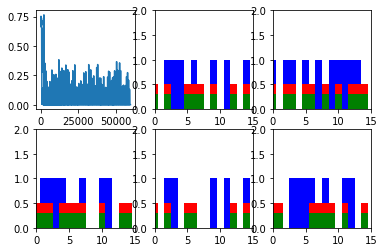

New data, epoch 90
Step 0 Loss 0.15325783


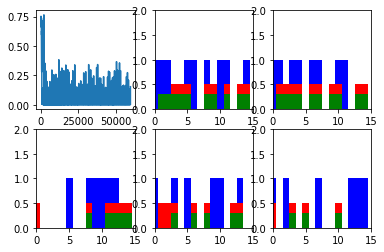

Step 100 Loss 4.7854428e-05


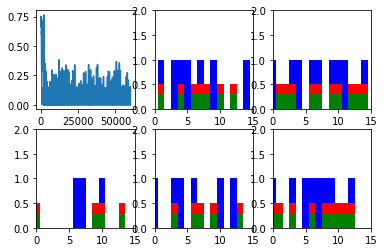

Step 200 Loss 5.5255965e-05


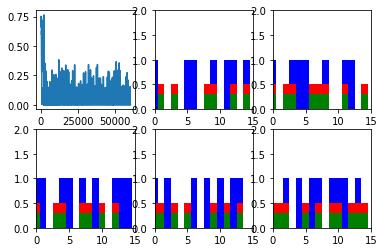

Step 300 Loss 6.340168e-05


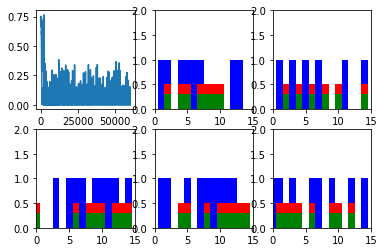

Step 400 Loss 5.4430373e-05


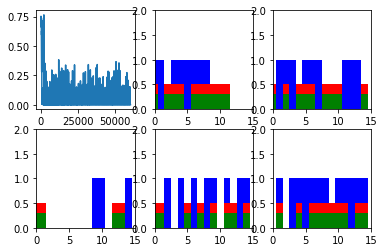

Step 500 Loss 4.9779548e-05


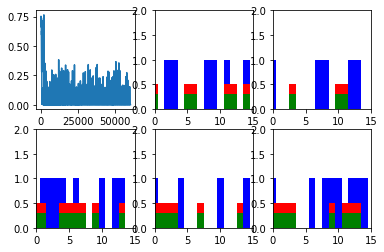

Step 600 Loss 4.9237417e-05


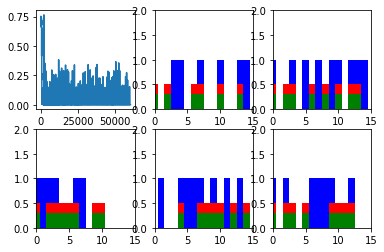

New data, epoch 91
Step 0 Loss 0.119598106


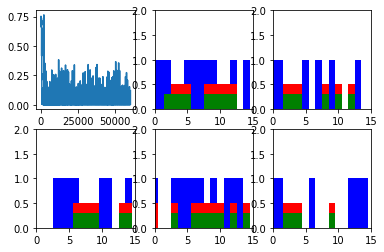

Step 100 Loss 4.9413684e-05


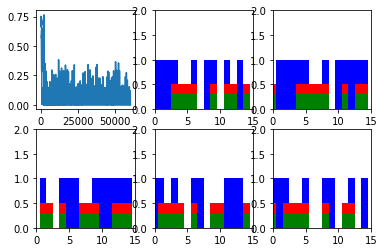

Step 200 Loss 4.9359685e-05


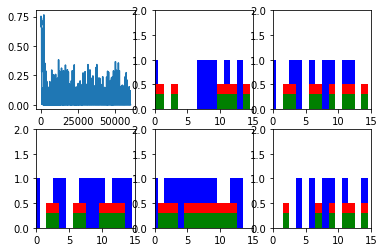

Step 300 Loss 5.9192647e-05


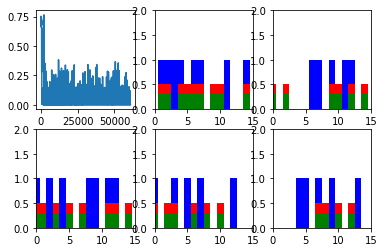

Step 400 Loss 4.878453e-05


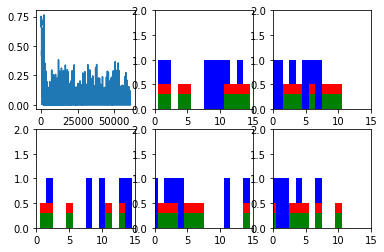

Step 500 Loss 5.6724846e-05


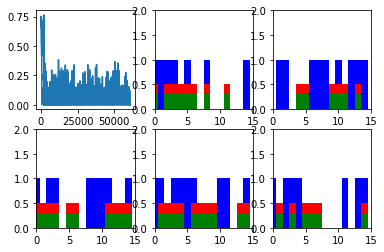

Step 600 Loss 4.5709246e-05


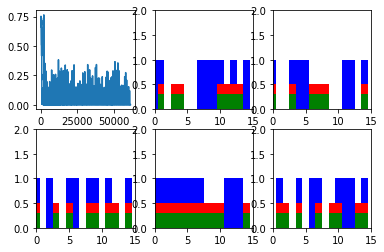

New data, epoch 92
Step 0 Loss 0.24757962


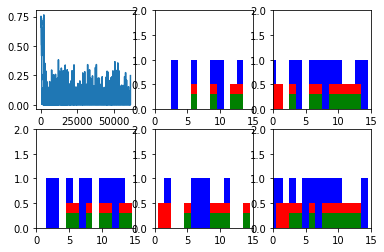

Step 100 Loss 5.005772e-05


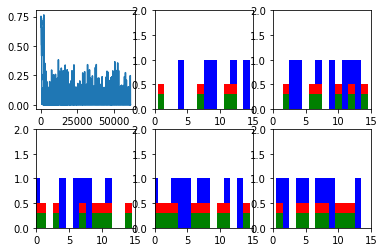

Step 200 Loss 5.3711305e-05


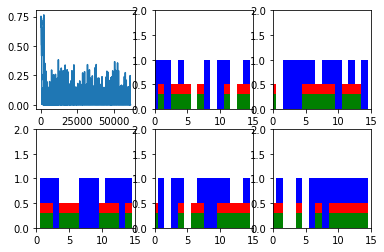

Step 300 Loss 5.689641e-05


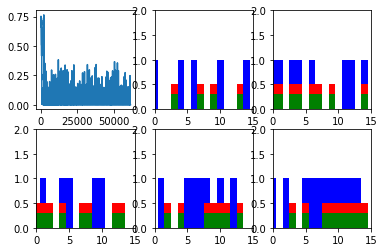

Step 400 Loss 0.000105628766


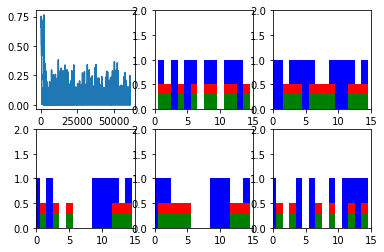

Step 500 Loss 5.4341115e-05


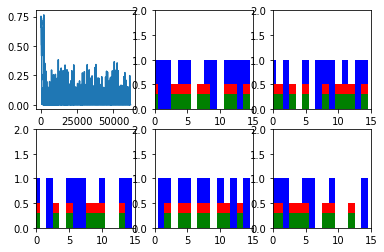

Step 600 Loss 4.582688e-05


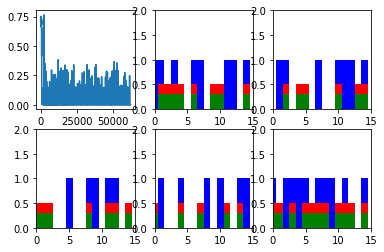

New data, epoch 93
Step 0 Loss 0.13372174


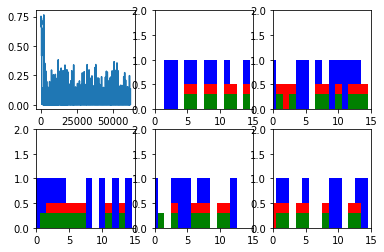

Step 100 Loss 5.301046e-05


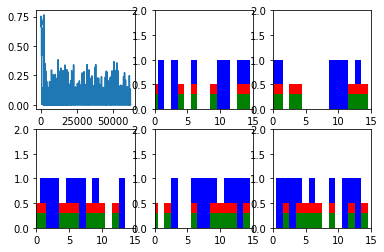

Step 200 Loss 5.1896503e-05


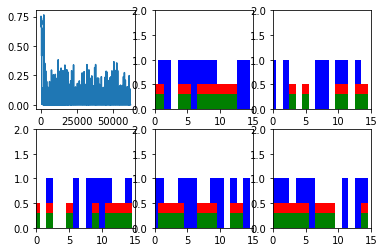

Step 300 Loss 4.8547816e-05


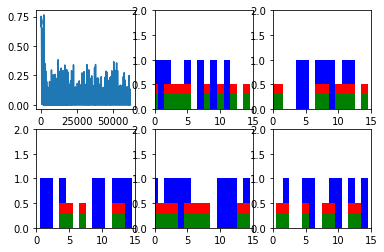

Step 400 Loss 5.6667453e-05


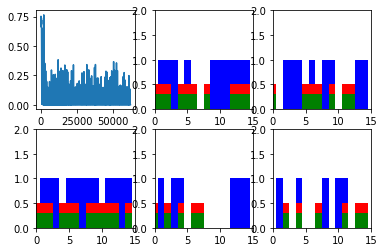

Step 500 Loss 4.9622417e-05


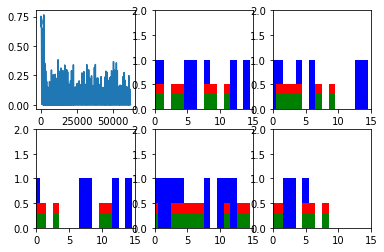

Step 600 Loss 5.4938006e-05


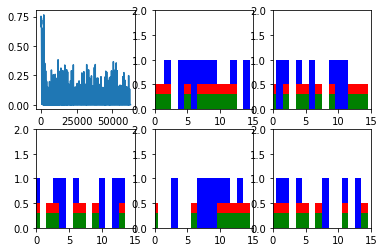

New data, epoch 94
Step 0 Loss 0.1722954


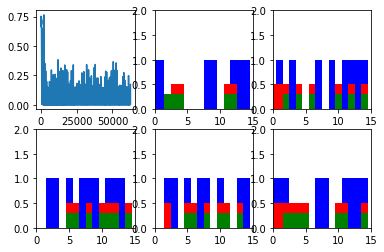

Step 100 Loss 4.157542e-05


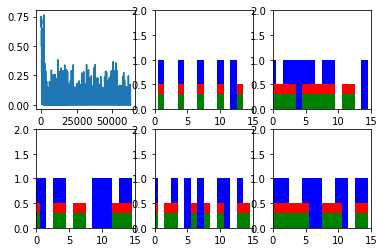

Step 200 Loss 4.1222374e-05


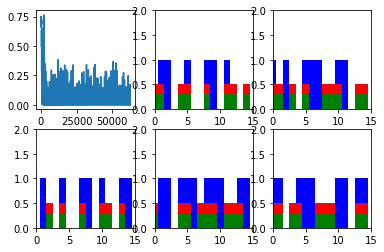

Step 300 Loss 4.4734952e-05


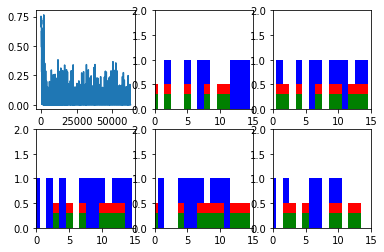

Step 400 Loss 4.8862672e-05


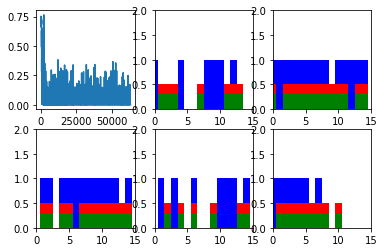

Step 500 Loss 4.0369116e-05


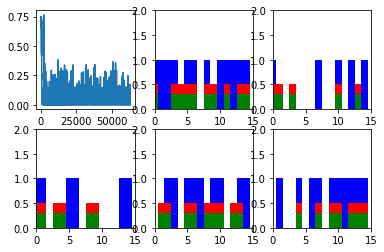

Step 600 Loss 5.6714907e-05


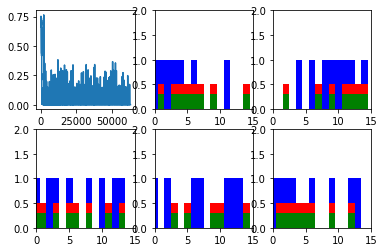

New data, epoch 95
Step 0 Loss 0.20581056


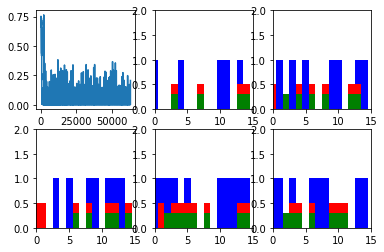

Step 100 Loss 5.0461447e-05


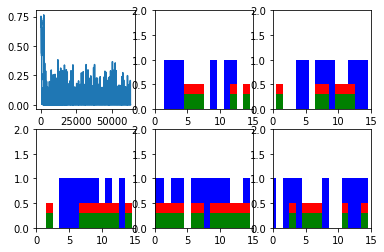

Step 200 Loss 5.6234003e-05


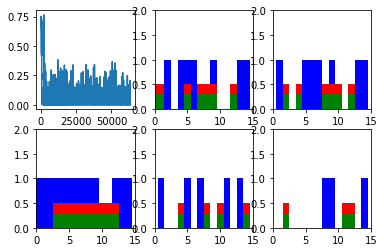

Step 300 Loss 5.2613133e-05


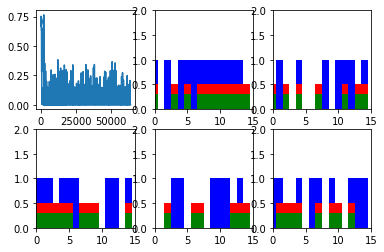

Step 400 Loss 4.9437887e-05


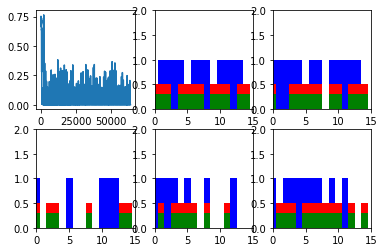

Step 500 Loss 4.595697e-05


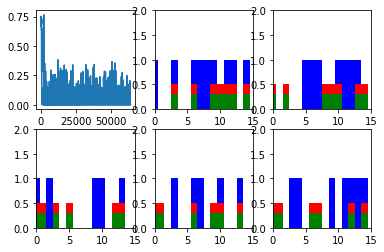

Step 600 Loss 4.7721474e-05


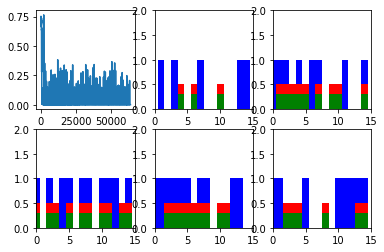

New data, epoch 96
Step 0 Loss 0.08934383


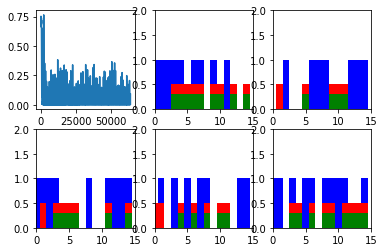

Step 100 Loss 4.41374e-05


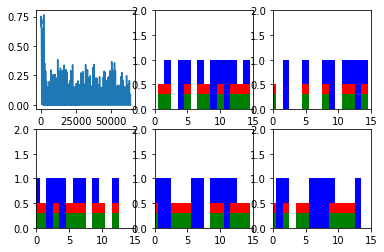

Step 200 Loss 4.849529e-05


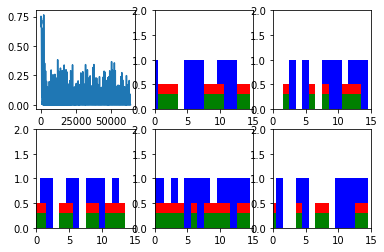

Step 300 Loss 4.97683e-05


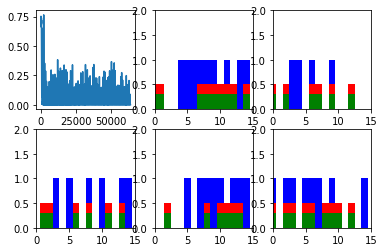

Step 400 Loss 4.4563458e-05


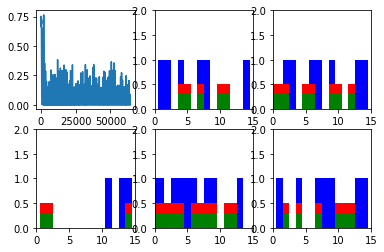

Step 500 Loss 5.6624493e-05


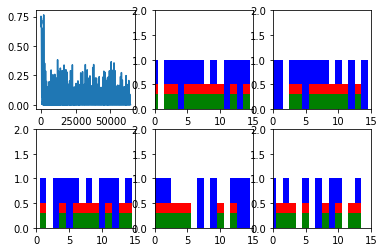

Step 600 Loss 5.1645562e-05


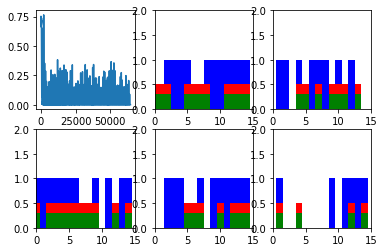

New data, epoch 97
Step 0 Loss 0.0800278


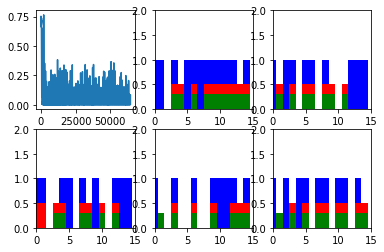

Step 100 Loss 5.072185e-05


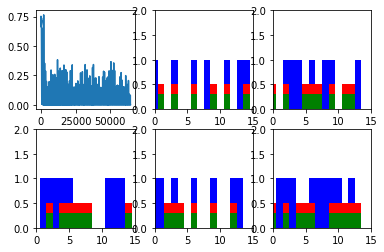

Step 200 Loss 3.438975e-05


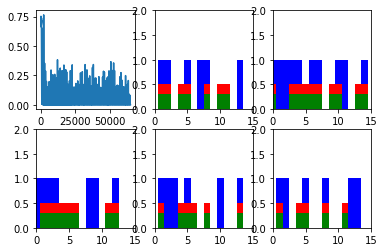

Step 300 Loss 4.8581183e-05


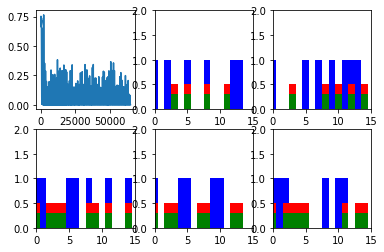

Step 400 Loss 4.6696277e-05


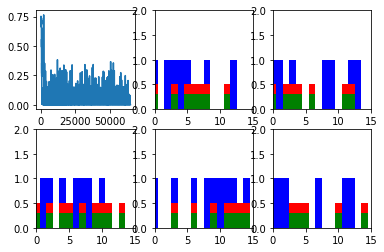

Step 500 Loss 4.5377215e-05


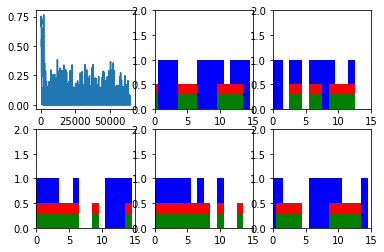

Step 600 Loss 4.855572e-05


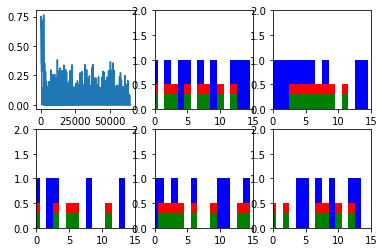

New data, epoch 98
Step 0 Loss 0.2781352


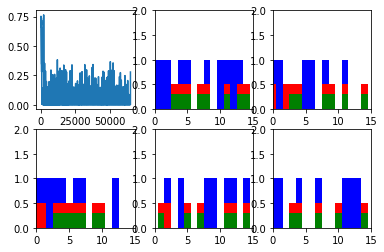

Step 100 Loss 5.7242363e-05


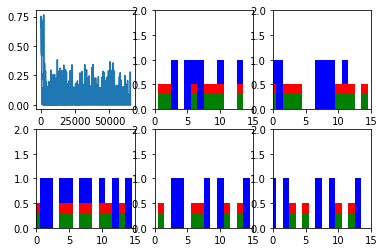

Step 200 Loss 4.138901e-05


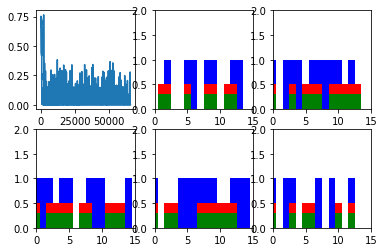

Step 300 Loss 4.4951328e-05


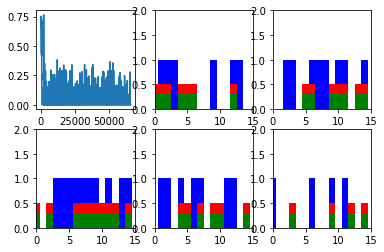

Step 400 Loss 5.0593404e-05


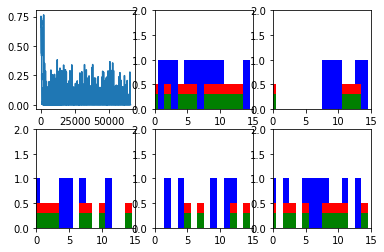

Step 500 Loss 5.2253225e-05


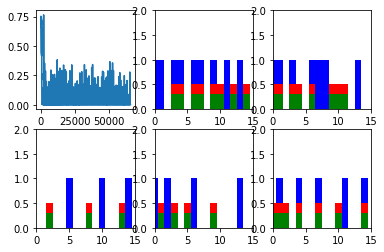

Step 600 Loss 4.412605e-05


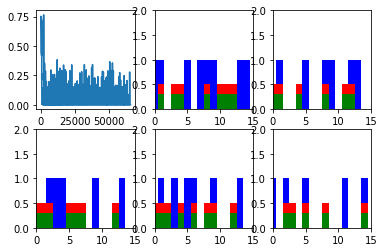

New data, epoch 99
Step 0 Loss 0.23220927


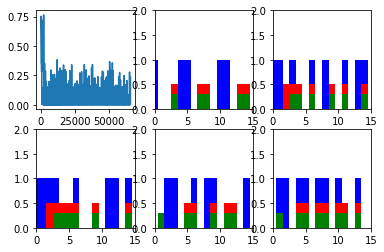

Step 100 Loss 4.7607715e-05


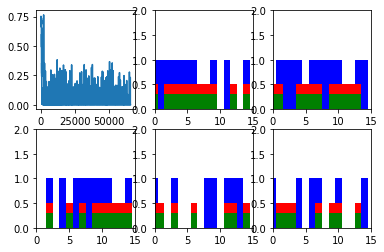

Step 200 Loss 4.5750523e-05


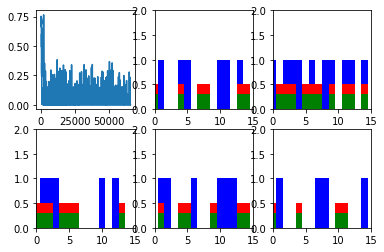

Step 300 Loss 4.2130163e-05


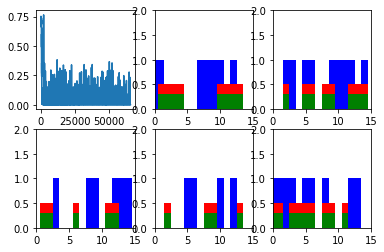

Step 400 Loss 5.7209563e-05


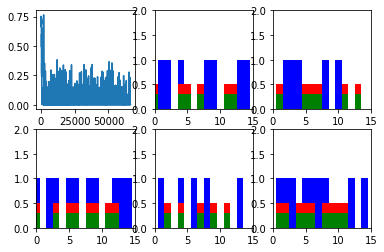

Step 500 Loss 5.6078075e-05


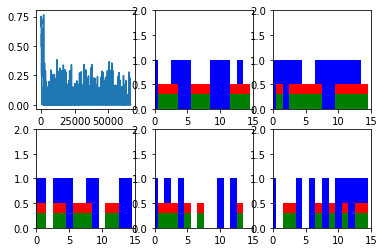

Step 600 Loss 6.5775275e-05


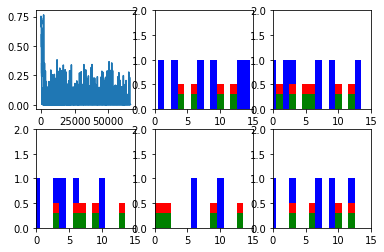

In [11]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, prediction],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchy_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()

In [55]:
Placeholder_3

NameError: ignored